<a href="https://colab.research.google.com/github/mnnit3007/Customer_purchase_behaviour_analysis/blob/main/Copy_of_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing dataset
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/Superstore Marketing Data.csv"
df=pd.read_csv(path)

Mounted at /content/drive


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [ ]:
#First view
df.head()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3    ########        0        10  ...                0                 0   
4    ########        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   

   NumStorePurchases  NumWebVisitsMonth  Response  Complain  
0                  6                  1         1         0  
1                  7                  5         1         0  
2                  5                  2         0         0  
3                  2                  7         0         0  
4                  2                  7         1         0  

[5 rows x 22 columns]

In [ ]:
df.tail()

Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
2235         1    ########       99       372  ...               47   
2236         0   1/22/2013       99         5  ...                3   
2237         0    ########       99       185  ...               15   
2238         0  11/29/2012       99       267  ...              149   
2239         2    ########       99       169  ...              188   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
2235                48            78                  2                5   
2236                 8            16                  1                1   
2237                 5            14                  2                6   
2238               165            63                  1                5   
2239                 0           144                  1                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
2235                    2                 11                  4         0   
2236                    0                  3                  8         0   
2237                    1                  5                  8         0   
2238                    4                 10                  3         0   
2239                    5                  4                  7         1   

      Complain  
2235         0  
2236         0  
2237         0  
2238         0  
2239         0  

[5 rows x 22 columns]

In [ ]:
#Rows and columns count
df.shape

(2240, 22)

In [ ]:
#Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#drop duplicate records
df=df.drop_duplicates()

In [ ]:
#Variables datatypes
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [ ]:
#Identifying values of variables
col_list=df.columns
for i in col_list:
  print(df[i].value_counts())
  print(" ")


Id
1826    1
5680    1
4640    1
2525    1
9503    1
       ..
5342    1
2379    1
2882    1
5710    1
4070    1
Name: count, Length: 2240, dtype: int64
 
Year_Birth
1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
1956    55
1979    53
1958    53
1952    52
1977    52
1959    51
1968    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     7
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: count, dtype: int64
 
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
 
Marital_Status
Married  

In [ ]:
#Non Standard missing values

Non standard missing values in various columns based on values obtained above

Dt_Customer
########      916

In [ ]:
#Standard Missing values(Which pandas can identify) count
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
#Replacing non-standard missing values with Nan
df['Dt_Customer'].replace('########',np.NaN,inplace=True)

In [ ]:
#Converting datatypes
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
#Now total missing values
df.isnull().sum()

Id                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer            916
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
Response                 0
Complain                 0
dtype: int64

In [ ]:
#Finding measures of central tendies for relevant columns
import statistics as st
median_income = df['Income'].median()
median_income

51381.5

In [ ]:
mode_date = df['Dt_Customer'].mode()
mode_date

0   2012-08-31
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
#Imputing missing values with measures of central tendencies
df['Income'].fillna(value=median_income, inplace=True)
df['Dt_Customer'].fillna(value=mode_date[0], inplace=True)

In [ ]:
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [ ]:
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

In [ ]:
#Dataframe description
df.describe(include='all')

Id   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2240.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52237.975446   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35538.750000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68289.750000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   
std      3246.662198    11.984069         NaN            NaN   25037.955891   

            Kidhome     Teenhome          Dt_Customer      Recency  \
count   2240.000000  2240.000000                 2240  2240.000000   
unique          NaN          NaN                  NaN          NaN   
top             NaN          NaN                  NaN          NaN   
freq            NaN          NaN                  NaN          NaN   
mean       0.444196     0.506250  2013-03-09 13:07:30    49.109375   
min        0.000000     0.000000  2012-07-30 00:00:00     0.000000   
25%        0.000000     0.000000  2012-08-31 00:00:00    24.000000   
50%        0.000000     0.000000  2012-11-18 12:00:00    49.000000   
75%        1.000000     1.000000  2013-09-16 00:00:00    74.000000   
max        2.000000     2.000000  2014-06-29 00:00:00    99.000000   
std        0.538398     0.544538                  NaN    28.962453   

           MntWines  ...  MntFishProducts  MntSweetProducts  MntGoldProds  \
count   2240.000000  ...      2240.000000       2240.000000   2240.000000   
unique          NaN  ...              NaN               NaN           NaN   
top             NaN  ...              NaN               NaN           NaN   
freq            NaN  ...              NaN               NaN           NaN   
mean     303.935714  ...        37.525446         27.062946     44.021875   
min        0.000000  ...         0.000000          0.000000      0.000000   
25%       23.750000  ...         3.000000          1.000000      9.000000   
50%      173.500000  ...        12.000000          8.000000     24.000000   
75%      504.250000  ...        50.000000         33.000000     56.000000   
max     1493.000000  ...       259.000000        263.000000    362.000000   
std      336.597393  ...        54.628979         41.280498     52.167439   

        NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count         2240.000000      2240.000000          2240.000000   
unique                NaN              NaN                  NaN   
top                   NaN              NaN                  NaN   
freq                  NaN              NaN                  NaN   
mean             2.325000         4.084821             2.662054   
min              0.000000         0.000000             0.000000   
25%              1.000000         2.000000             0.000000   
50%              2.000000         4.000000             2.000000   
75%              3.000000         6.000000             4.000000   
max             15.000000        27.000000            28.000000   
std              1.932238         2.778714             2.923101   

        NumStorePurchases  NumWebVisitsMonth     Response     Complain  
count         2240.000000        2240.000000  2240.000000  2240.000000  
unique                NaN                NaN          NaN          NaN  
top                   NaN                NaN          NaN          NaN  
freq                  NaN                NaN          NaN          NaN  
mean             5.790179           5.316518     0.149107     0.009375  
min              0.000000           0.000000     0.000000   

In [ ]:
#Analyzing Customer demographics(Age, Education, Marital_status)

In [ ]:
df.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

In [ ]:
#Analyzing Age as on date when Customer joined
df['Age'] = df['Dt_Customer'].dt.year-df['Year_Birth']

<Axes: ylabel='Age'>

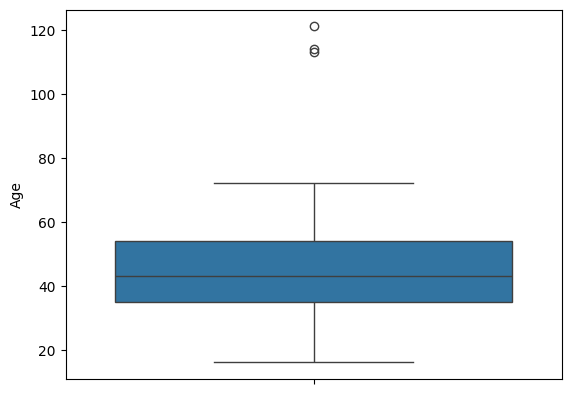

In [ ]:
sns.boxplot(df['Age'])

(array([164., 487., 764., 477., 331.,  14.,   0.,   0.,   0.,   3.]),
 array([ 16. ,  26.5,  37. ,  47.5,  58. ,  68.5,  79. ,  89.5, 100. ,
        110.5, 121. ]),
 <BarContainer object of 10 artists>)

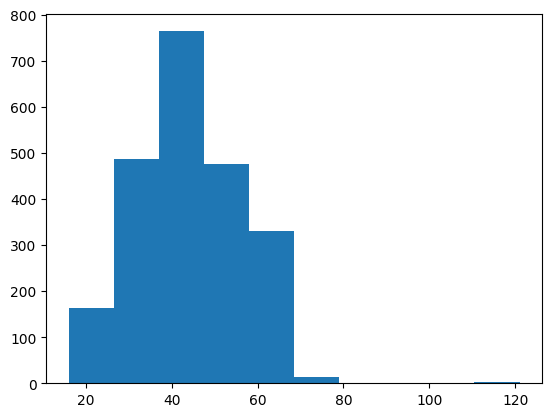

In [ ]:
plt.hist(df['Age'], bins=10)

<Axes: xlabel='count', ylabel='Education'>

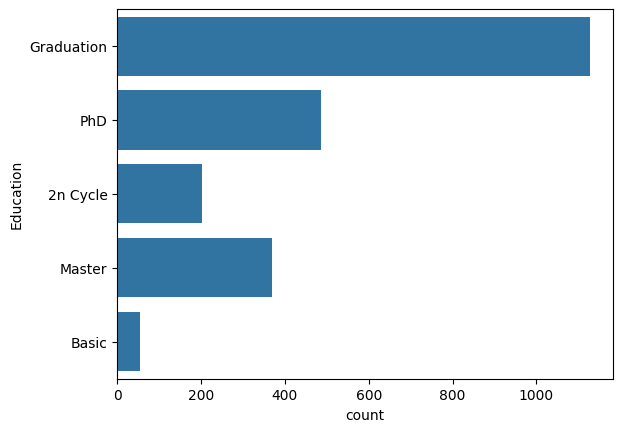

In [ ]:
#Analysing Education of customers
sns.countplot(df['Education'])

<Axes: xlabel='count', ylabel='Marital_Status'>

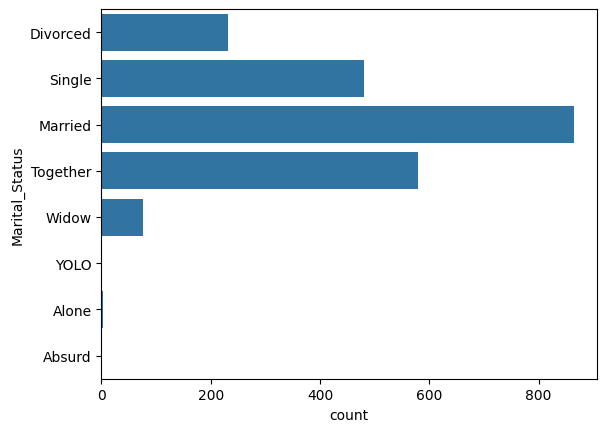

In [ ]:
#Analysing Marital_Status of customers
sns.countplot(df['Marital_Status'])

<Axes: xlabel='Kidhome', ylabel='count'>

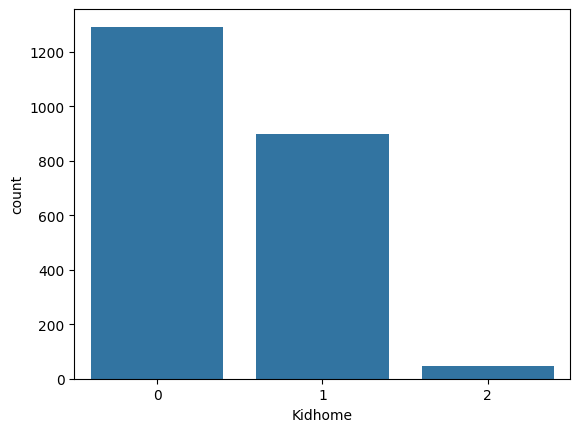

In [ ]:
#Analysing Kids at home of customers
sns.countplot(data=df,x='Kidhome')

<Axes: xlabel='Teenhome', ylabel='count'>

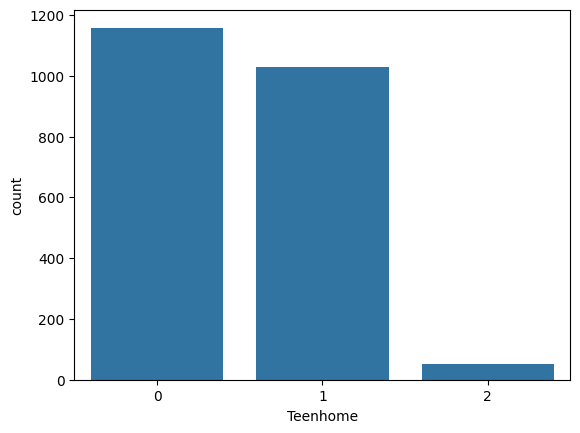

In [ ]:
#Analysing Teens at home of customers
sns.countplot(data=df,x='Teenhome')

<Axes: xlabel='Complain', ylabel='count'>

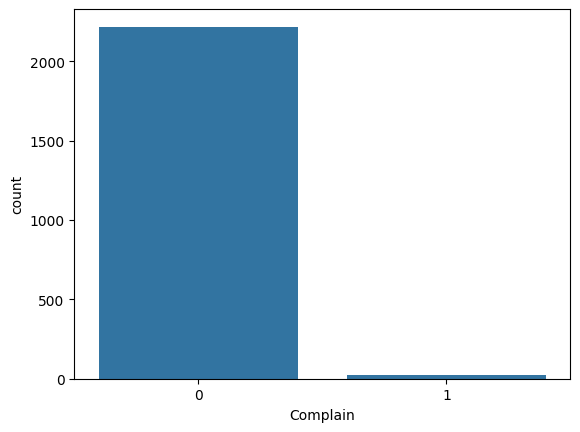

In [ ]:
#Analysing complain of customers
sns.countplot(data=df,x='Complain')

<Axes: xlabel='Response', ylabel='count'>

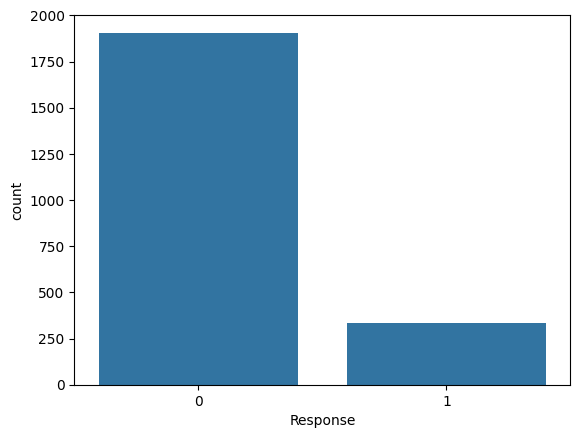

In [ ]:
#Analysing response of customers
sns.countplot(data=df,x='Response')

**The summary of customer characteristics:-**

Age:-
20-30 (150)
30-40 (500)
40-50 (750)
50-60 (500)
60-70 (300)
70-80 (10)

Education:-
Graduates are >50%(>1000).
P.hd(500)
Masters(400)
2n(200)
Basic(50)

Marital:-
Married(900)
Together(600)
Single(500)
Divorced(200)
Widow(50)
Alone(5)
Rest are Absurd and Yolo

Kidhome
0-1250
1-800
2-50

Teenhome
0-1150
1-1000
2-50

Complain-
yes-10

Response
Yes-250





**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:
#Analysing Key Variables
#Categorical Variables  -  Education, Marital_Status, Kidhome, Teenhome, Response, Complain
#Numeric variables  - Id, Year_Birth, Income, Marital_code, Education_code Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Age

**Calculating measures of central tendencies and measures of dispersion for key variables**

In [ ]:
df_whole = df.copy()

In [ ]:
for i in df.select_dtypes(include='number'):
  print(i)
  print(f"Mean {i} is {np.mean(df[i])}")
  print(f"Median {i} is {np.median(df[i])}")
  print(f"Mode {i} is {df[i].mode()[0]}")
  print(f"Range of {i} is {np.ptp(df[i])}")
  print(f"Standard Deviation  of  {i} is {np.std(df[i])}")
  print(f"Variance of {i} is {np.var(df[i])}")
  print("________________________________________________")

Id
Mean Id is 5592.159821428571
Median Id is 5458.5
Mode Id is 0
Range of Id is 11191
Standard Deviation  of  Id is 3245.937415281046
Variance of Id is 10536109.703921398
________________________________________________
Year_Birth
Mean Year_Birth is 1968.8058035714287
Median Year_Birth is 1970.0
Mode Year_Birth is 1976
Range of Year_Birth is 103
Standard Deviation  of  Year_Birth is 11.981394142764561
Variance of Year_Birth is 143.55380560427292
________________________________________________
Income
Mean Income is 52237.97544642857
Median Income is 51381.5
Mode Income is 51381.5
Range of Income is 664936.0
Standard Deviation  of  Income is 25032.36643728947
Variance of Income is 626619369.4507364
________________________________________________
Kidhome
Mean Kidhome is 0.44419642857142855
Median Kidhome is 0.0
Mode Kidhome is 0
Range of Kidhome is 2
Standard Deviation  of  Kidhome is 0.5382779061720434
Variance of Kidhome is 0.2897431042729592
__________________________________________

**Identifying Outliers**

In [ ]:
for i in df.select_dtypes(include='number'):
  out=[]
  q3 = np.percentile(df[i],75)
  q1 = np.percentile(df[i],25)
  IQR = q3 - q1
  top_limit = IQR + 1.5*q3
  bottom_limit = IQR - 1.5*q1
  for x in df[i]:
    if (x<bottom_limit) or (x>top_limit):
      out.append(x)
  print(f"Outliers in {i} are {out}")
  print("_____________________________________________________________________________________________________")


Outliers in Id are [1, 837, 115, 453, 340, 1241, 158, 1041, 492, 873, 254, 1349, 850, 830, 1031, 624, 1146, 67, 944, 1212, 760, 232, 263, 940, 466, 25, 577, 977, 1071, 1183, 967, 1048, 252, 979, 92, 291, 1307, 87, 247, 796, 618, 380, 1092, 535, 1064, 195, 1162, 968, 1175, 1052, 793, 975, 1351, 1081, 1012, 762, 486, 1158, 1029, 709, 498, 626, 1277, 153, 615, 271, 938, 1087, 347, 477, 255, 749, 607, 1008, 933, 569, 75, 948, 1100, 113, 199, 359, 965, 738, 807, 590, 35, 907, 1150, 942, 905, 1109, 326, 49, 898, 1055, 178, 437, 1340, 433, 521, 1016, 1143, 1044, 1204, 1170, 1245, 663, 1184, 821, 1225, 843, 203, 880, 524, 286, 1160, 273, 851, 1000, 454, 309, 810, 89, 1321, 1215, 1272, 679, 1176, 78, 544, 635, 523, 1077, 945, 1131, 202, 1232, 839, 1331, 194, 1343, 531, 1045, 1328, 1139, 332, 737, 800, 13, 241, 448, 1050, 701, 387, 1079, 164, 891, 234, 1103, 610, 640, 368, 1127, 833, 182, 1165, 236, 1168, 716, 1072, 773, 849, 125, 879, 0, 425, 916, 304, 675, 736, 405, 378, 895, 642, 1020, 246, 1

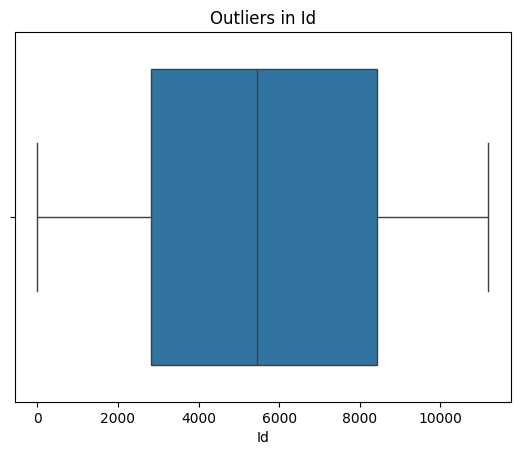

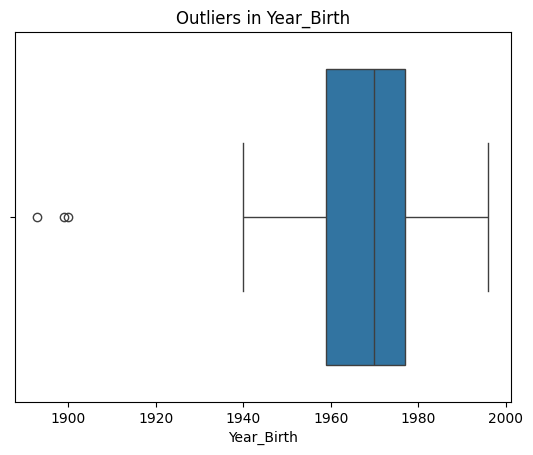

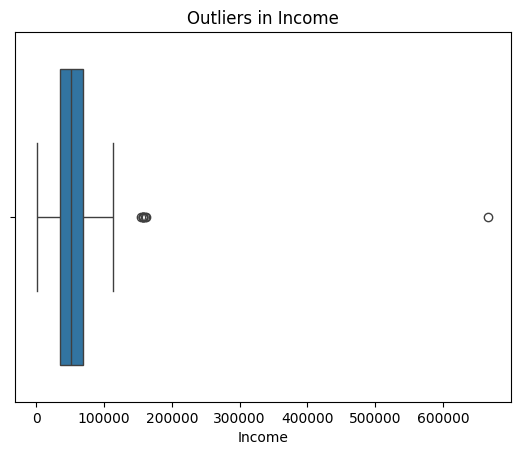

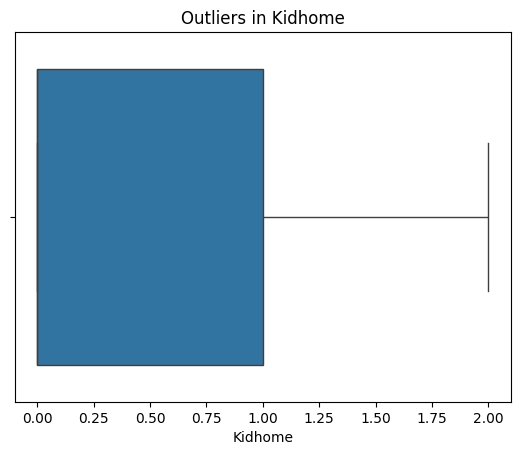

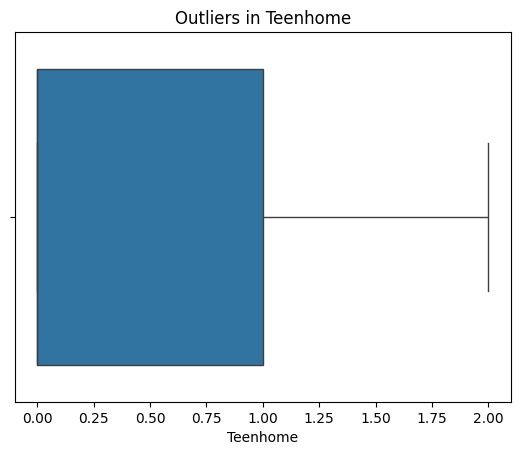

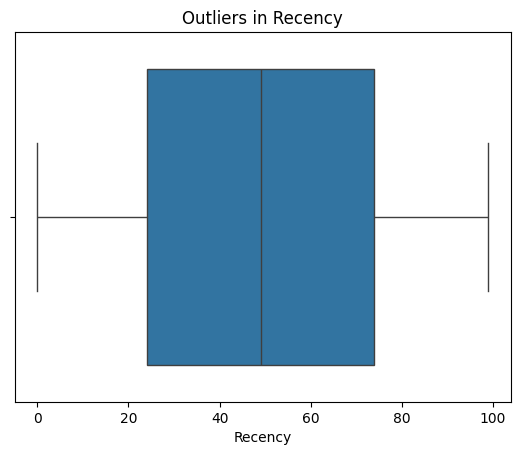

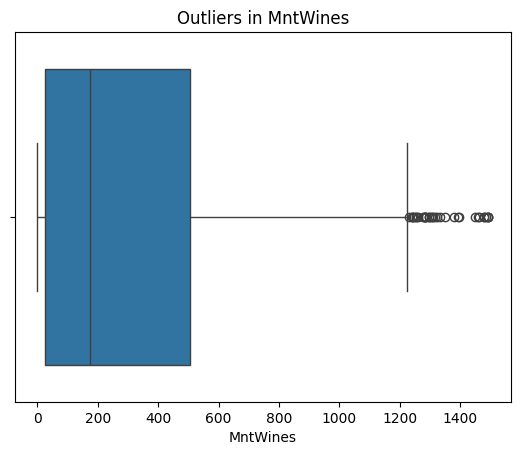

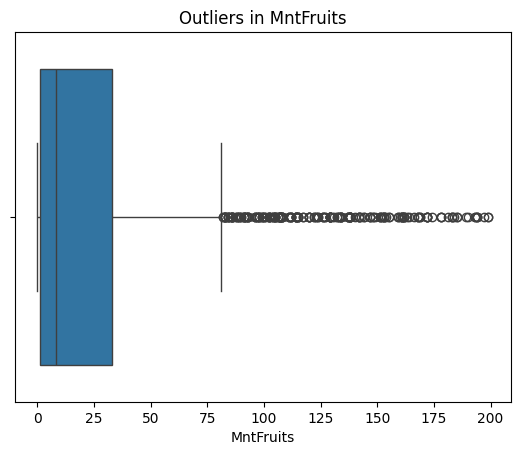

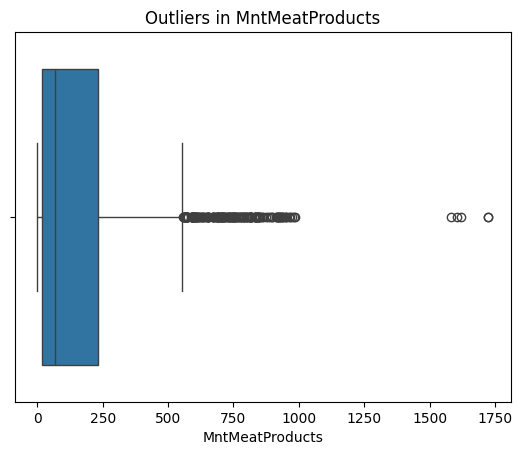

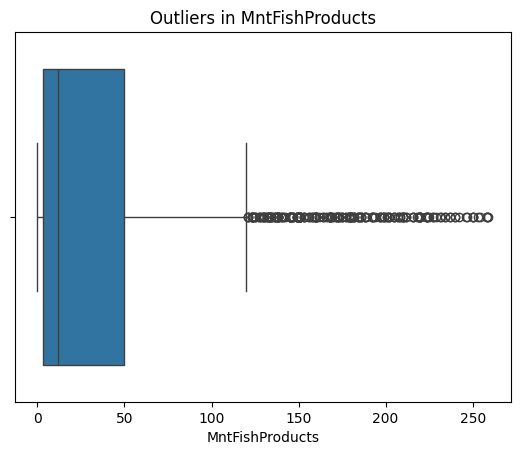

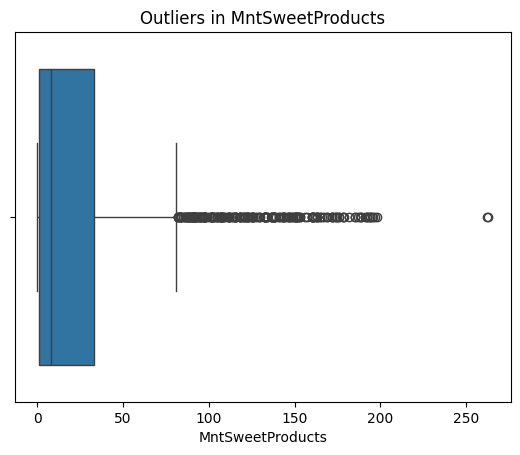

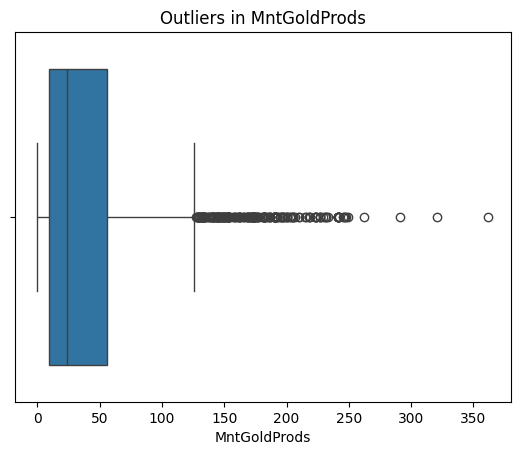

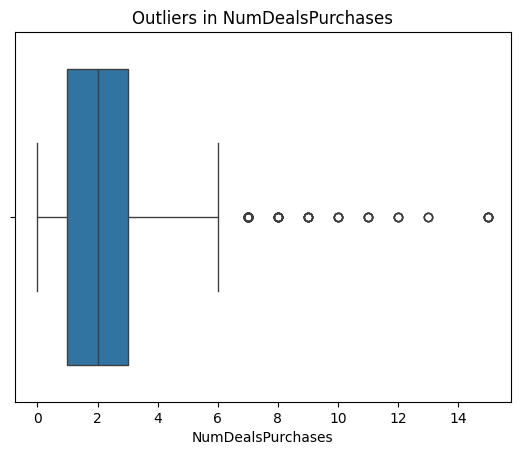

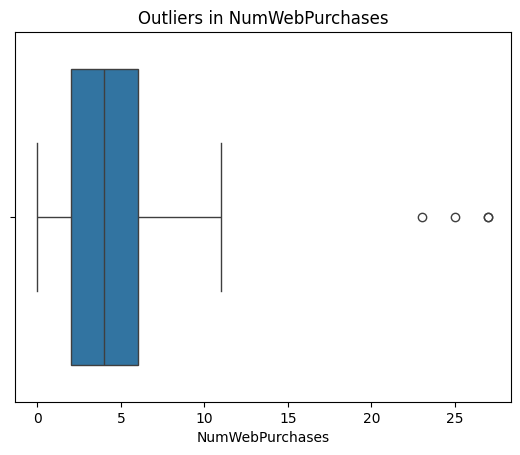

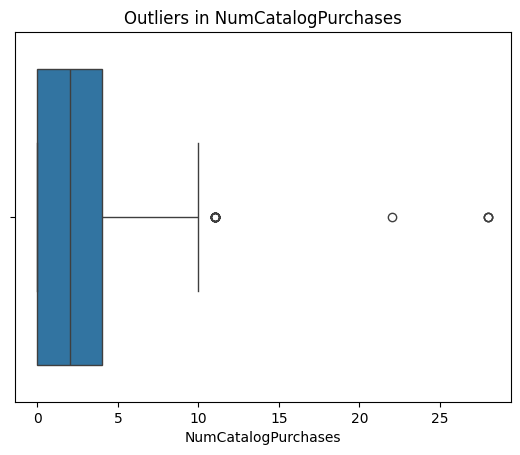

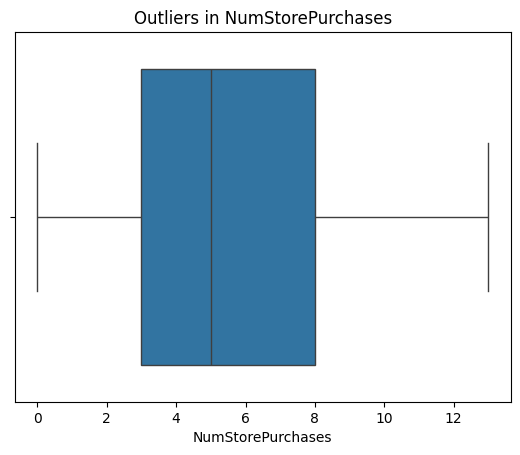

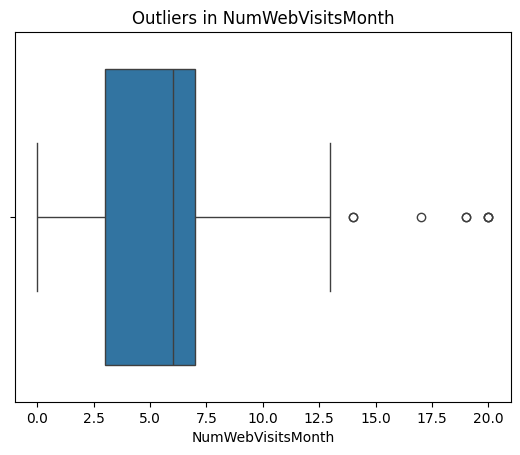

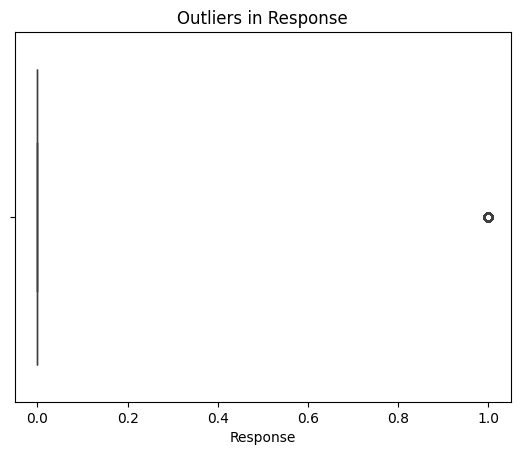

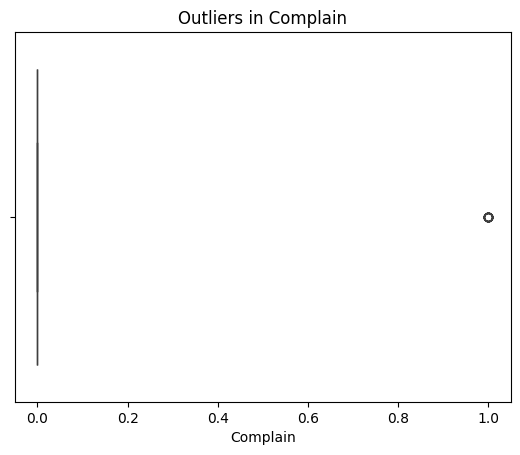

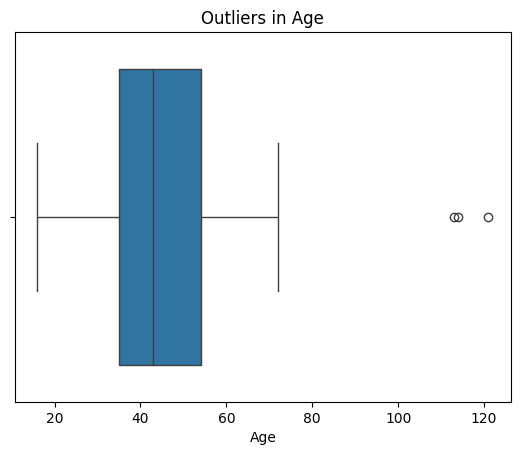

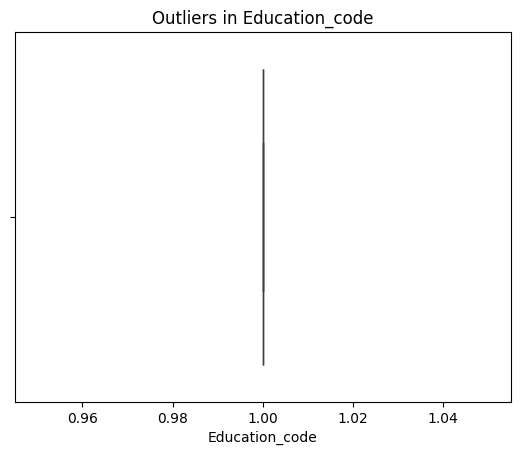

In [ ]:
#Visualizing outliers
for i in df.select_dtypes(include='number'):
  sns.boxplot(data=df,x=i)
  plt.title(f"Outliers in {i}")
  plt.show()


In [ ]:
#Treating outliers
#Removing outliers in [[Age,Year_Birth,Income(>200000),MntMeatProducts(>1500),MntSweetProducts(>220)]]
df[df['Age']>100]=np.nan
df[df['Income']>200000]=np.nan
df[df['MntMeatProducts']>1500]=np.nan
df[df['MntSweetProducts']>220]=np.nan

df.dropna(inplace=True)


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Variables following specific probability distributions are as follows:-**

**A) Discrete distributions**
   
  *Binomial*(No. of x(Success) in n trials)
  1. Complain,
  2. Response (No. of x(Success) in n trials),

  *Poisson*(No. of x(Success) in a given time)
  1. NumWebVisitsMonth,
  2. NumDealsPurchases,
  3. NumCatalogPurchases,
  4. NumStorePurchases,
  5. NumWebPurchases
  
  
**B)Continuous distributions**

  *Normal*
  1. Age,
  2. Year_Birth,
  3. Income
  4. MntFishProducts,
  5. MntMeatProducts,
  6. MntFruits,
  7. MntSweetProducts,
  8. MntWines,
  9. MntGoldProds

*Exponential*(Time till next purchase)
  1. Recency

  



Expected value and Variance of the ditribution when n=0 are 0.0 and 0.0 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=1 are 0.15 and 0.1275 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=2 are 0.3 and 0.255 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=3 are 0.44999999999999996 and 0.38249999999999995 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=4 are 0.6 and 0.51 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=5 are 0.75 and 0.6375 

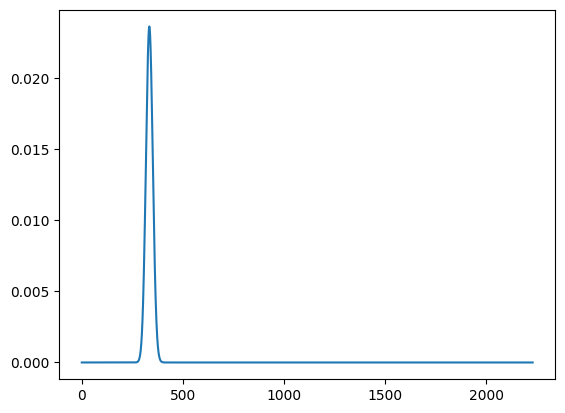

In [ ]:
##Binomial distributions of response assuming estimated probability of a customer responding to campaign is .15
from scipy.stats import binom
l=[]
n=len(df['Response'])
p=.15

#PMF
for i in range(n+1):
  binomial = binom.pmf(i, n, p)
  l.append(binomial)
  mean, var = binom.stats(i, p)
  print(f"Expected value and Variance of the ditribution when n={i} are {mean} and {var} respectively")
  print("___________________________________________________________________________________________")
plt.plot(l)

It means, for a given number of trials(n), we get successful response for mean no. of times, with the found variance.

Expected value and Variance of the ditribution when n=0 are 0.0 and 0.0 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=1 are 0.01 and 0.0099 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=2 are 0.02 and 0.0198 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=3 are 0.03 and 0.029699999999999997 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=4 are 0.04 and 0.0396 respectively
___________________________________________________________________________________________
Expected value and Variance of the ditribution when n=5 are 0.05 and 0.0495 respectiv

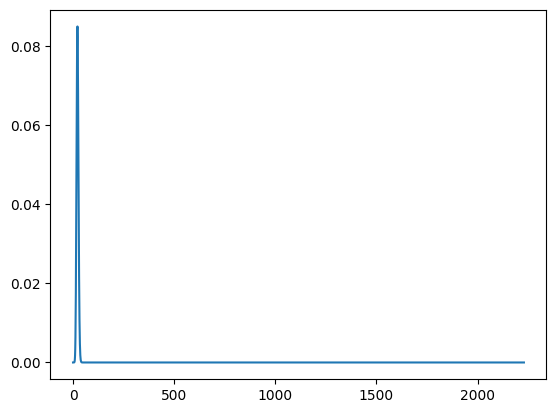

In [ ]:
#Binomial distributions of no. of complaints made in last 2 months assuming estimated probability of a customer making a complaint is .01
from scipy.stats import binom
l=[]
n=len(df['Complain'])
p=.01

#PMF
for i in range(n+1):
  binomial = binom.pmf(i, n, p)
  l.append(binomial)
  mean, var = binom.stats(i, p)
  print(f"Expected value and Variance of the ditribution when n={i} are {mean} and {var} respectively")
  print("___________________________________________________________________________________________")
plt.plot(l)

It means, for a given no. of trials(n), the mean and variance of no. of times a customer complains is as given.

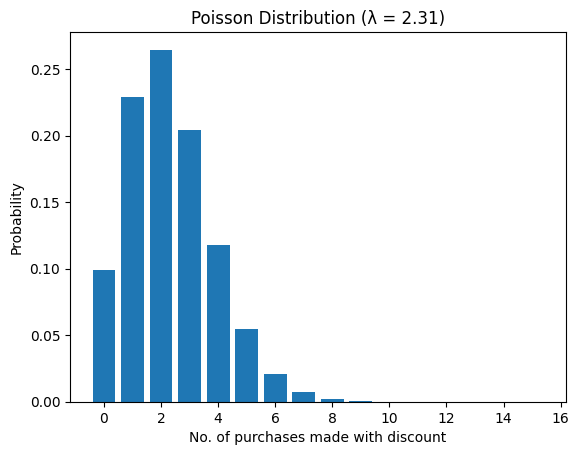

No. of purchases made with discount, the mean (expected value) and variance are both equal to 2.313144908030507.


In [ ]:
#Poisson distribution of the following variables- NumDealsPurchases

from scipy.stats import poisson
x = df['NumDealsPurchases']

# Assuming your mean (λ) is calculated as lm
lm = np.mean(x)

# Generate Poisson distribution
pmf_values = poisson.pmf(x, mu=lm)

# Create the plot
plt.bar(x, pmf_values, align='center', alpha=0.7)
plt.xlabel("No. of purchases made with discount")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution (λ = {lm:.2f})")
plt.show()

print(f"No. of purchases made with discount, the mean (expected value) and variance are both equal to {lm}.")

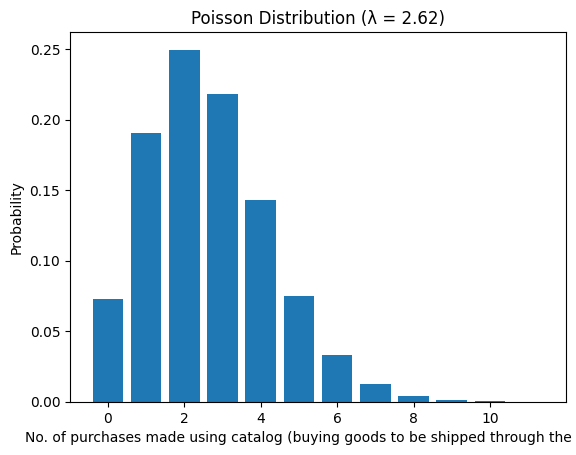

No. of purchases made using catalog (buying goods to be shipped through the mail), the mean (expected value) and variance are both equal to 2.6240466576940333.


In [ ]:
#Poisson distribution of NumCatalogPurchases

from scipy.stats import poisson
x = df['NumCatalogPurchases']

# Assuming your mean (λ) is calculated as lm
lm = np.mean(x)

# Generate Poisson distribution
pmf_values = poisson.pmf(x, mu=lm)

# Create the plot
plt.bar(x, pmf_values, align='center', alpha=0.7)
plt.xlabel("No. of purchases made using catalog (buying goods to be shipped through the mail)")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution (λ = {lm:.2f})")
plt.show()

print(f"No. of purchases made using catalog (buying goods to be shipped through the mail), the mean (expected value) and variance are both equal to {lm}.")

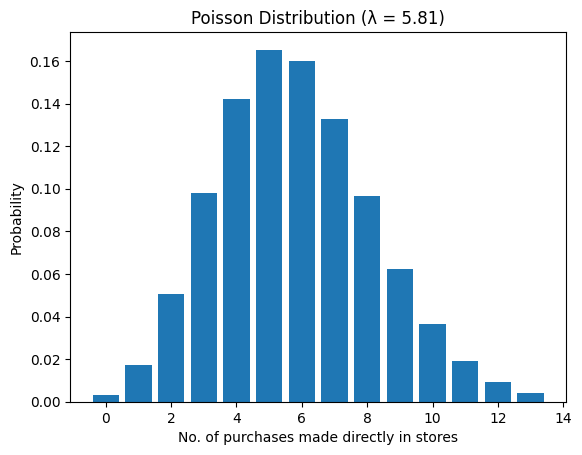

Number of purchases made directly in stores, the mean (expected value) and variance are both equal to 5.812920592193809.


In [ ]:
#Poisson distribution of NumStorePurchases

from scipy.stats import poisson
x = df['NumStorePurchases']

# Assuming your mean (λ) is calculated as lm
lm = np.mean(x)

# Generate Poisson distribution
pmf_values = poisson.pmf(x, mu=lm)

# Create the plot
plt.bar(x, pmf_values, align='center', alpha=0.7)
plt.xlabel("No. of purchases made directly in stores")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution (λ = {lm:.2f})")
plt.show()

print(f"Number of purchases made directly in stores, the mean (expected value) and variance are both equal to {lm}.")


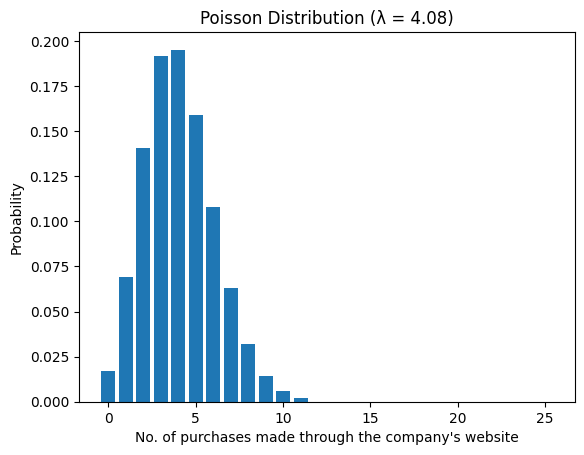

No. of purchases made through the company's website, the mean (expected value) and variance are both equal to 4.076267384477344.


In [ ]:
#Poisson distribution of NumWebPurchases

from scipy.stats import poisson
x = df['NumWebPurchases']

# Assuming your mean (λ) is calculated as lm
lm = np.mean(x)

# Generate Poisson distribution
pmf_values = poisson.pmf(x, mu=lm)

# Create the plot
plt.bar(x, pmf_values, align='center', alpha=0.7)
plt.xlabel("No. of purchases made through the company's website")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution (λ = {lm:.2f})")
plt.show()

print(f"No. of purchases made through the company's website, the mean (expected value) and variance are both equal to {lm}.")


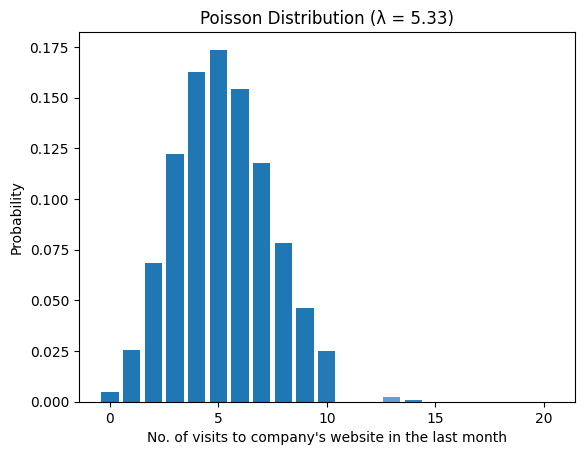

No. of visits to company's website in the last month, the mean (expected value) and variance are both equal to 5.33378196500673.


In [ ]:
# Poisson distribution of NumWebVisitsMonth

from scipy.stats import poisson
x = df['NumWebVisitsMonth']

# Assuming your mean (λ) is calculated as lm
lm = np.mean(x)

# Generate Poisson distribution
pmf_values = poisson.pmf(x, mu=lm)

# Create the plot
plt.bar(x, pmf_values, align='center', alpha=0.7)
plt.xlabel("No. of visits to company's website in the last month")
plt.ylabel("Probability")
plt.title(f"Poisson Distribution (λ = {lm:.2f})")
plt.show()

print(f"No. of visits to company's website in the last month, the mean (expected value) and variance are both equal to {lm}.")

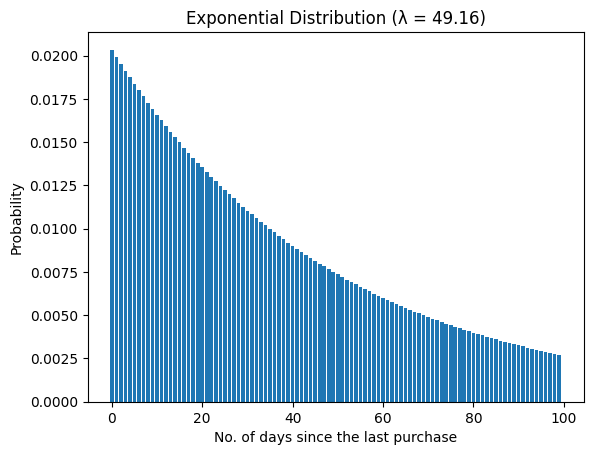

No. of days since the last purchase, the mean (expected value) and variance equal to 0.020343345289269777 and 0.0004138516975584548 respectively.


In [ ]:
#Exponential distribution of Recency-number of days since the last purchase

from scipy.stats import expon
x = df['Recency']

# Assuming rate parameter (λ) is calculated as lm
lm = np.mean(x)

# Generate Poisson distribution
#pmf_values = poisson.pmf(x, mu=lm)
probability = expon.pdf(x, scale=lm)

# Create the plot
plt.bar(x, probability, align='center', alpha=0.7)
plt.xlabel("No. of days since the last purchase")
plt.ylabel("Probability")
plt.title(f"Exponential Distribution (λ = {lm:.2f})")
plt.show()

print(f"No. of days since the last purchase, the mean (expected value) and variance equal to {1/lm} and {(1/lm)**2} respectively.")

It suggests that, on average, customers make a purchase every 20.34 days.With a variance of approximately 0.0004139, the distribution is relatively tight.
In practical terms, this indicates that the time between purchases is fairly consistent, with little deviation from the average.

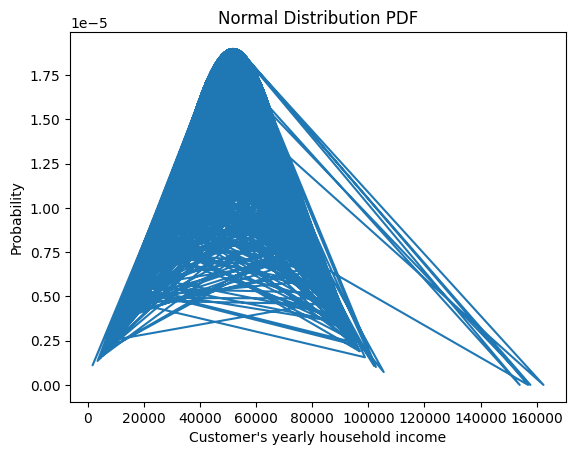

Customer's yearly household income, the mean (expected value) is 22.29 and the variance is 441597253.09.


In [ ]:
#Continuous Normal distribution- Income

from scipy.stats import norm
x=df['Income']

# calculate the mean and standard deviation of the samples
mu, std = norm.fit(x)

# Generate Normal distribution
pdf_values = norm.pdf(x, mu, std)

# Create the plot
plt.plot(x, pdf_values)
plt.xlabel("Customer's yearly household income")
plt.ylabel("Probability")
plt.title(f"Normal Distribution PDF")
plt.show()

print(f"Customer's yearly household income, the mean (expected value) is {mean:.2f} and the variance is {std*std:.2f}.")

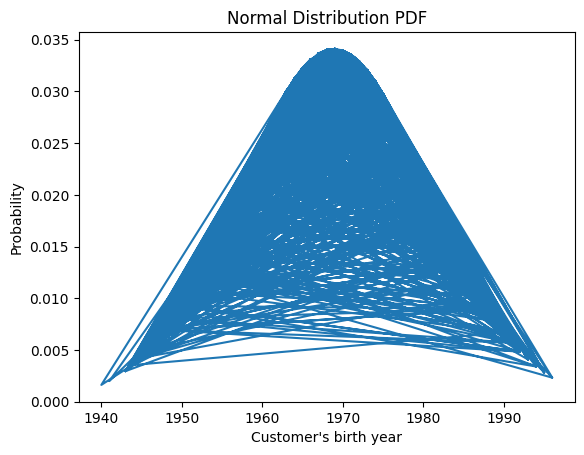

Customer's birth year, the mean (expected value) is 1968.88 and the variance is 136.75.


In [ ]:
#Continuous Normal distribution- Year_Birth

from scipy.stats import norm
x=df['Year_Birth']

# calculate the mean and standard deviation of the samples
mu, std = norm.fit(x)

# Generate Normal distribution
pdf_values = norm.pdf(x, mu, std)


# Create the plot
plt.plot(x, pdf_values)
plt.xlabel("Customer's birth year")
plt.ylabel("Probability")
plt.title(f"Normal Distribution PDF")
plt.show()

print(f"Customer's birth year, the mean (expected value) is {mu:.2f} and the variance is {std*std:.2f}.")

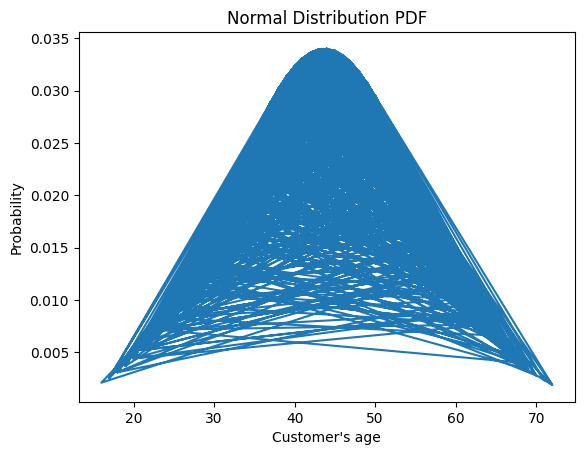

Customer's age, the mean (expected value) is 43.73 and the variance is 137.64.


In [ ]:
#Continuous Normal distribution- Age

from scipy.stats import norm
x=df['Age']

# calculate the mean and standard deviation of the samples
mu, std = norm.fit(x)

# Generate Normal distribution
pdf_values = norm.pdf(x, mu, std)

# Create the plot
plt.plot(x, pdf_values)
plt.xlabel("Customer's age")
plt.ylabel("Probability")
plt.title(f"Normal Distribution PDF")
plt.show()

print(f"Customer's age, the mean (expected value) is {mu:.2f} and the variance is {std*std:.2f}.")

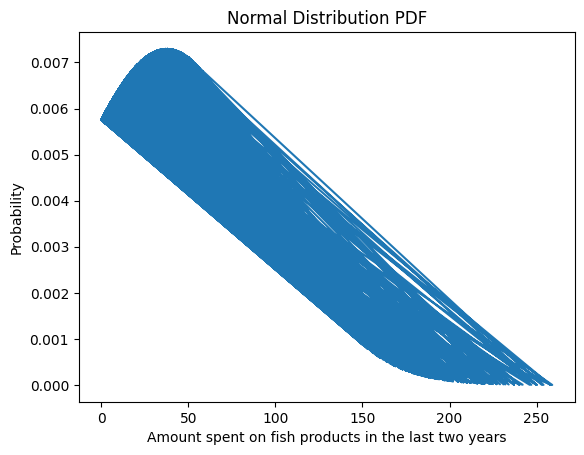

Amount spent on fish products in the last two year, the mean (expected value) is 37.64 and the variance is 2991.11.


In [ ]:
# Normal distribution  - MntFishProducts
from scipy.stats import norm
x=df['MntFishProducts']

# calculate the mean and standard deviation of the samples
mu, std = norm.fit(x)

# Generate Normal distribution
pdf_values = norm.pdf(x, mu, std)

# Create the plot
plt.plot(x, pdf_values)
plt.xlabel("Amount spent on fish products in the last two years")
plt.ylabel("Probability")
plt.title(f"Normal Distribution PDF")
plt.show()

print(f"Amount spent on fish products in the last two year, the mean (expected value) is {mu:.2f} and the variance is {std*std:.2f}.")

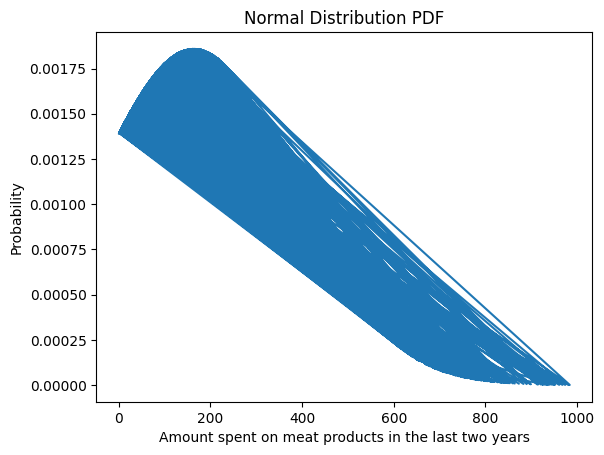

Amount spent on meat products in the last two year, the mean (expected value) is 163.80 and the variance is 46082.25.


In [ ]:
# Normal distribution  - MntMeatProducts
from scipy.stats import norm
x=df['MntMeatProducts']

# calculate the mean and standard deviation of the samples
mu, std = norm.fit(x)

# Generate Normal distribution
pdf_values = norm.pdf(x, mu, std)

# Create the plot
plt.plot(x, pdf_values)
plt.xlabel("Amount spent on meat products in the last two years")
plt.ylabel("Probability")
plt.title(f"Normal Distribution PDF")
plt.show()

print(f"Amount spent on meat products in the last two year, the mean (expected value) is {mu:.2f} and the variance is {std*std:.2f}.")

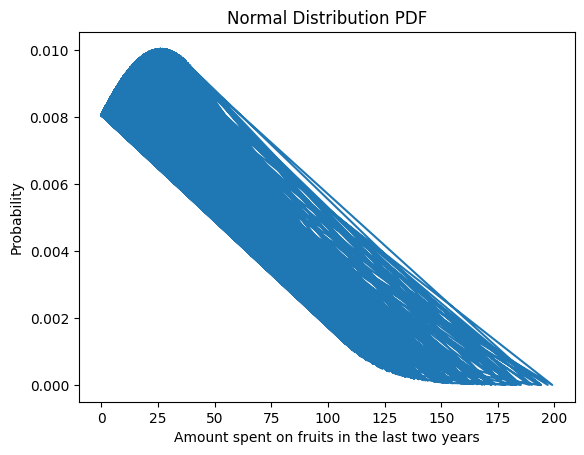

Amount spent on fruits in the last two year, the mean (expected value) is 26.35 and the variance is 1580.52.


In [ ]:
# Normal distribution  - MntFruits
from scipy.stats import norm
x=df['MntFruits']

# calculate the mean and standard deviation of the samples
mu, std = norm.fit(x)

# Generate Normal distribution
pdf_values = norm.pdf(x, mu, std)

# Create the plot
plt.plot(x, pdf_values)
plt.xlabel("Amount spent on fruits in the last two years")
plt.ylabel("Probability")
plt.title(f"Normal Distribution PDF")
plt.show()

print(f"Amount spent on fruits in the last two year, the mean (expected value) is {mu:.2f} and the variance is {std*std:.2f}.")

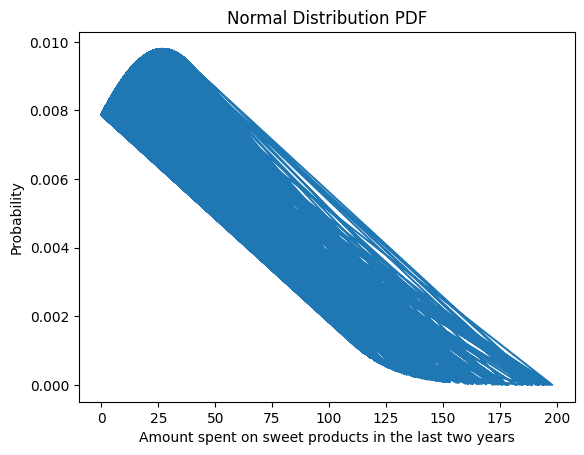

Amount spent on sweet products in the last two year, the mean (expected value) is 26.93 and the variance is 1659.10.


In [ ]:
# Normal distribution  - MntSweetProducts
from scipy.stats import norm
x=df['MntSweetProducts']

# calculate the mean and standard deviation of the samples
mu, std = norm.fit(x)

# Generate Normal distribution
pdf_values = norm.pdf(x, mu, std)

# Create the plot
plt.plot(x, pdf_values)
plt.xlabel("Amount spent on sweet products in the last two years")
plt.ylabel("Probability")
plt.title(f"Normal Distribution PDF")
plt.show()

print(f"Amount spent on sweet products in the last two year, the mean (expected value) is {mu:.2f} and the variance is {std*std:.2f}.")

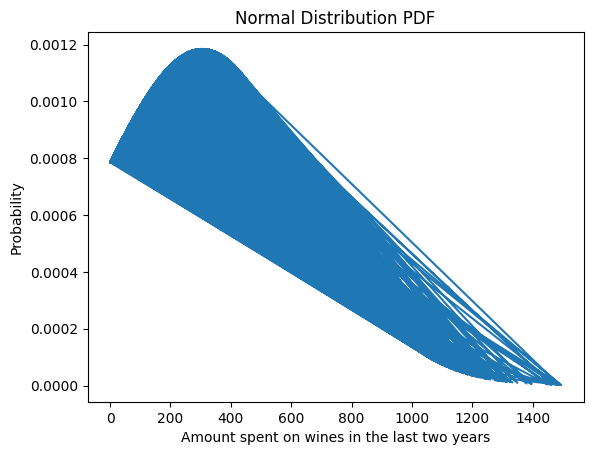

Amount spent on wines in the last two year, the mean (expected value) is 305.03 and the variance is 113338.45.


In [ ]:
# Normal distribution  - MntWines
from scipy.stats import norm
x=df['MntWines']

# calculate the mean and standard deviation of the samples
mu, std = norm.fit(x)

# Generate Normal distribution
pdf_values = norm.pdf(x, mu, std)

# Create the plot
plt.plot(x, pdf_values)
plt.xlabel("Amount spent on wines in the last two years")
plt.ylabel("Probability")
plt.title(f"Normal Distribution PDF")
plt.show()

print(f"Amount spent on wines in the last two year, the mean (expected value) is {mu:.2f} and the variance is {std*std:.2f}.")

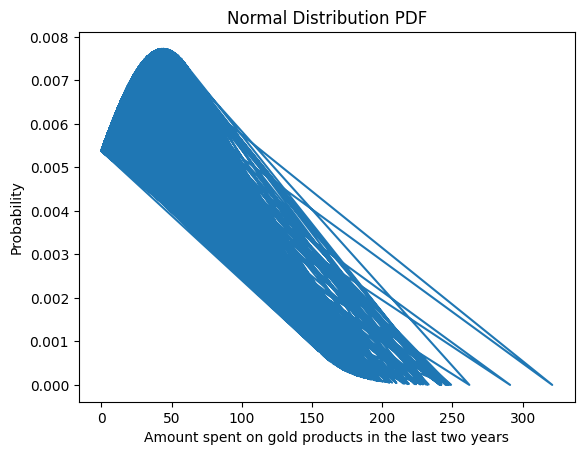

Amount spent on gold products in the last two year, the mean (expected value) is 43.94 and the variance is 2668.15.


In [ ]:
# Normal distribution  - MntGoldProducts
from scipy.stats import norm
x=df['MntGoldProds']

# calculate the mean and standard deviation of the samples
mu, std = norm.fit(x)

# Generate Normal distribution
pdf_values = norm.pdf(x, mu, std)

# Create the plot
plt.plot(x, pdf_values)
plt.xlabel("Amount spent on gold products in the last two years")
plt.ylabel("Probability")
plt.title(f"Normal Distribution PDF")
plt.show()

print(f"Amount spent on gold products in the last two year, the mean (expected value) is {mu:.2f} and the variance is {std*std:.2f}.")

**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

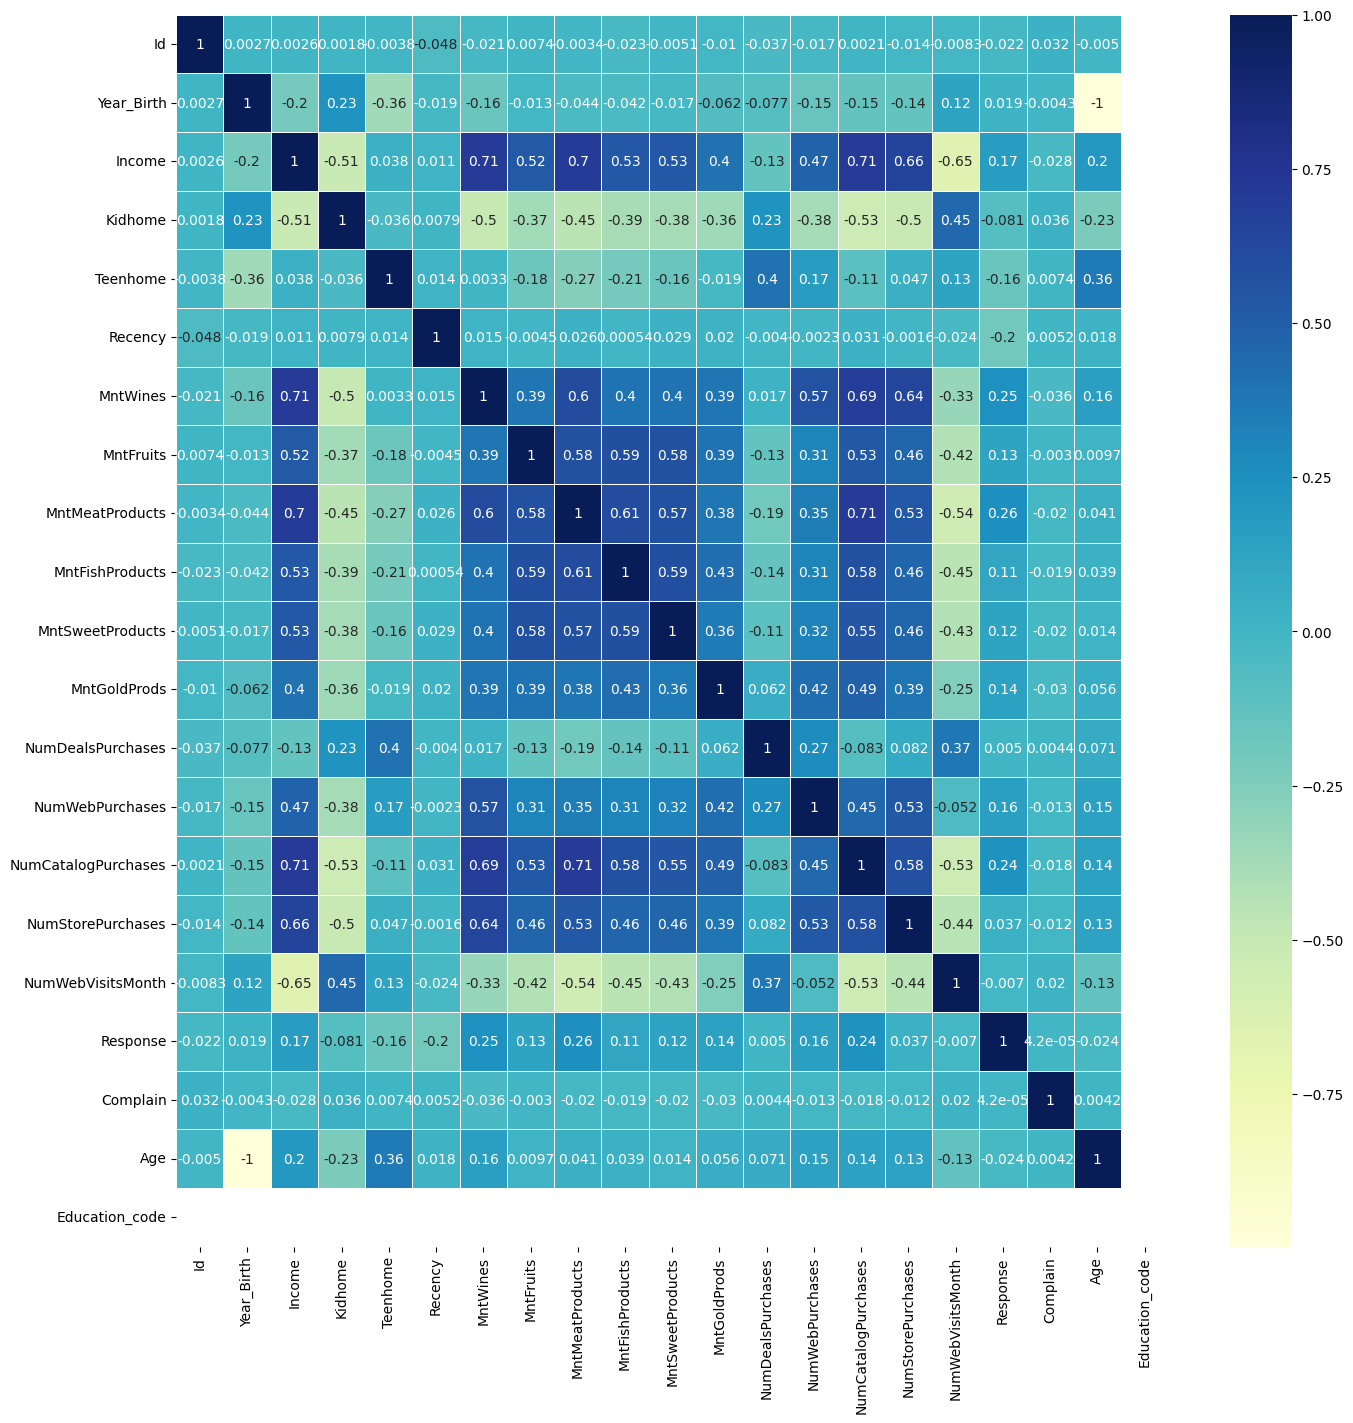

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap="YlGnBu", linewidths=.6)
plt.show()

**Key relationships**

1. High Income households +vs correlates with wines, meats, and also +ve correlates with catalog purchase and store purchase.

2. High income households -ve correlates with website visits

3. Wines and Meat are mostly purchased by high income.Website purchase, Store purchase and Catalog purchase modes are mostly used to buy wine and meat.

4. Fruits +ve correlates with meat, fish, sweet purchases.

5. Meat +vs correlates with income, wines, fruits,fish,sweet,catalog purchase.

6. Fish +ve correlates with Fruits, meat, sweet, catalog purchase

7. Sweet are purchased with Fruits, meat,fish

8. Gold purchase is mostly through catalog and positevely correlates to fish purchase.

9. Discounts +ve correlates with website visits.

10. Web purchase- Most Wines,though also store purchase.

11. Catalog purchase- mostly meat.Mostly high income, also through stores

12. Store purchase--high income, also correlates positevely with store purchase.

13. Web visits mostly avail discounts. Though, web visits negatively correlates to high income,meat purchase and catalog purchase.

14. Recency,Customer_join_dt,Year_birth,Age do not correlate strongly with any feature.

15. Age and NumWebVisitsMonth correlate moderately negatively.

16. Kids at home +ve to website visits and discounts, but negative to most(income, wine, catalog) .

17. Teen at home - more discounts,more store purchase.

18. Response to campaign +ve to catalog,meat,wines,income

19. Complain poorly correlate to most.

20. Kids at home households complained relatively more.

In [ ]:
#Correlating customer characteristics and spending habits.
#Characteristis are- Year_Birth(Age),Marital_status,Education,Income,Kids_home,Teenage_home
#Spending habits are- Recency, Amt spent distribution, Channel of purchase,Web_visit, Discounts, Complains and response.

In [ ]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Age', 'Education_code'],
      dtype='object')

In [ ]:
df_habit=df[['Age','Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain']]

**Exploring Spending habit based on Marital Status**

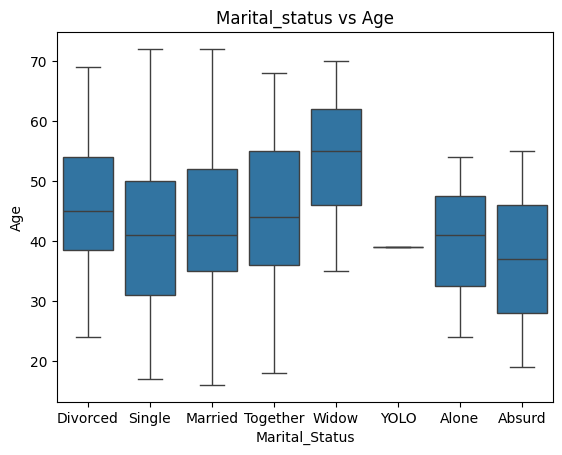

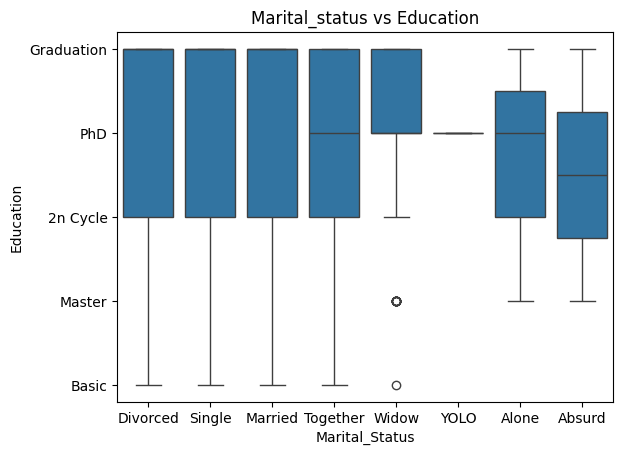

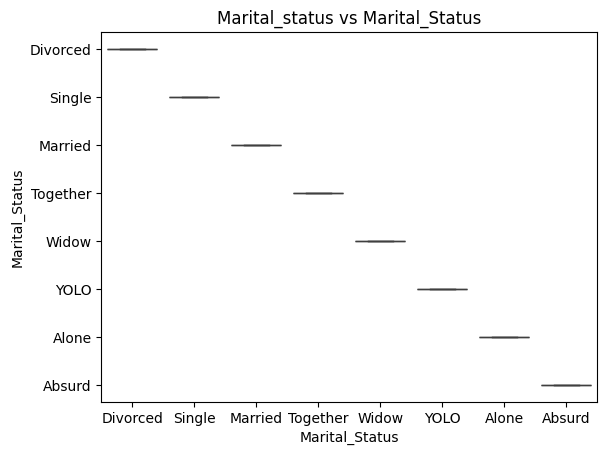

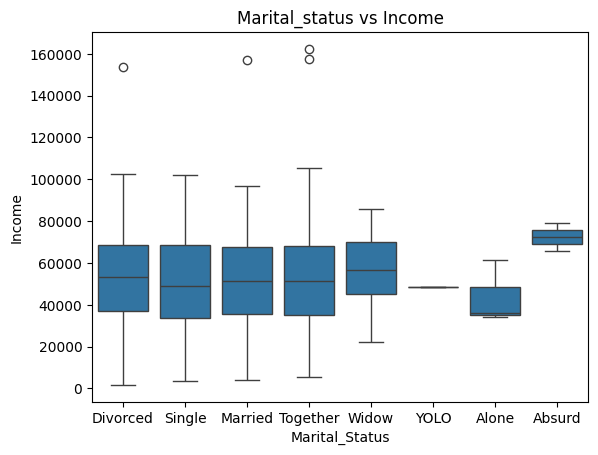

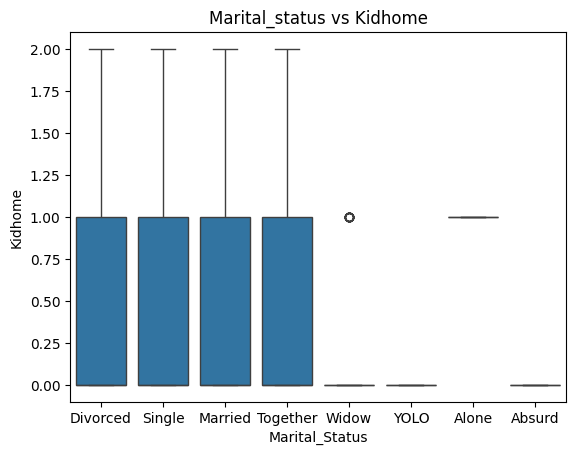

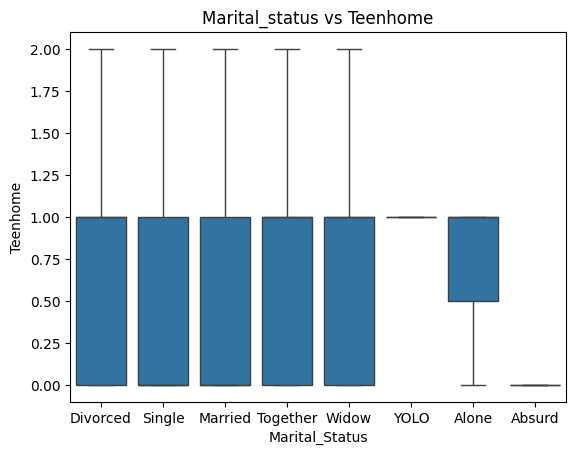

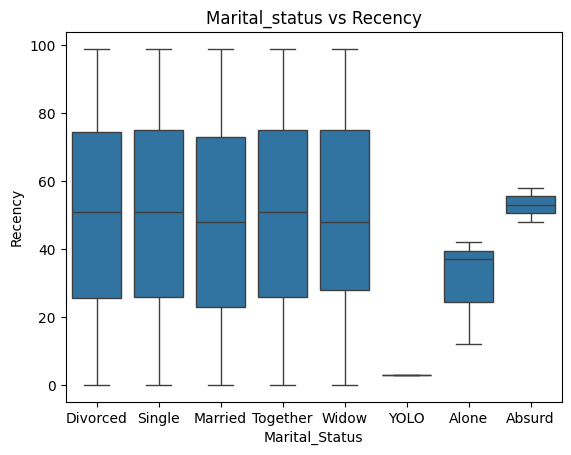

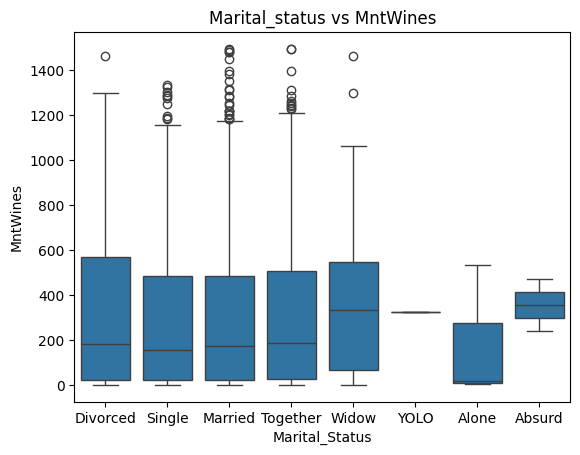

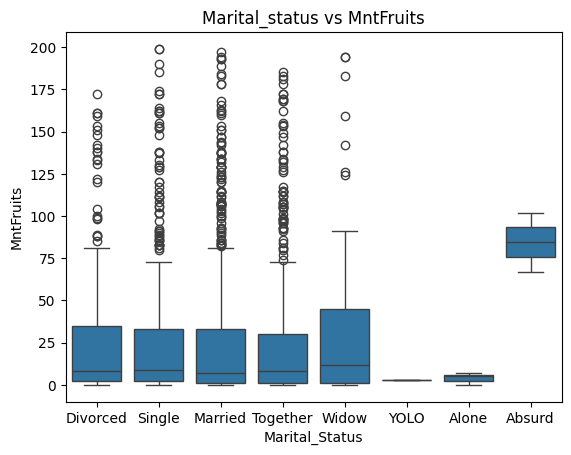

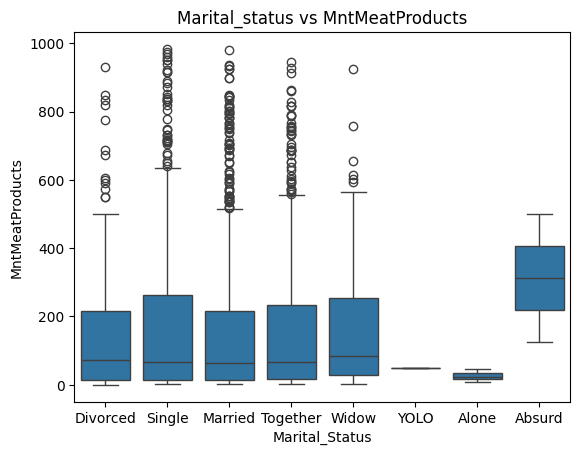

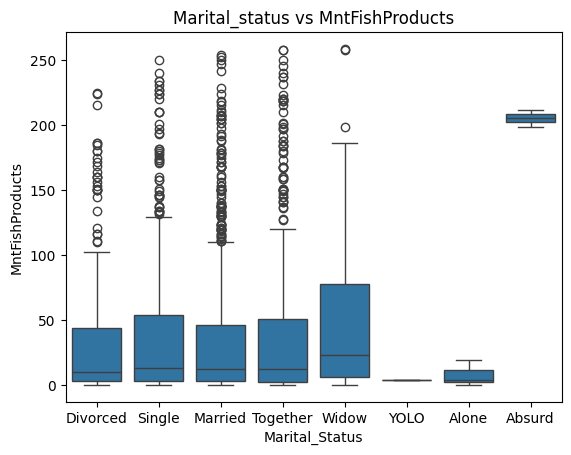

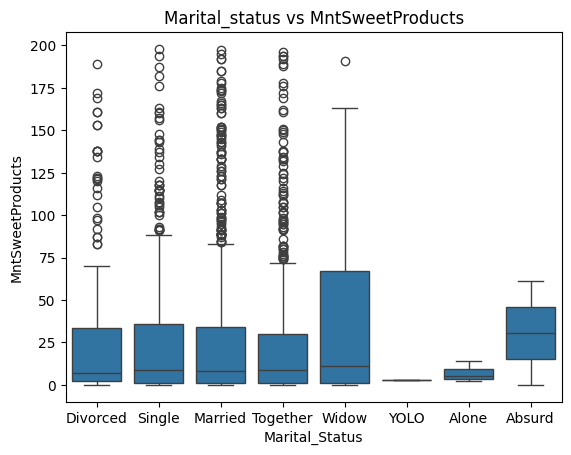

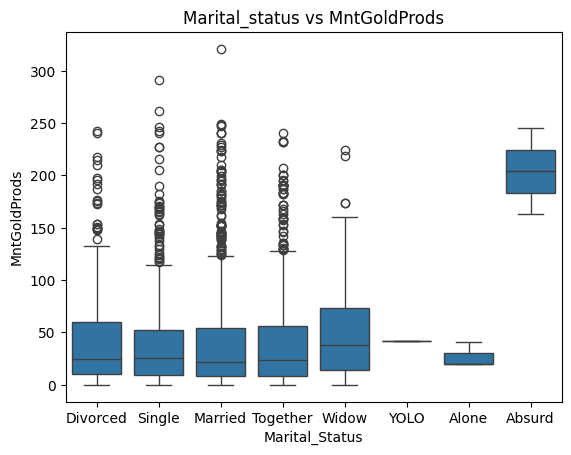

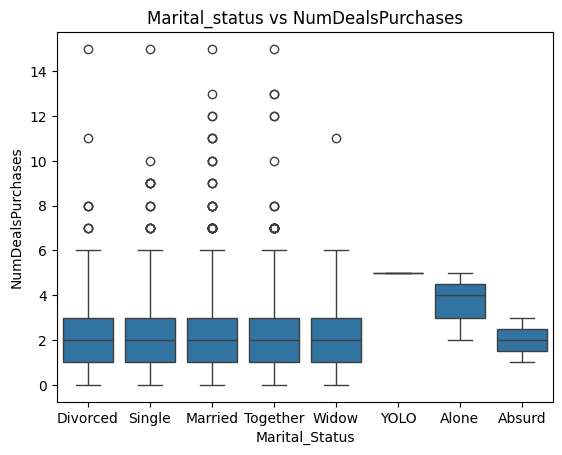

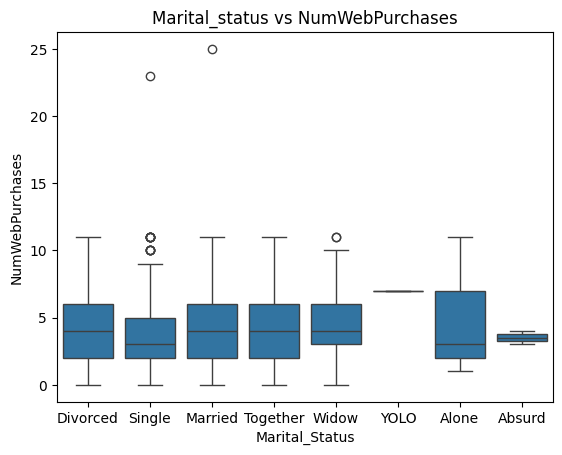

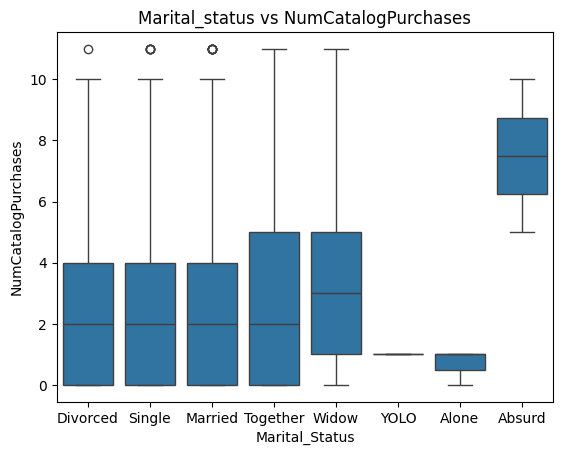

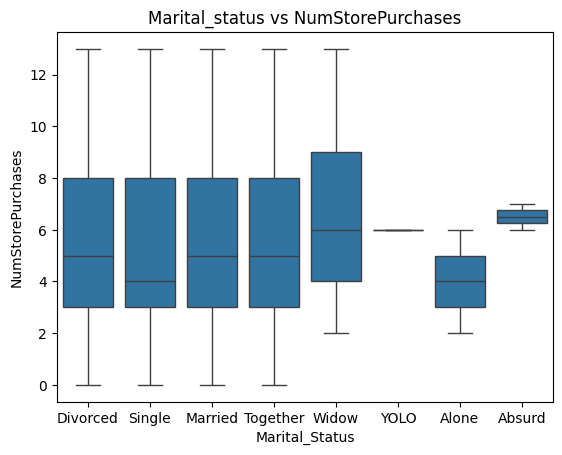

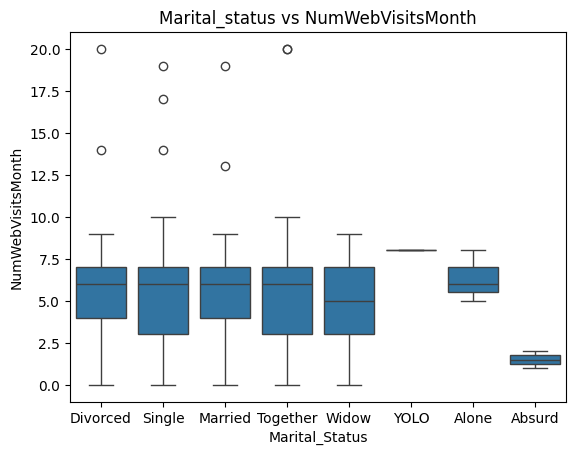

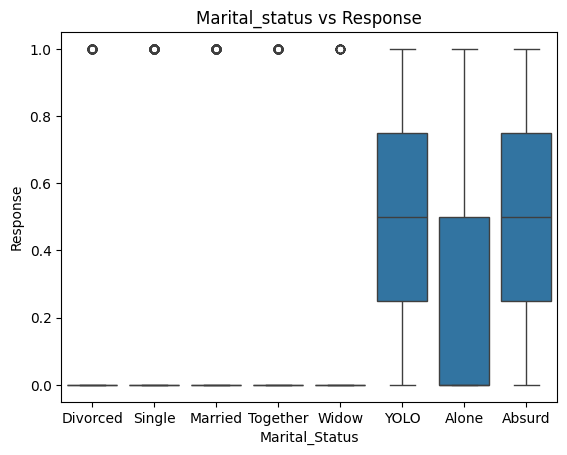

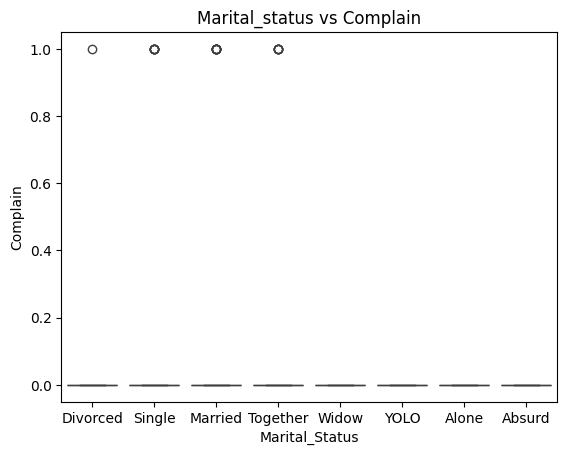

In [ ]:
for i in df_habit:
  sns.boxplot(data=df_habit,x='Marital_Status',y=i)
  plt.title(f"Marital_status vs {i}")
  plt.show()

**SPENDING HABITS**

1. Absurd has Highst median income and alone, the Lowest
2. YOLO frequently buy(low recency) and higher% of Alone are more frequent buyers than rest. Also 'Married' more frequent buyers than divorced,single,widow and absurd.
3. Spending on wines- Highest median spending by Widows and Absurd.Least median sepending by Alone.Divorsed has highly dispersed(more variation) and yolo and absurd least dispersed(more consistent) wines expenditure.Divorsed,Single,Married,Together is more positively skewed(higher concentration near mean at lower end of expenditure range). Absurd follows normal distribution. Significant outliers in Married,Single and Together(high expenditure)
4. Spending on fruits:- Highest median spending by Absurd. More divergence in spending among widows.High positive skew in Divorced,Single,Married,Together,Widows.Also more outliers in them.
5. Meat-Highest median by Absurd, Most divergence in spending by single, positive skew and outliers in divorced,single,married,together and widow.
6. Fish-Highest median by Absurd(very high).Among others, highest spending by widow.Most divergence in Widow.Also many outliers in married,together,single,divorced.Right skew in all except absurd.
7. Sweet-Max median by Absurd. Largest divergence in Widow.Positive skew in all except absurd.outliers in together,msrried,single,divorced.
8. Gold-Highest median spending  by Absurd(very high).Among others, high divergence and more median in Widow. Outliers in together,married,single,divorced.All positive skew.
9. Discounts-Highest no. of median availed by YOLO and Alone. In alone, negative skew, so most availed. Less divergence in Absurd. Some outliers in married,single,together.
10. Web purchase- Highest by YOLO, least median by Alone and Single. Highest divergence in Alone. Most positive skew in Alone,Single,Widow. Some outliers in single,married.
11. Catalog purchase- Highest by Absurd.Least by Alone,yolo.More divergence in Together, also positive skew in it.
12. Store purchase-Highest median by Absurd,yolo,Widow.Least by single,alone.Least divergence in Absurd.Highest positive skew in single.
13. Web_visits_monthly-HIGHEST BY YOLO.Least by Absurd.Least divergence in Absurd,Alone.Negative skew in Divorsed,single,married,together. Some otliers in single etc.
14. Response highest by YOLO and Absurd.Both normally distributed.Alone positive skew with 0 median.All rest 0 response

**Explore spending habits based on Education**

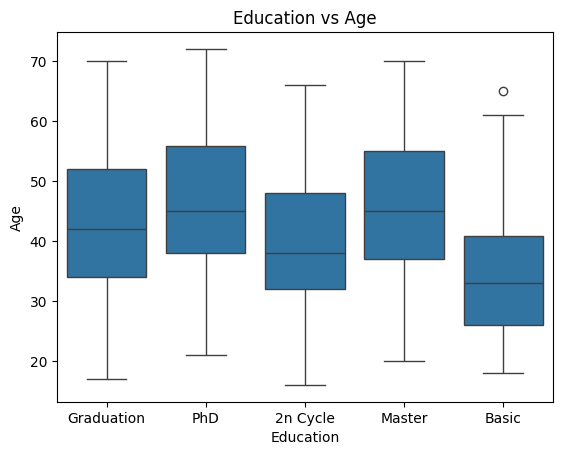

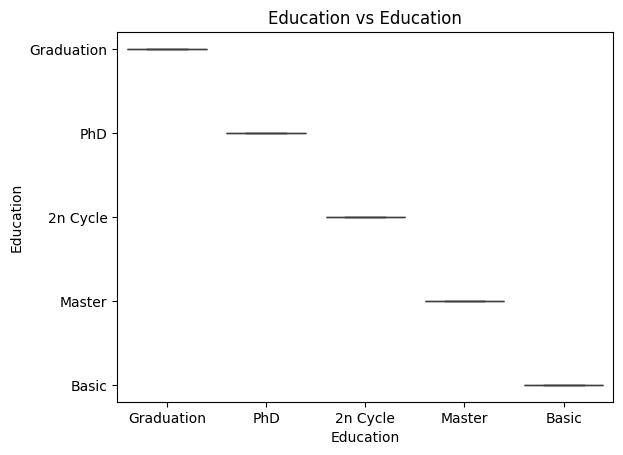

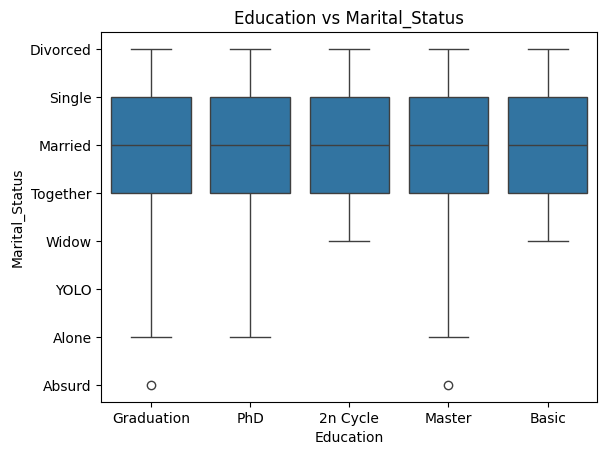

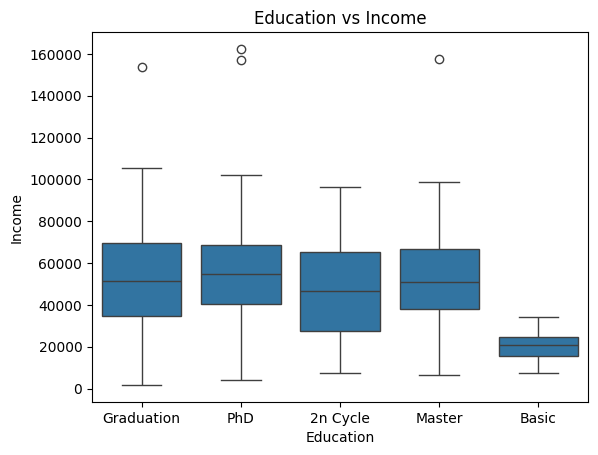

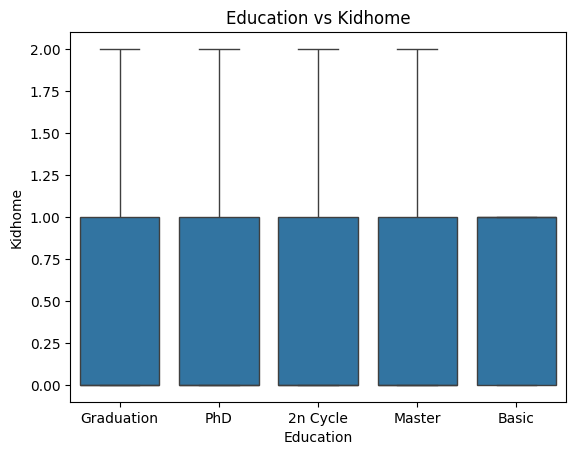

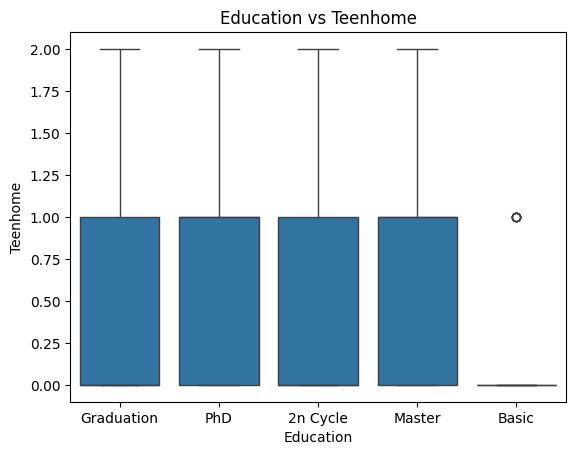

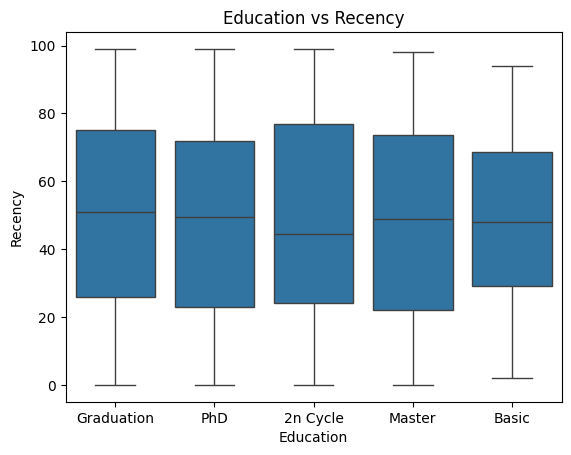

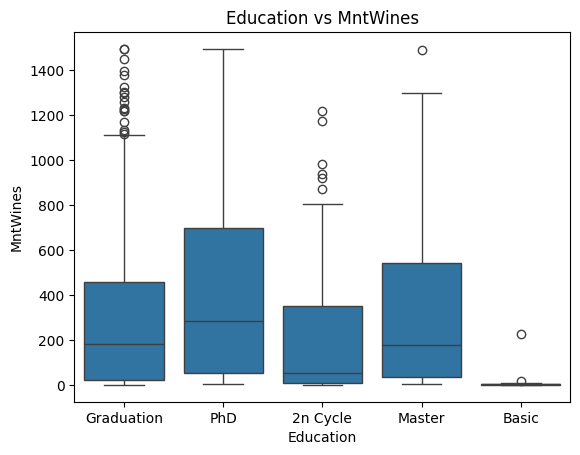

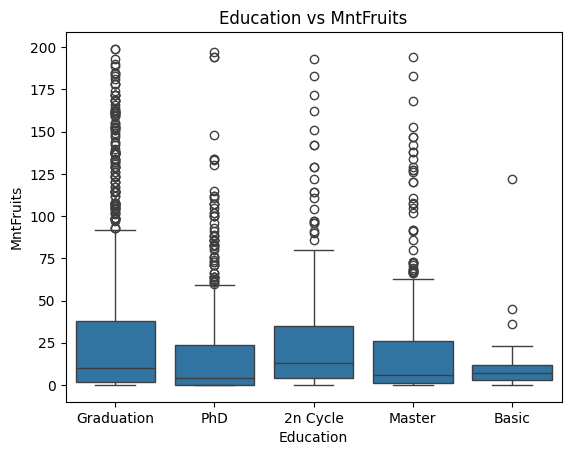

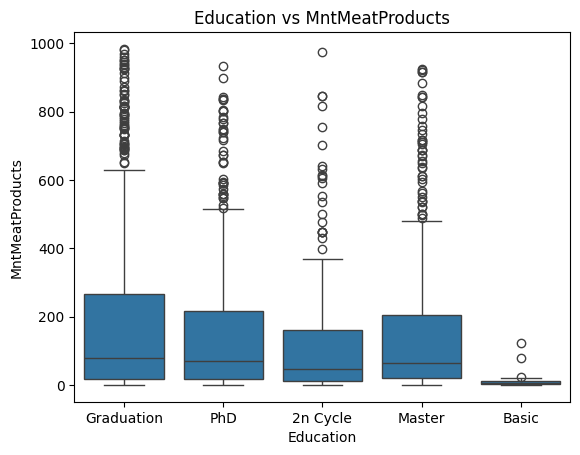

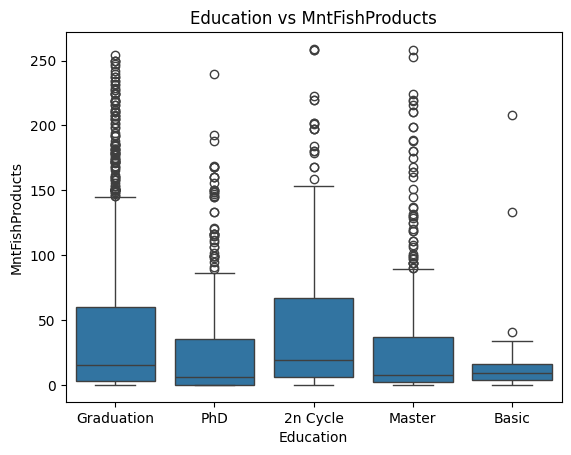

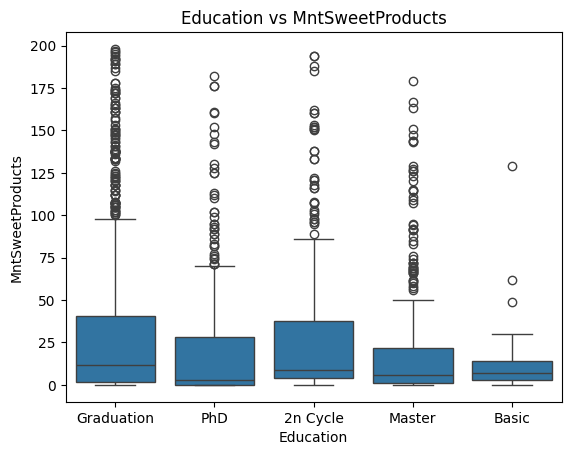

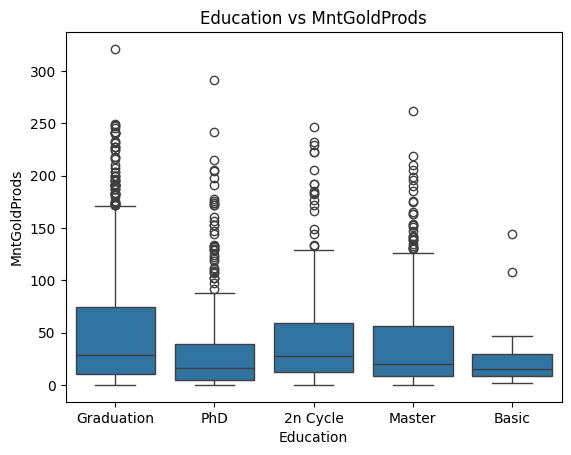

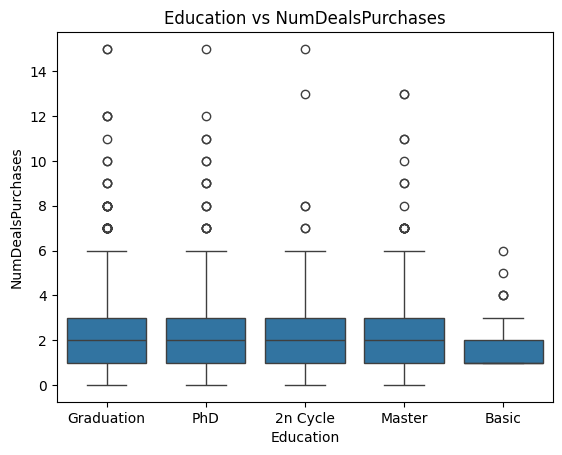

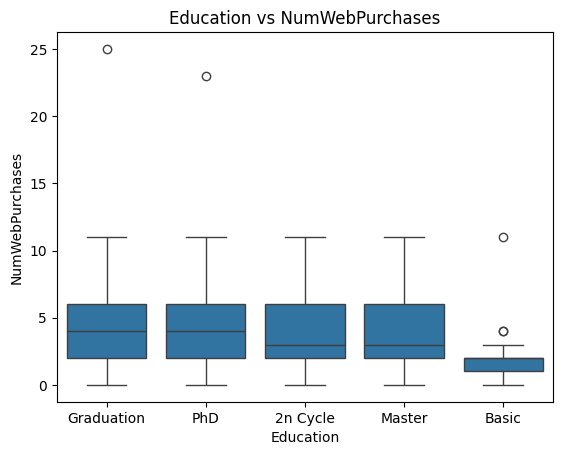

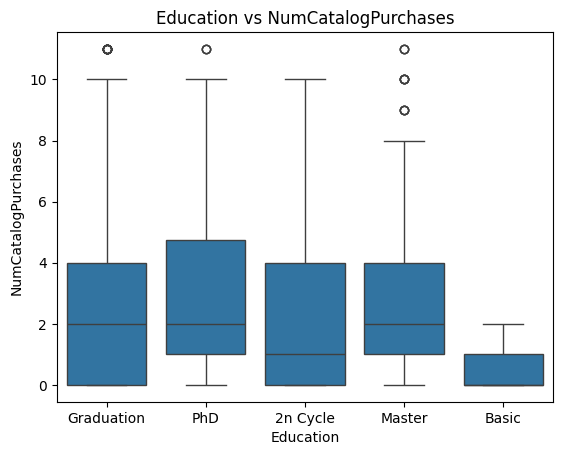

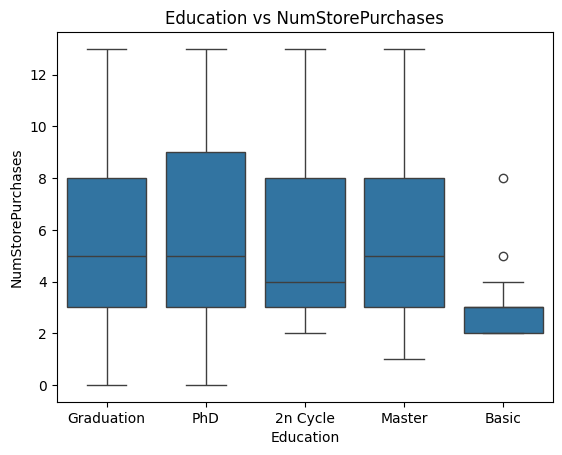

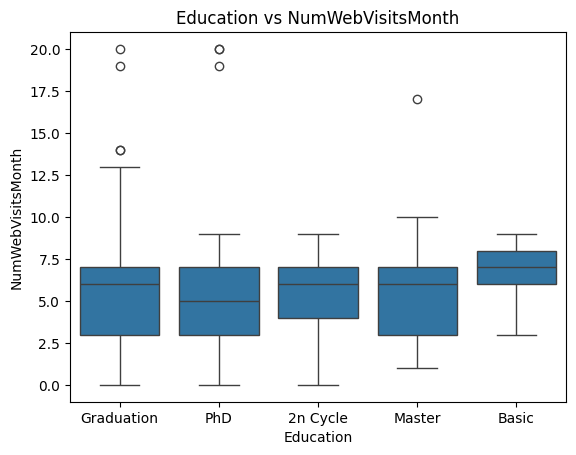

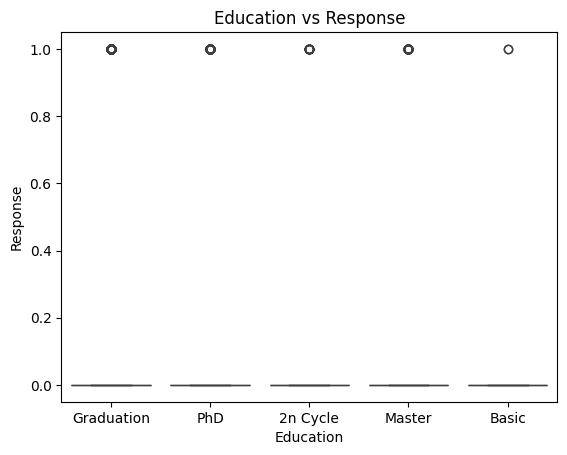

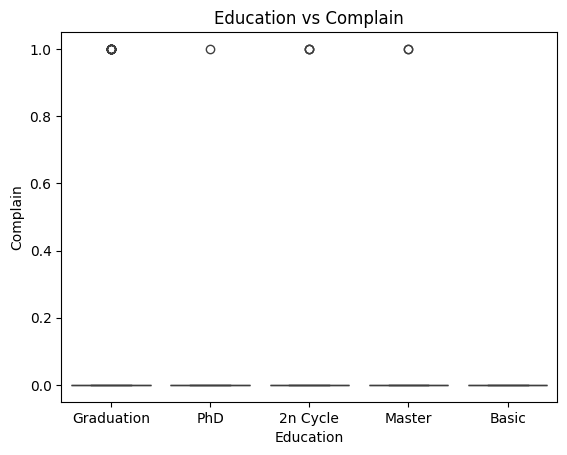

In [ ]:
#Exploring relationship based on Education
for i in df_habit:
  sns.boxplot(data=df_habit,x='Education',y=i)
  plt.title(f"Education vs {i}")
  plt.show()

1. Income-Lowest median of Basic educated, Most divergence in 2n_cycle,some exceptional high in p.hd,master,grad.
2. Recency-2n_cycle least(43)(most frequently buy), also highest variability, and positive skew in it.
3. Wines-Highest median expenditure by P.hd. Some outliers in grad,2n_cycle.Most variability also in p.hd. highest positive skew in 2n_cycle, with very less median(next less after basic).
4. Fruits-Highest median spending by 2n Cycle and Grad.Highest divergence and pos skew also in them.Least median spending by p.hd,then masters ,with positive skew.Many outliers in grad,followed by p.hd and masters.
5. Meat-Highest median by grad,followed by master,p.hd,2n,basic.Most Divergence in grad, also outliers. Positive skew in all. Least skew in spending by basic.
6. Fish-Highest median spend by graduates and 2n.Least by master,p.hd.Most divergence in 2n,Significant outliers in grad,master,p.hd
7. Sweet-Highest median spend by Grad.Lowest by p.hd.All positive skew.Most divergence in grad and 2n cycle.Outliers in all.
8. Gold-Least spend by basic,then p.hd and master. Highest spend by graduate.Significant outliers in p.hd,grad,master.Most divergence in grad spending.All negative skew.
9. Discounts-Least median no. of discounts availed by basic.Also least divergence.All else are similar and normal.
10. Web_purchase-More availed by Grad,p.hd.(also both normal)Least by basic.(also least diverg);master,2 n strong positive skew.
11. Catalog_purchase-Least availed by basic,Highest by grad,p.hd,master.but grad(normal).positive skew in rest.Least divergence in Basic.
12. Store_purchase-similar pattern as catalog purchase.
13. Website visits-Most by basic,least by p.hd.High variation in master,grad.P.hd shows (normal distribution).


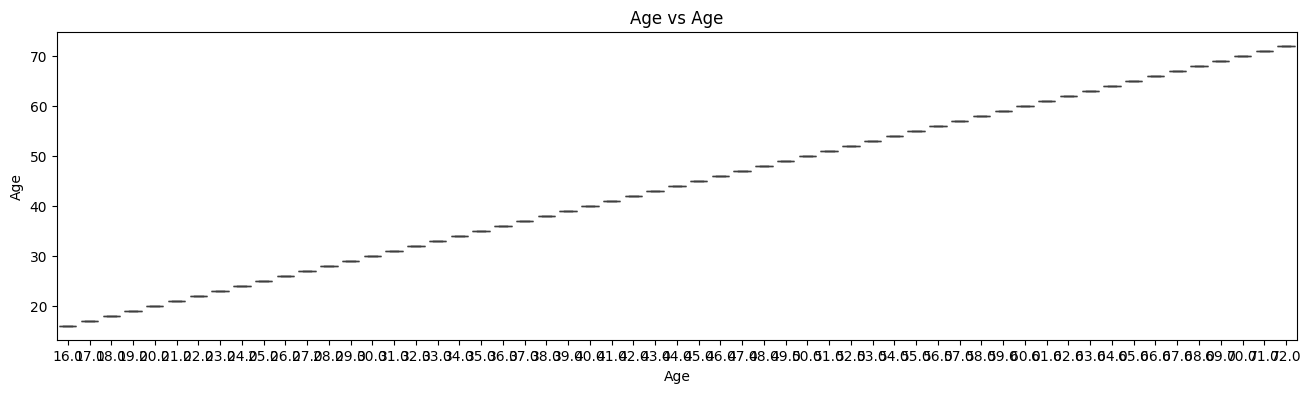

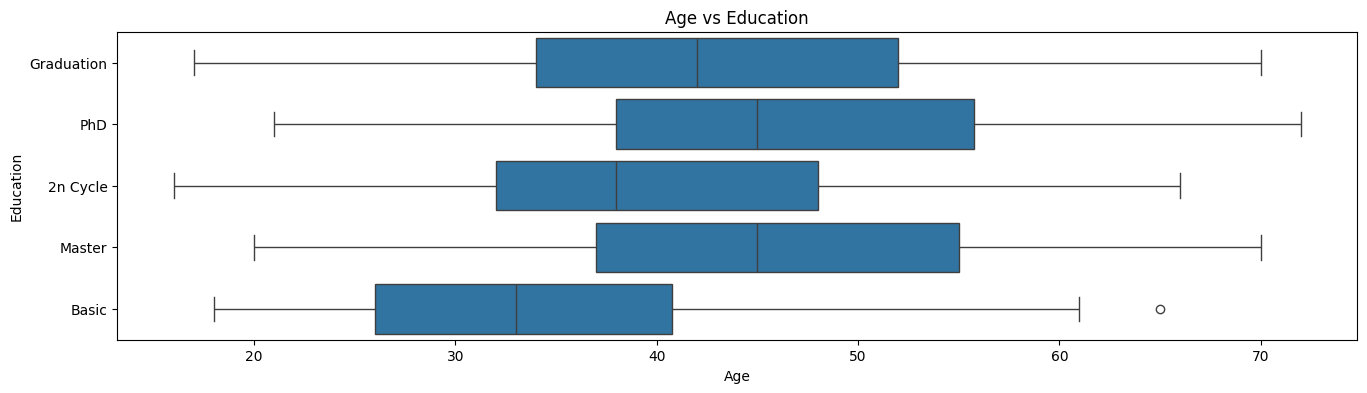

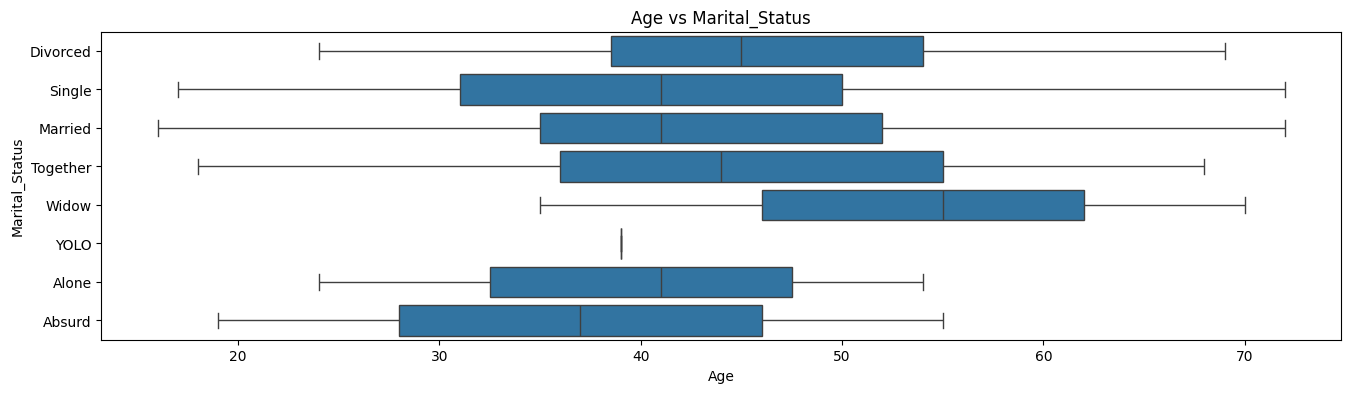

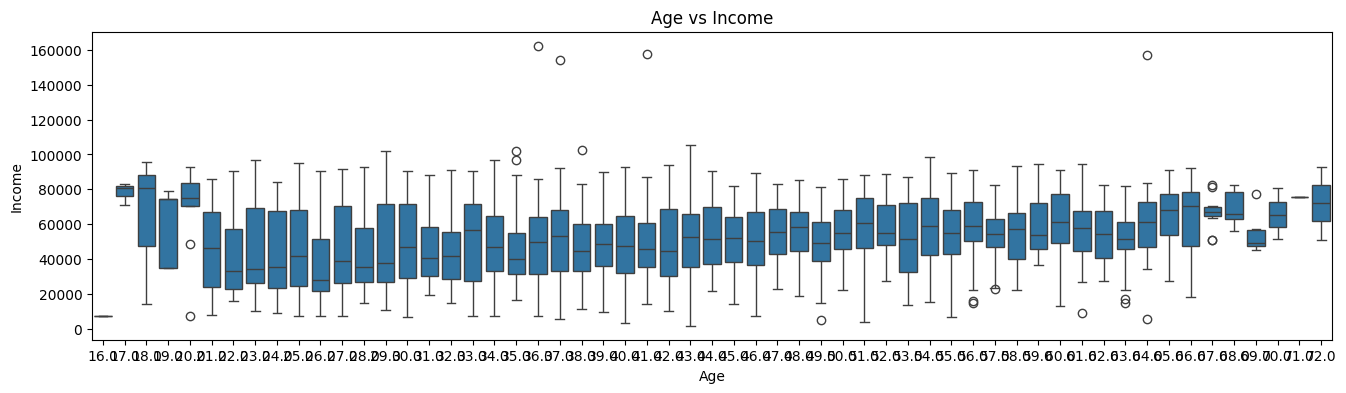

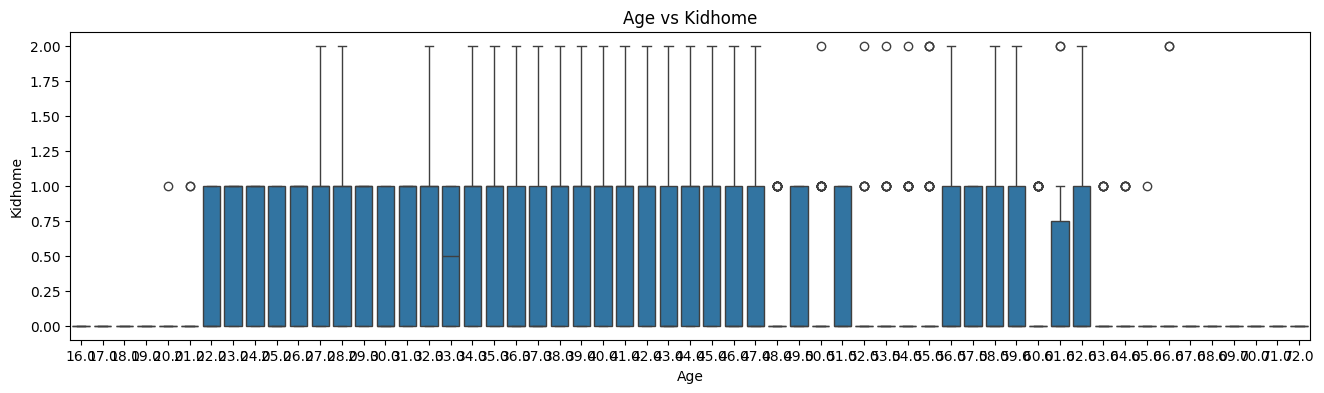

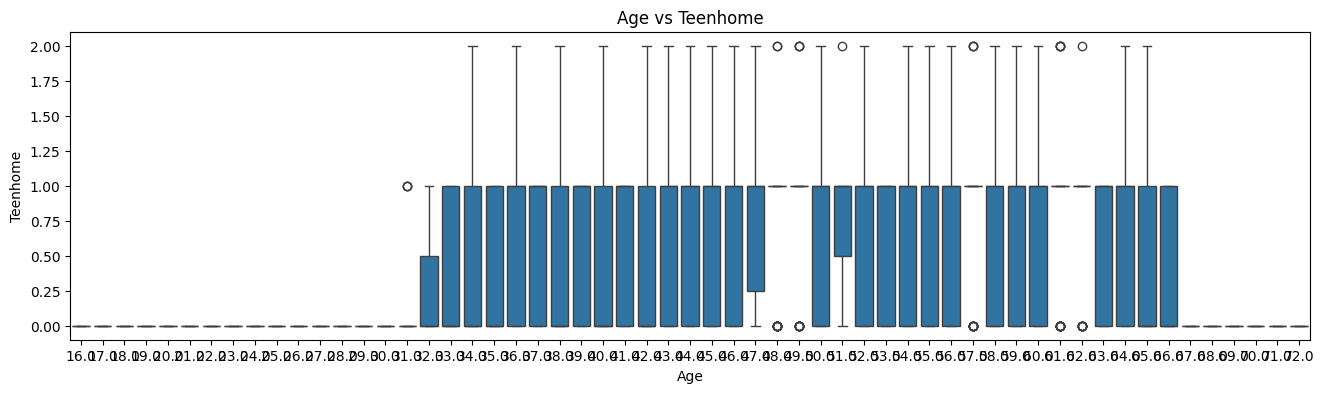

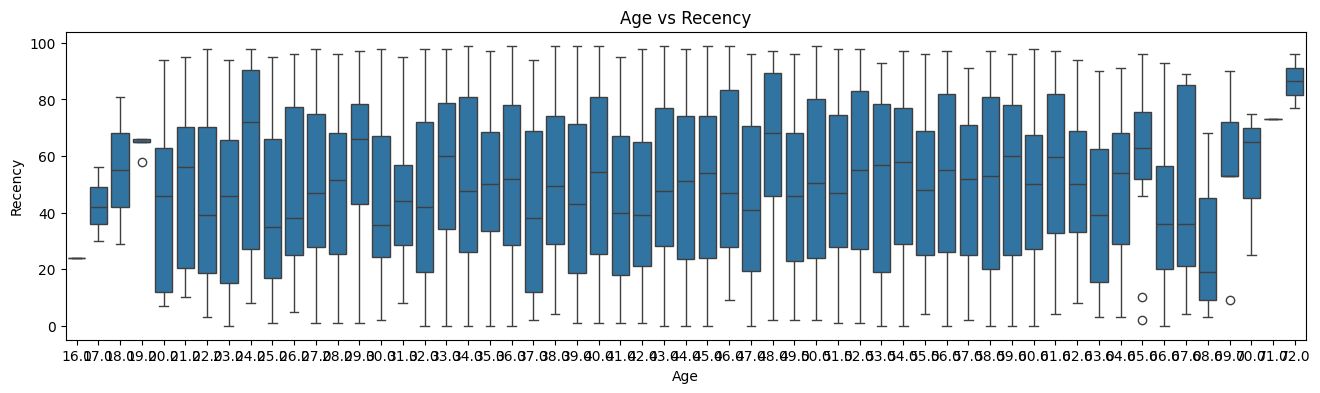

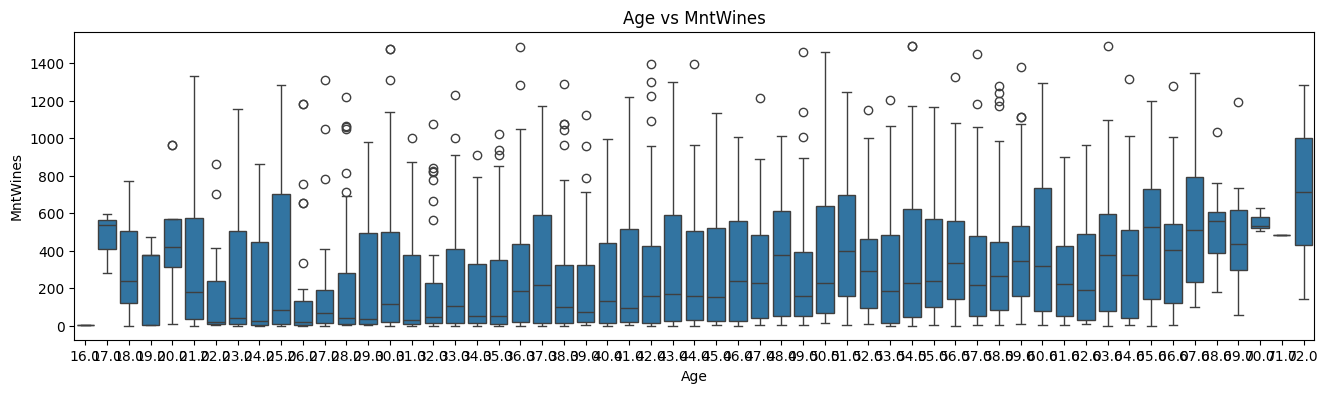

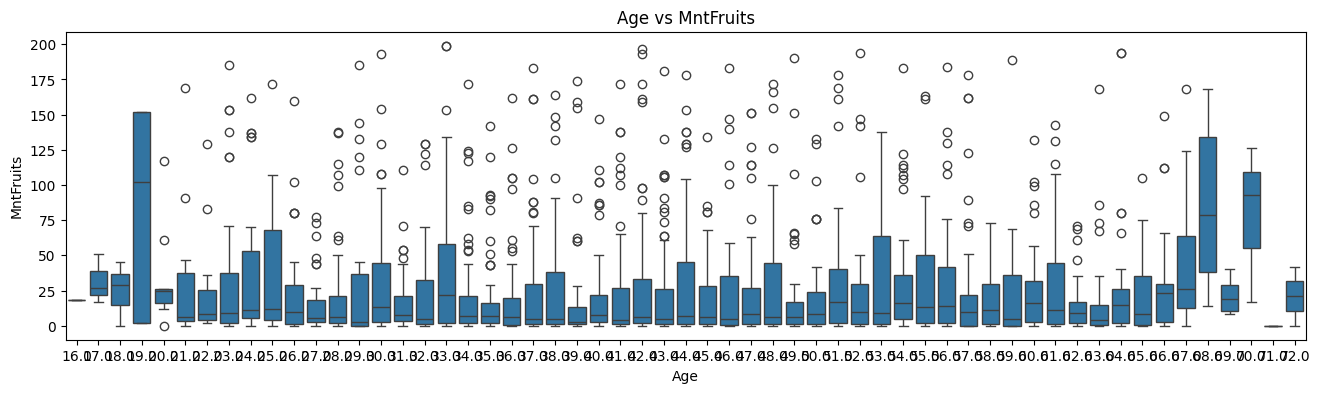

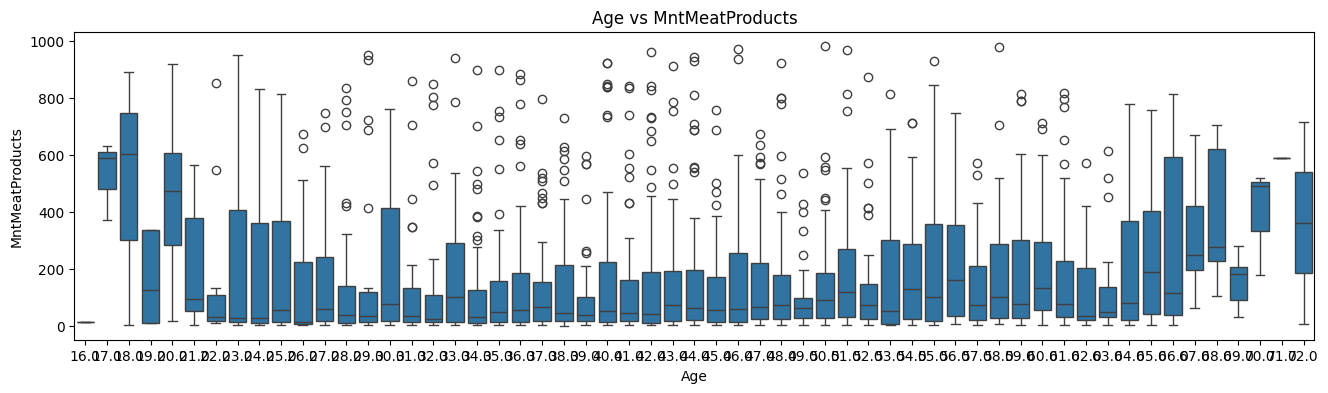

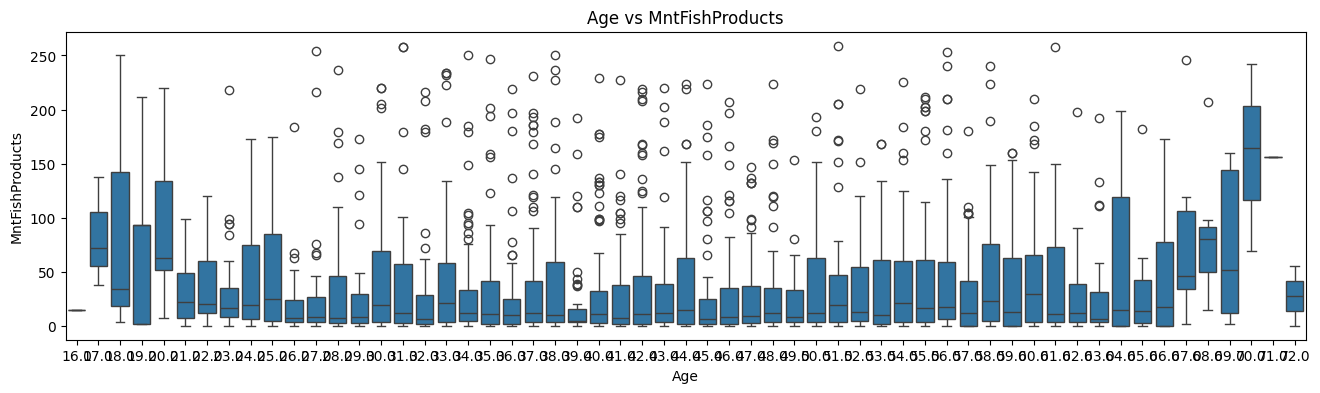

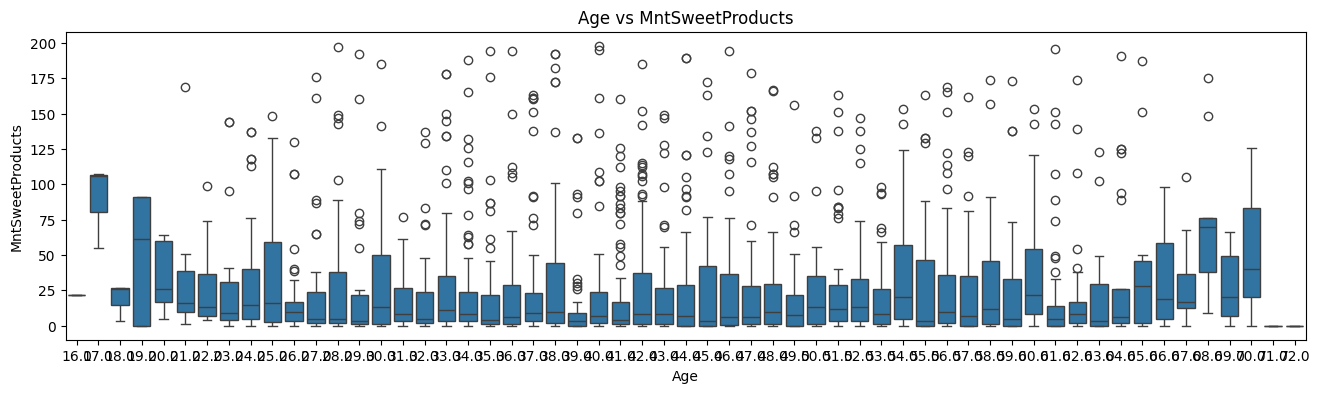

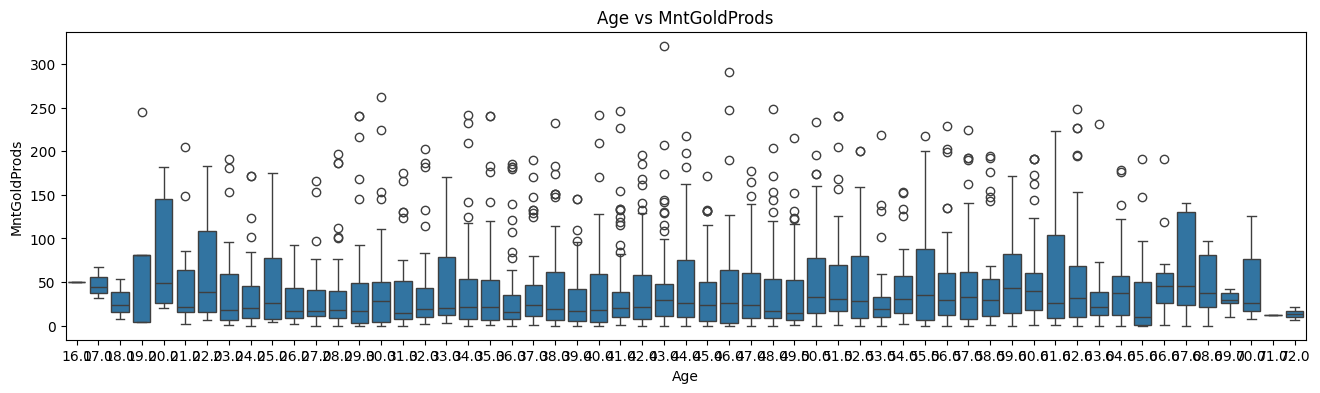

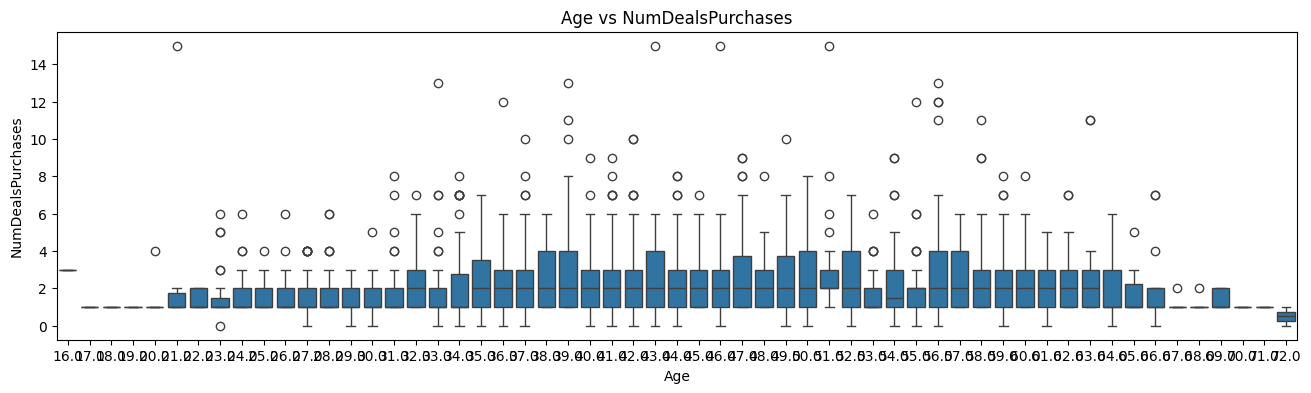

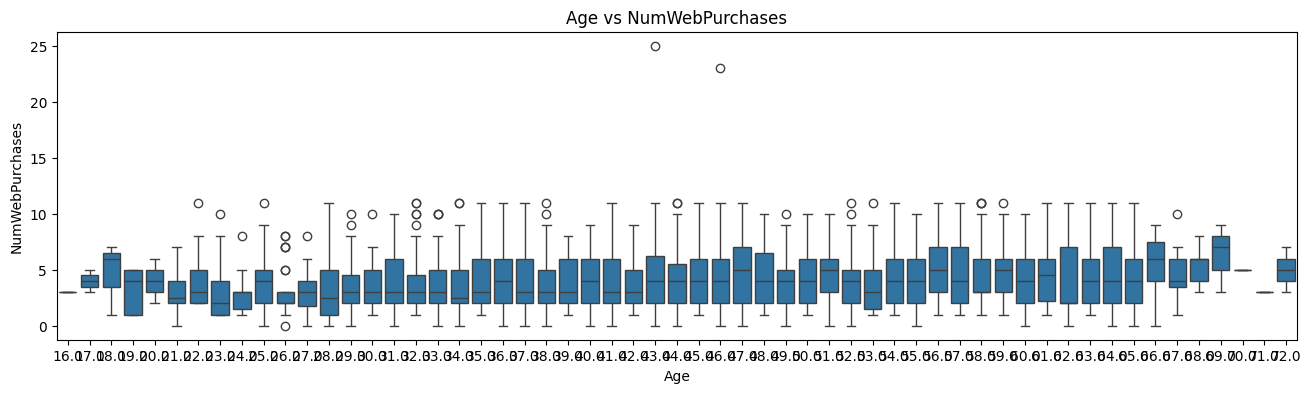

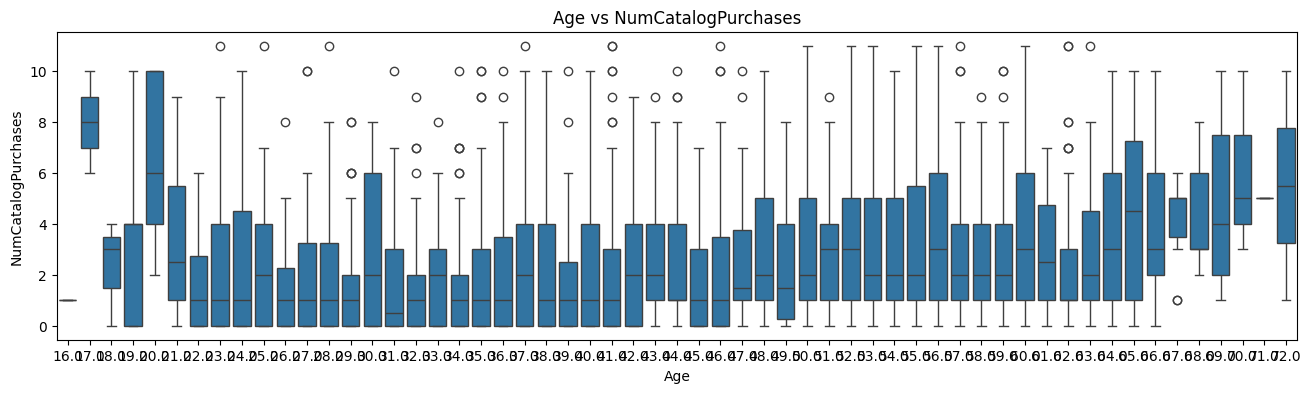

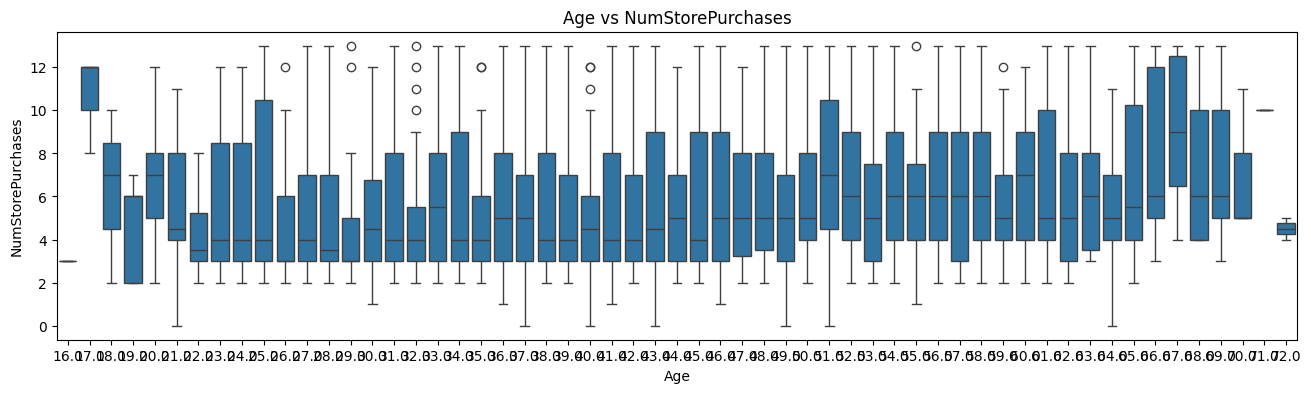

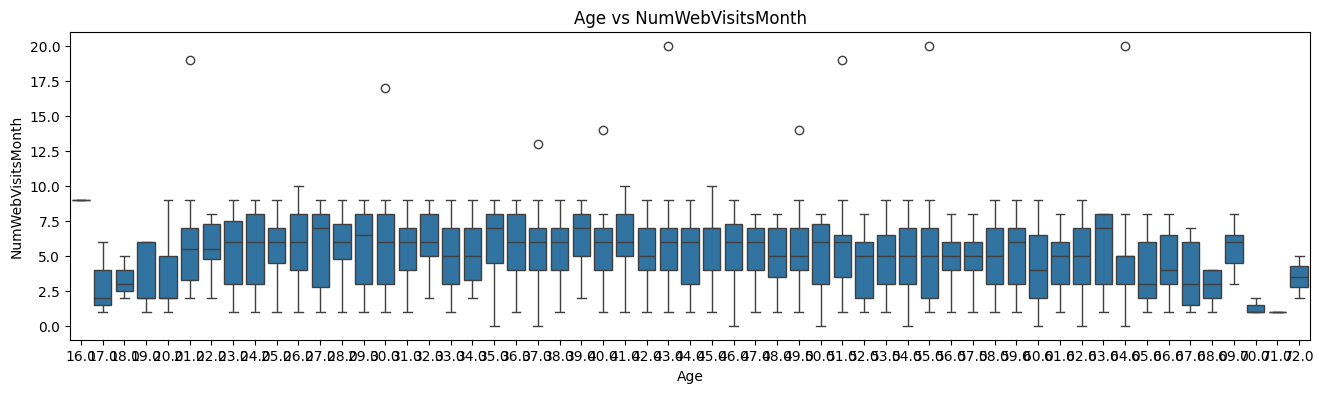

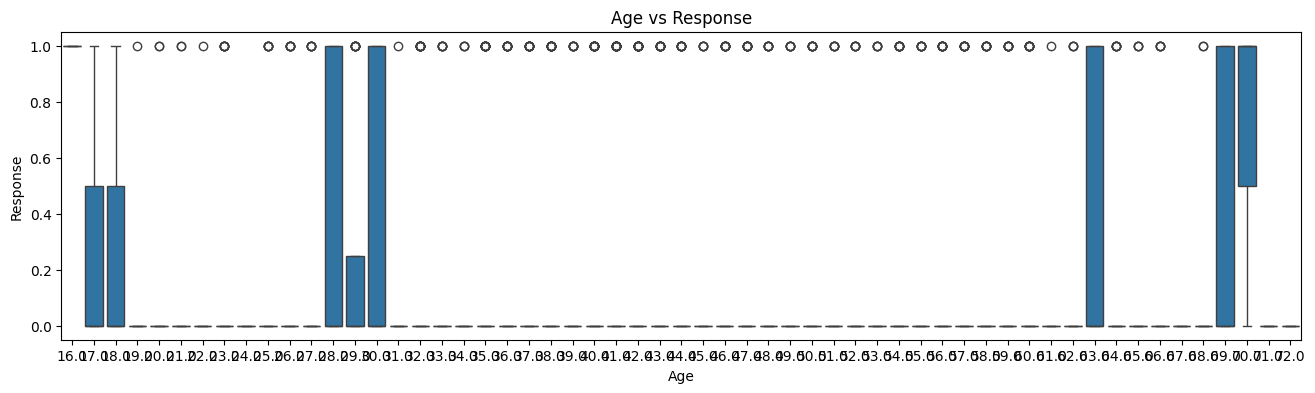

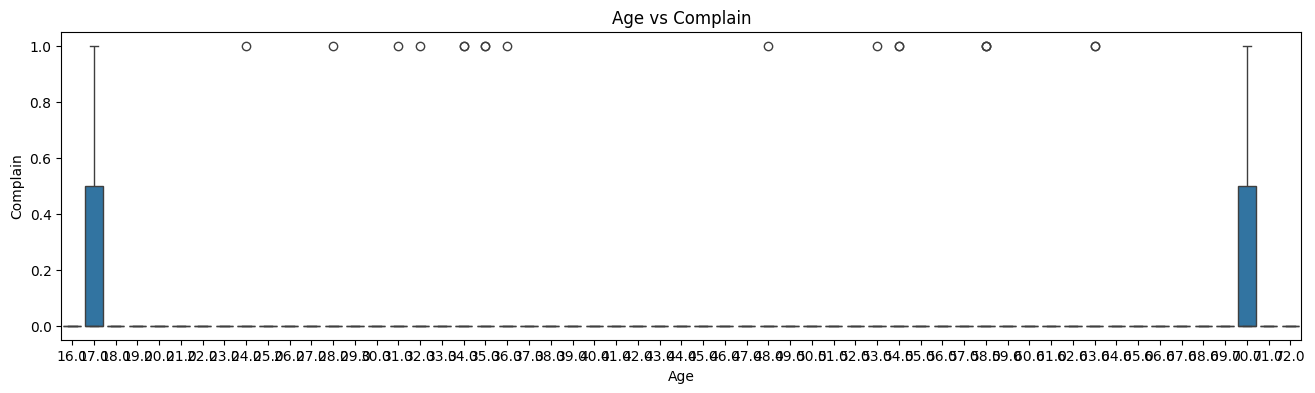

In [ ]:
#Age relationships
for i in df_habit:
  plt.figure(figsize=(16, 4))
  sns.boxplot(data=df_habit,x='Age',y=i)
  plt.title(f"Age vs {i}")
  plt.show()

1. In general increase from 30 age onwards till 60, then stabilizes.Sone higher from 16 to 23
2. Recency highest at old age(72).Lowest at age 35,40,68.
3. Wines-Highest at 72.Tends to increase with age.lowest t 30,32.
4. Fruits:-Highest at ages 29,68-71(expenditure range 75-100), rest all near 25 and below.
5. Meat- Highest at extremes(till 25 then 66 onwards), else low.
6. Fish-Similar to meat, highest at 69 yrs of age.
7. Sweet-highest below 20 yrs of age.increase at 65 onwards.
8. Gold-Almost constant, peaks at extremes ages (21-22 and 50 onwards)
9. Discounts-high availed over 70(0),median 2 in most.
10. Webpurchase-higheat median at 20 yrs,and at 66,68.else near const at 3-4.
11. catalog-Highest 16,21,69,72.else near const 1-3
12. Store purchase-highest 17,66.rest const near 4
13. web_visits-mostly 5-7, dec as age inc.
14. response- mostly by ages 20,27-30,63,69-71
15. complain- mostly by ages of 17 and 70


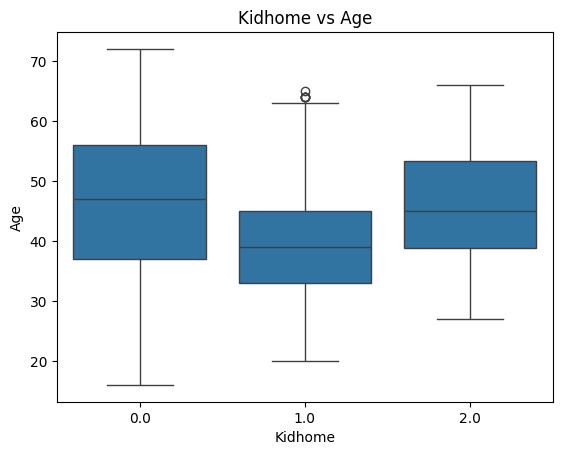

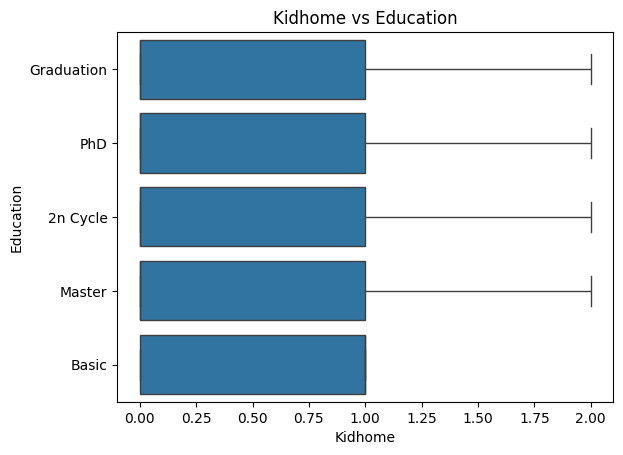

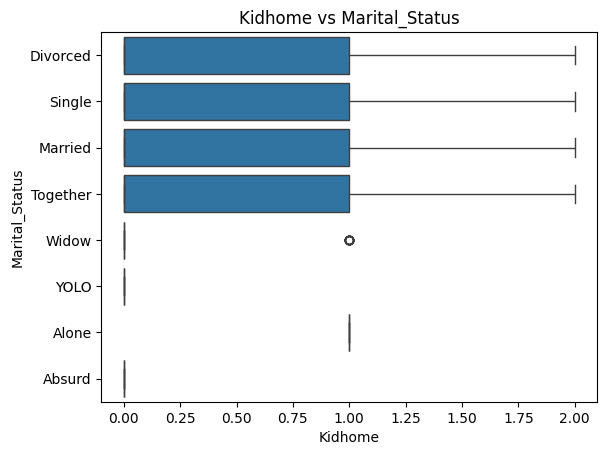

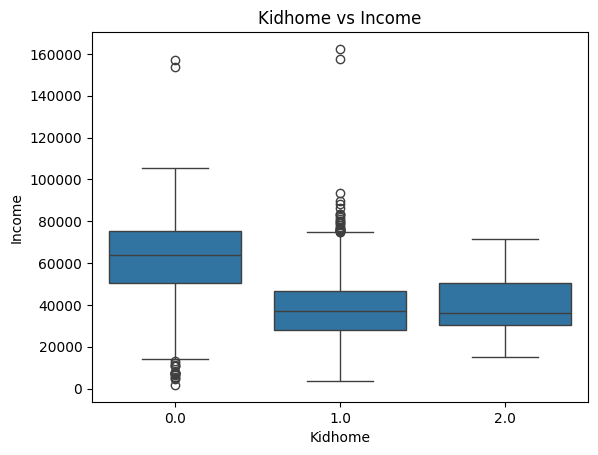

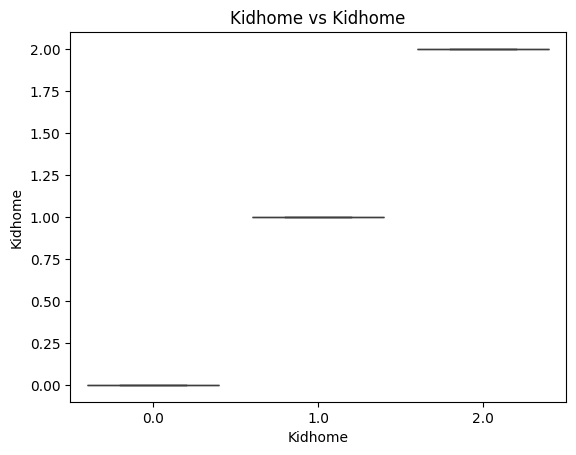

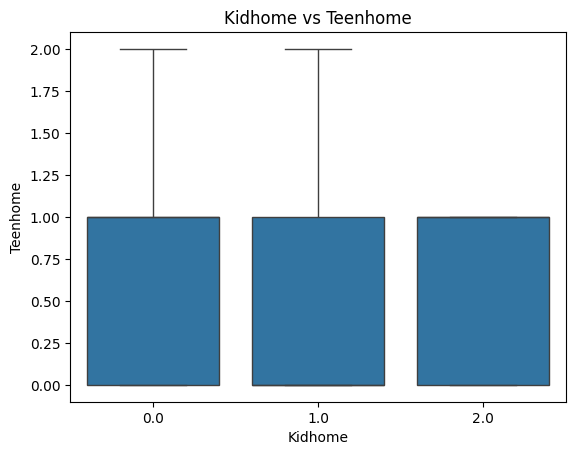

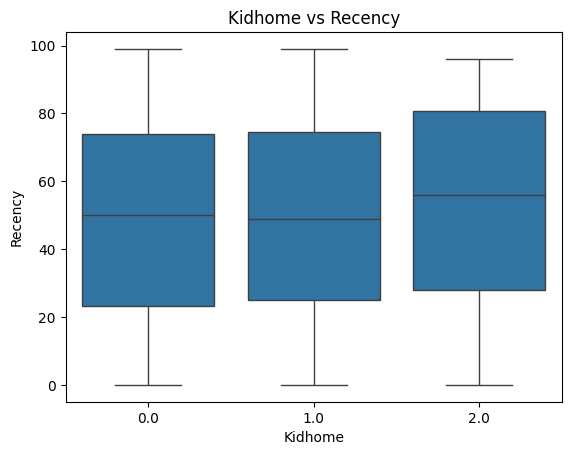

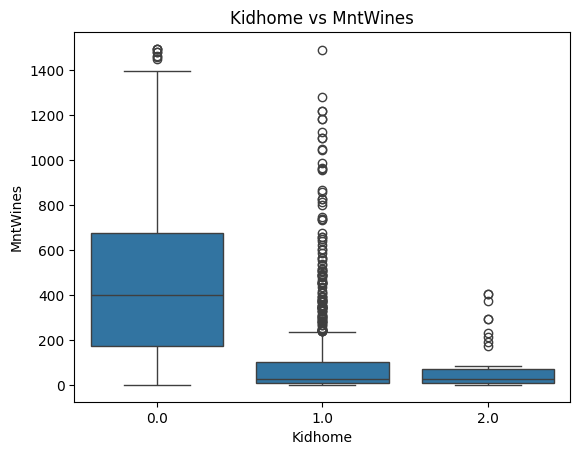

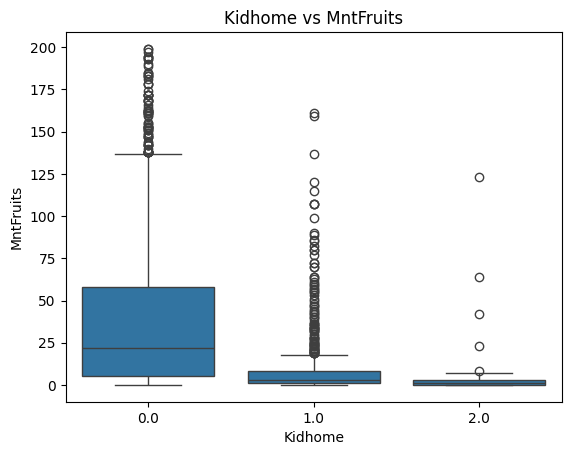

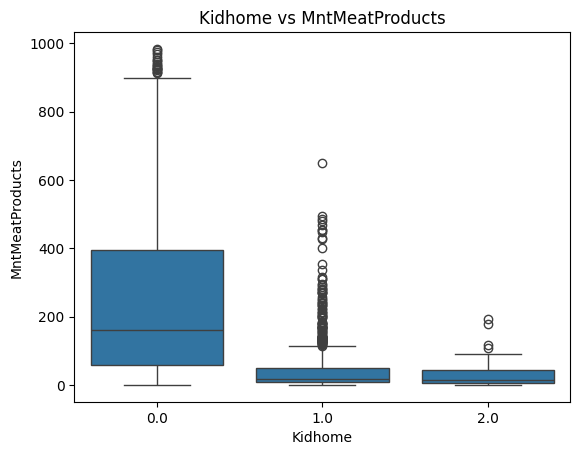

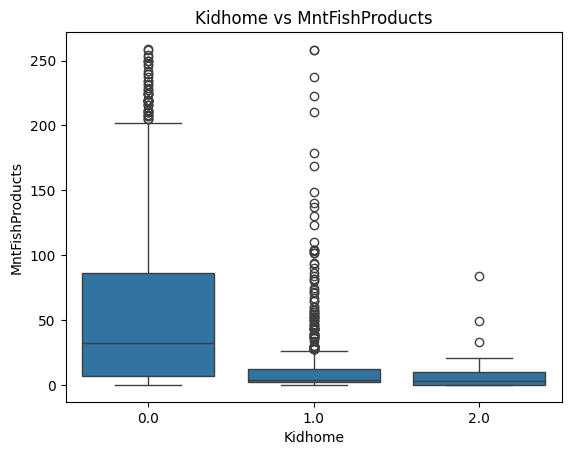

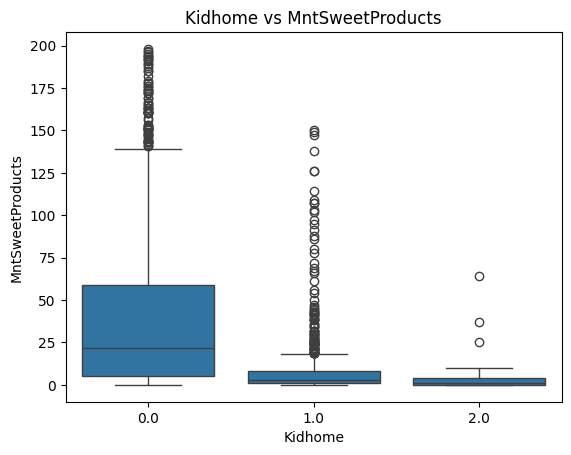

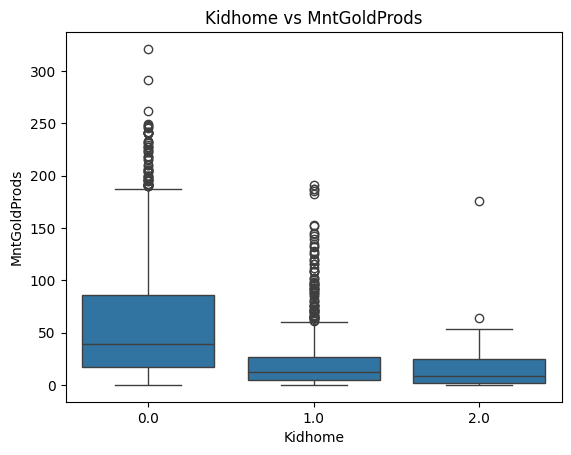

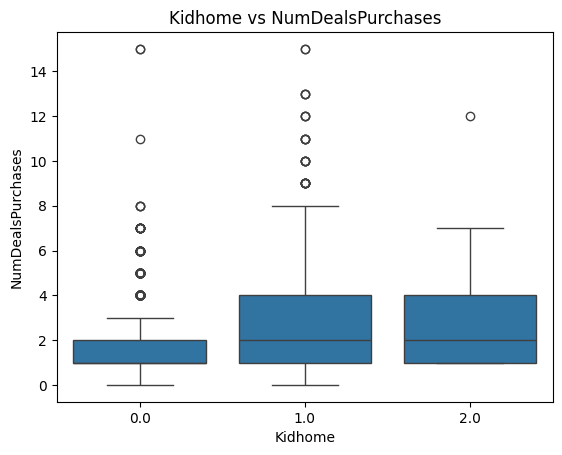

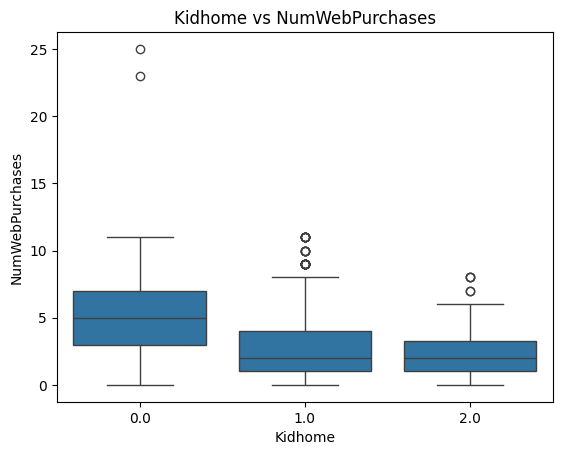

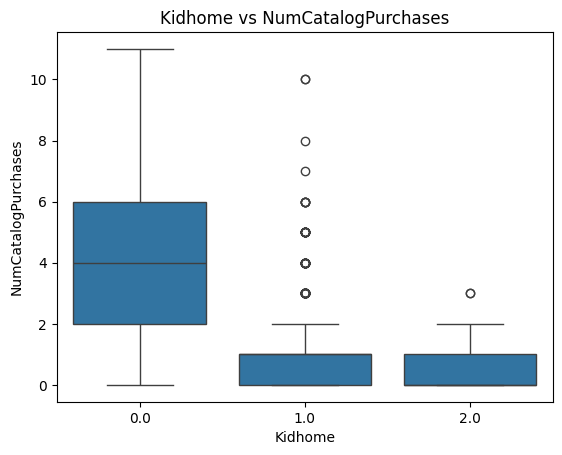

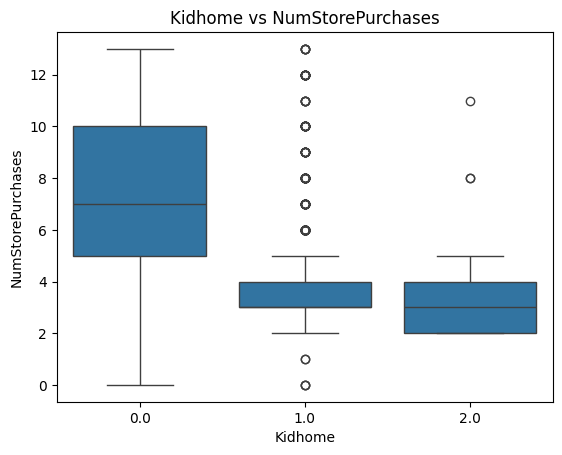

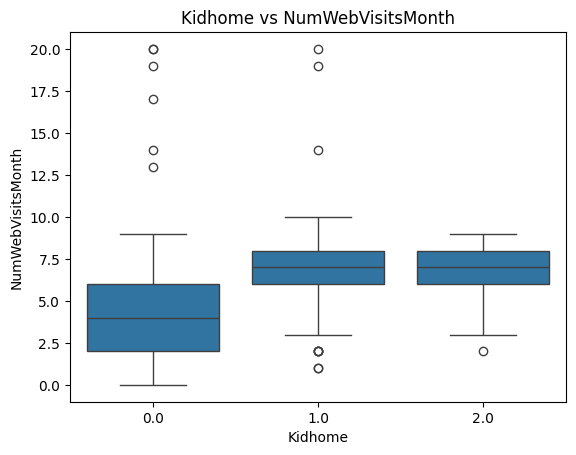

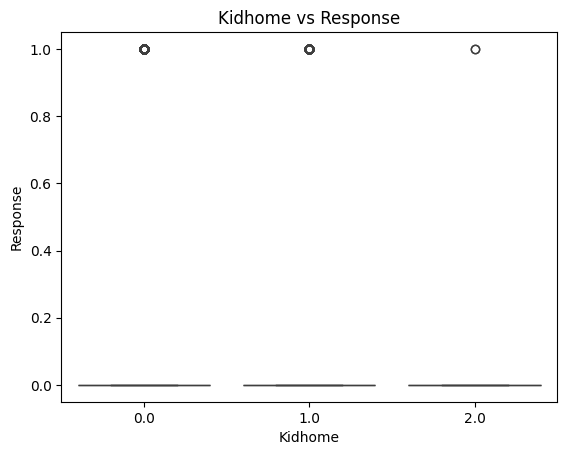

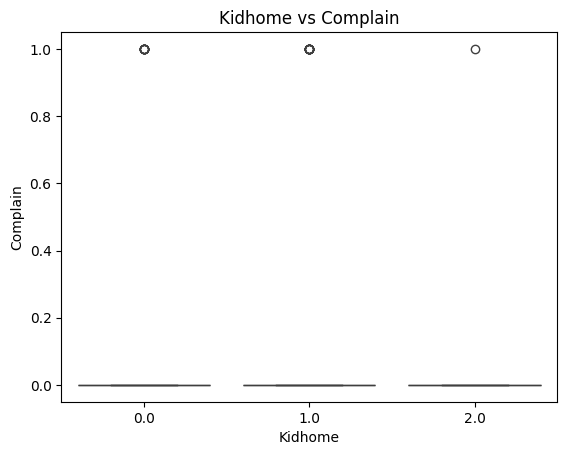

In [ ]:
#Kidhome relationships
for i in df_habit:
  sns.boxplot(data=df_habit,x='Kidhome',y=i)
  plt.title(f"Kidhome vs {i}")
  plt.show()

1. Highest median income has 0 kids. more positive skew in 2 kids. Most outliers in 1 kid.
2. Recency-highest(not bought since ling) and more divergence in 2 kids
3. Wines-Max median (400(and most divergence normal with 0 kids, least median and least divergence with pos skew in 2 kids(20).1 kid more similar to 2 with more outliers.
4. Fruits-Median order:0>2>1. Divergence in all, all postive skew.Many outliers in 0 and 1.
5. Meat-Median order 0>2>1.All positive skew.Large variation in 0.More outliers in 1
6. Fish,sweet,gold-similar to meat
7. Discount-Both 1,2 kid households availed large no. of discounts,though more outlier in 0,1.Higher variation in 1.All positive skewness.
8. Web_purchase-Households with 0 kids used more. more variation in 0,1.
9. Catalog_purchase-Households with 0 kids(normal,4 median).1,2 similar,but more outliers in 1.
10. Store_purchase—Households with 0 kids more(7). More variation in 0 and 2.1 least also most positive skew.Also most outliers in 1.
11. Web_visits-Households with kids order 1>2>0.More outliers and variation in 0 kid household. All normal.


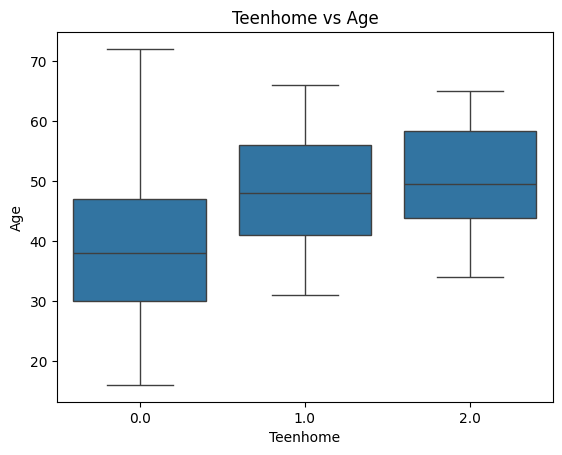

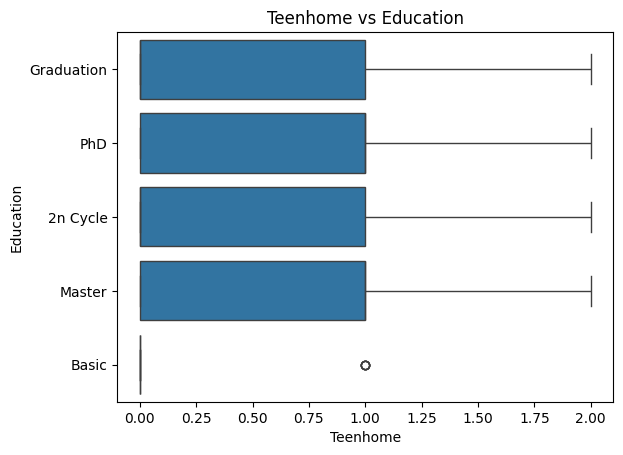

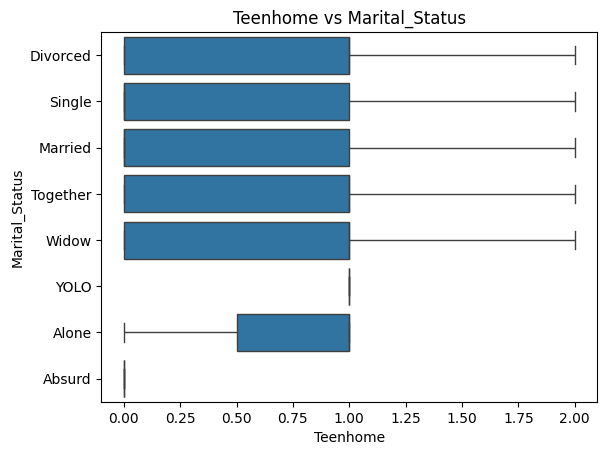

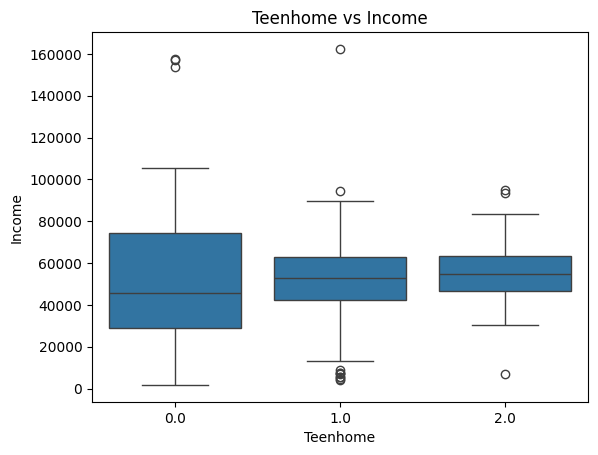

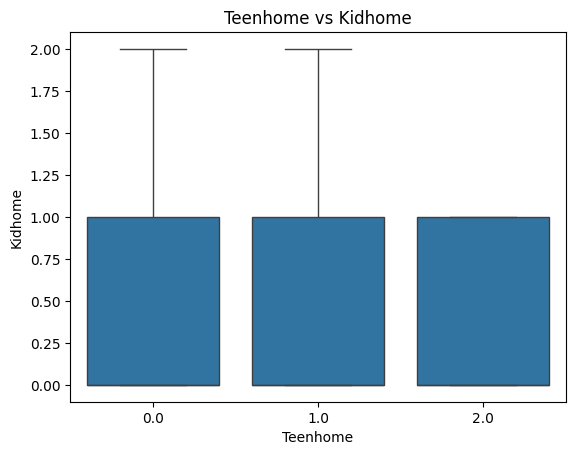

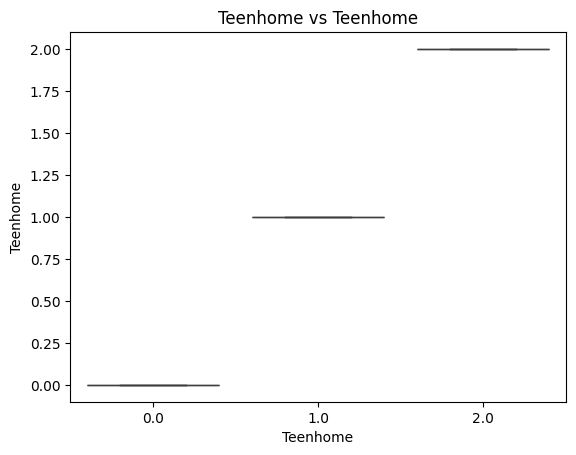

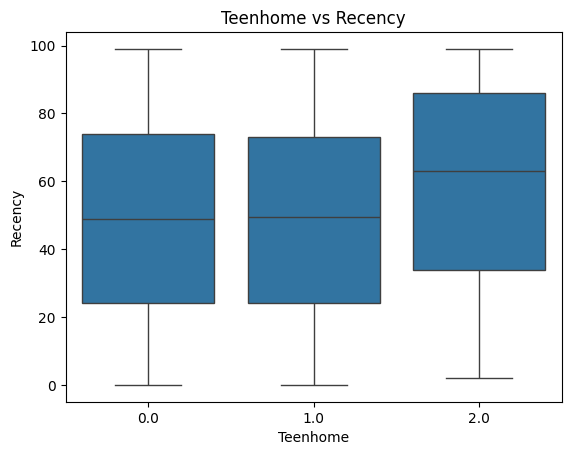

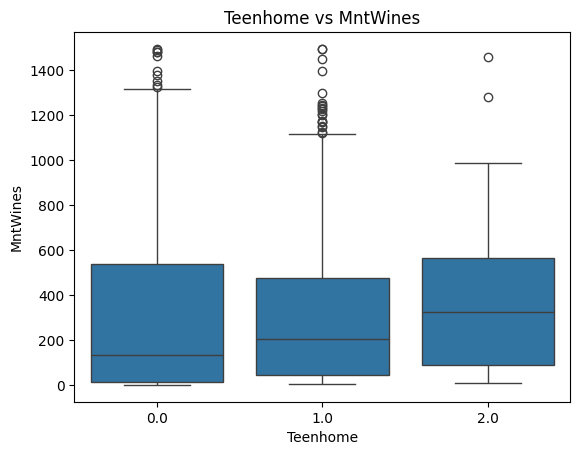

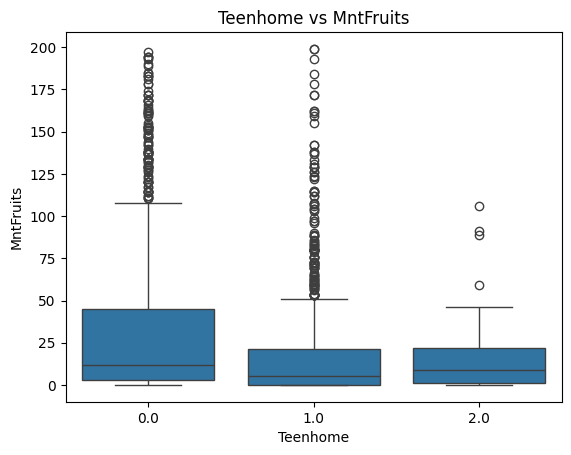

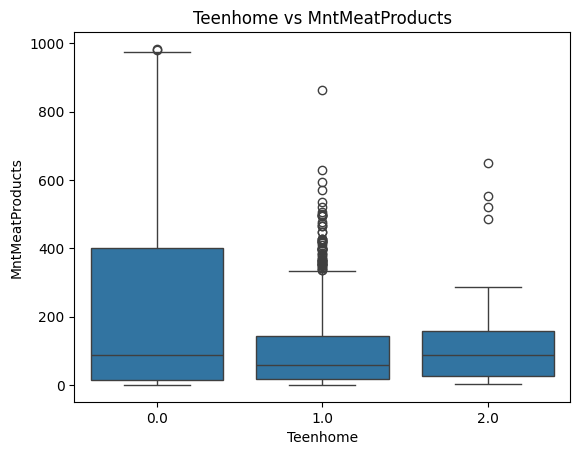

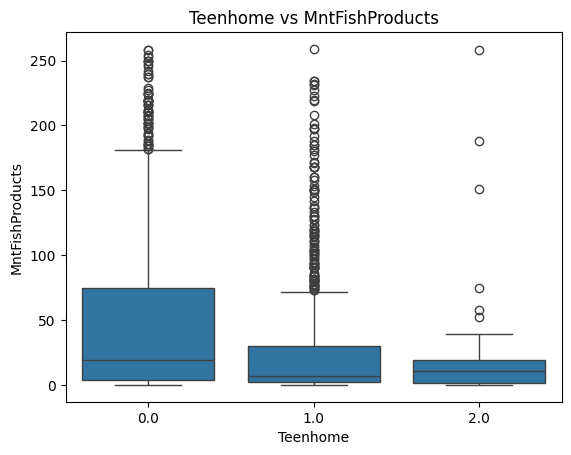

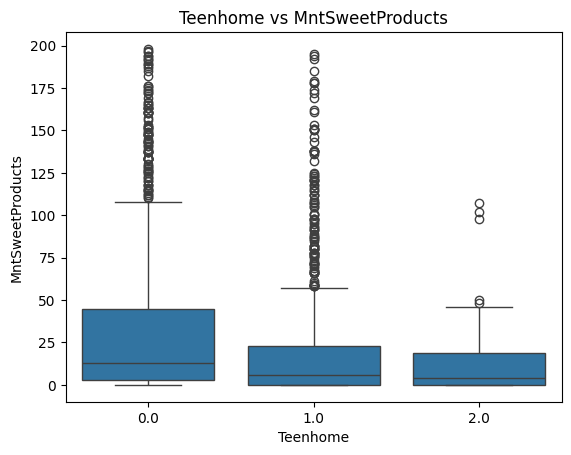

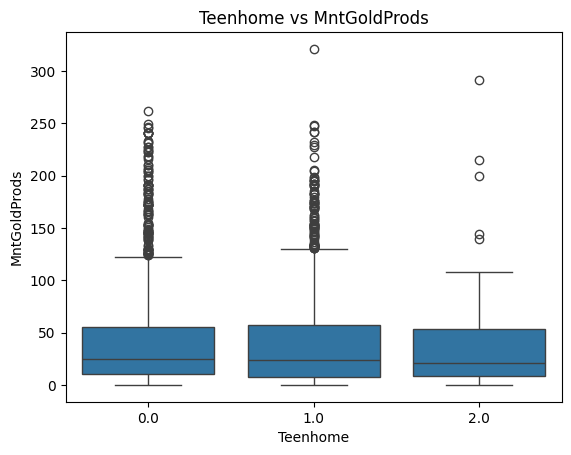

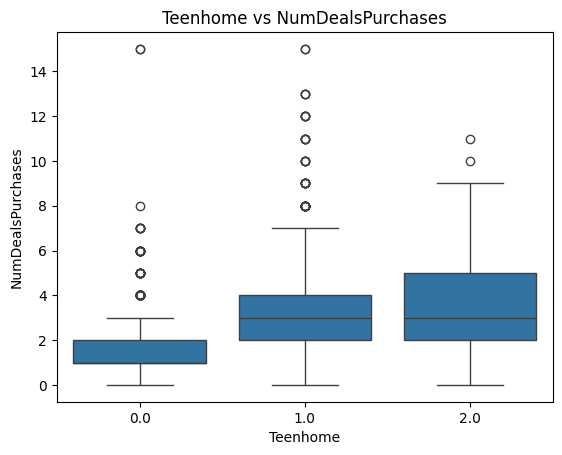

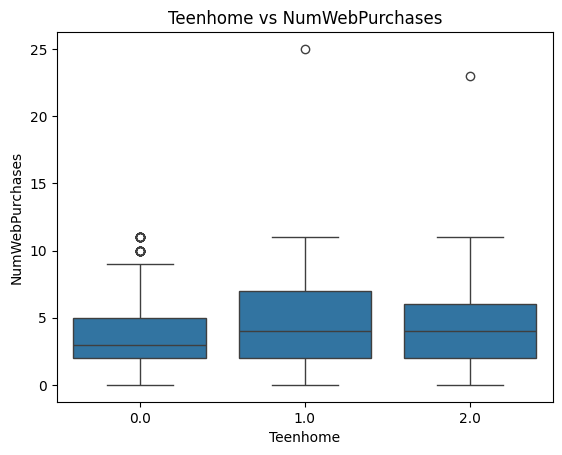

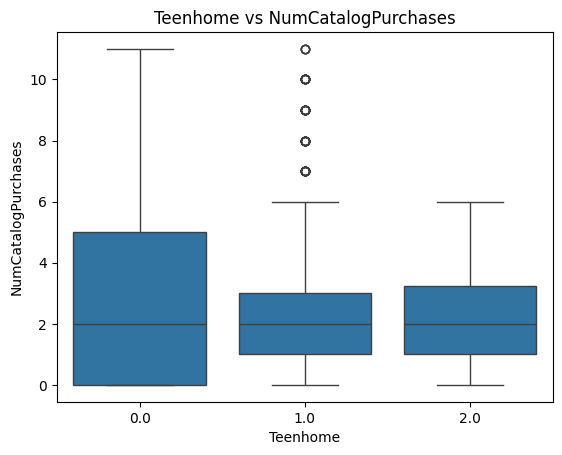

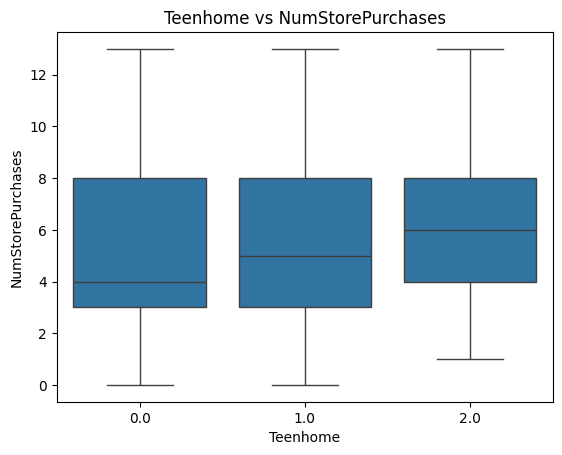

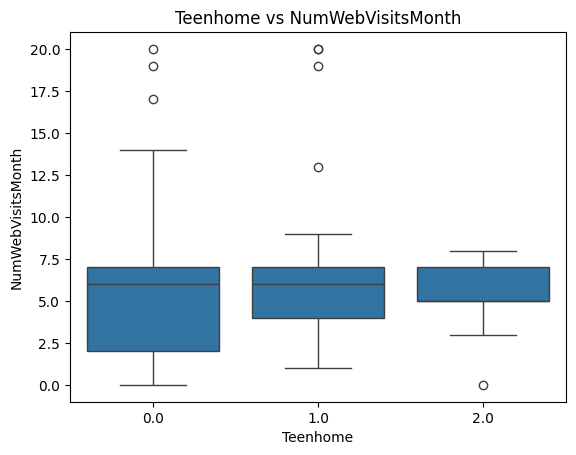

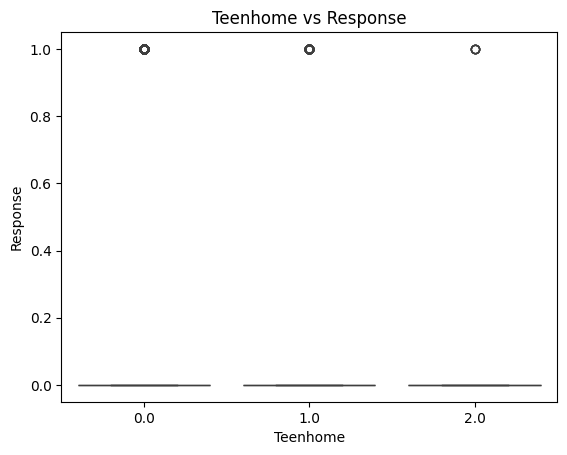

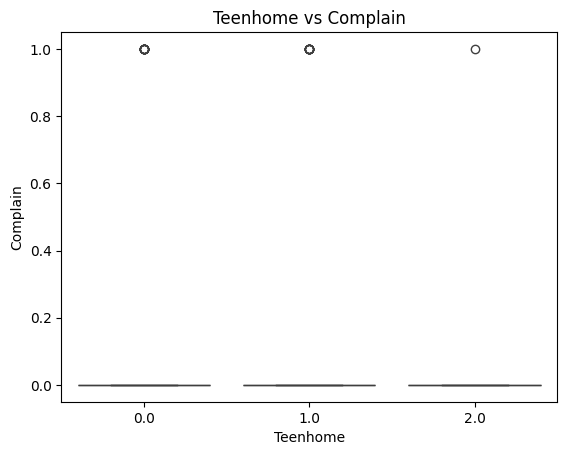

In [ ]:
#Teenhome relationships
for i in df_habit:
  sns.boxplot(data=df_habit,x='Teenhome',y=i)
  plt.title(f"Teenhome vs {i}")
  plt.show()

1. Income-highest with households with teen at home2>1>0.More vatiability in 0.
2. Recency-more with 2 than 0 and 1.ie Households with 0 and 1 kid have buyed more frequently.
3. Wines-2>1>0. 0-most variable and positive skew.Highest outliers in 1.
4. Fruits-0>2>1.0=most variable. More outliers in 1,0.All positive skew.
5. Meat-2>0>1.most variable-0.outliers in 1.
6. Fish-0>2>1.most var-0.outliers in 1
7. Sweet-0>1>2.most var-0.all pos skew.outliers in 0,1
8. Gold-all equal.also in variability and pos skew.more outliers in 0 and 1
10. Discounts-0 least.1=2, but more variability and pos skew in 2.also pos skew in 0.more outliers in 1
11. Web_purchase-1>2>0.more variability in 1.pos skew in 0.
12. Catalog_purchase-all equal, more variability in 0.also pos skew.more outlier in 1.
13. Store purchase-2>1>0.pos skew in 1.
14. Web_visits-Households with 0,1 kids have both visited equally.More variability in 0 and more pos skew.



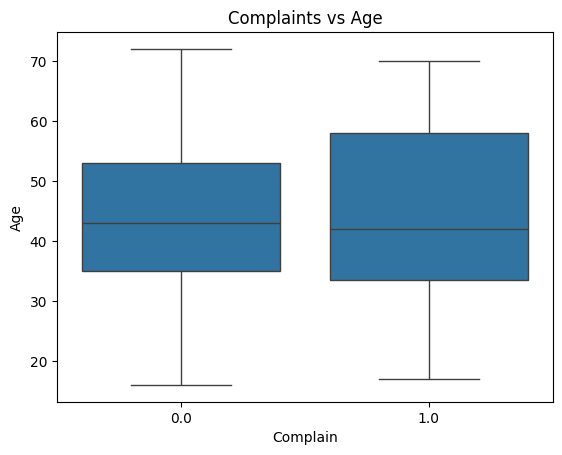

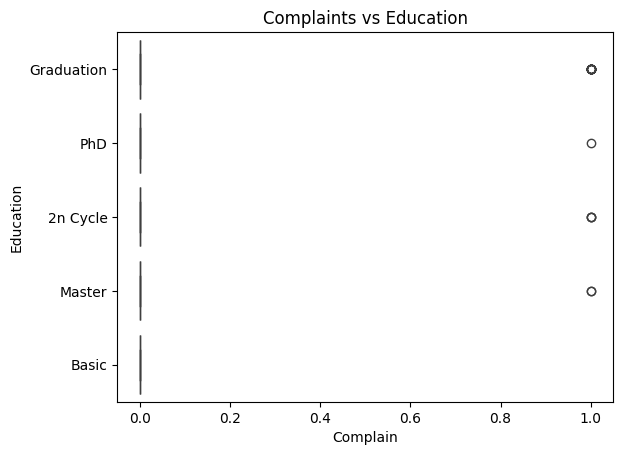

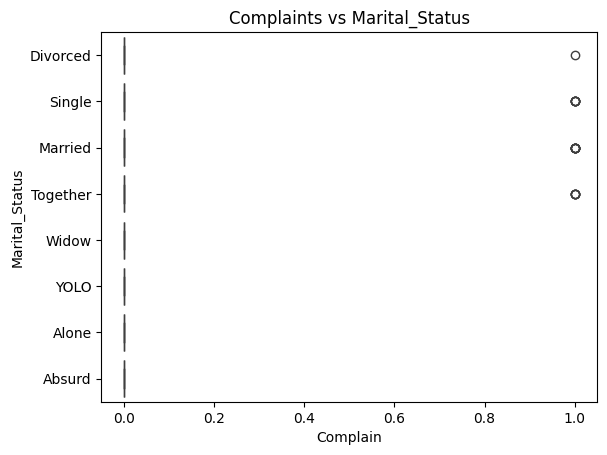

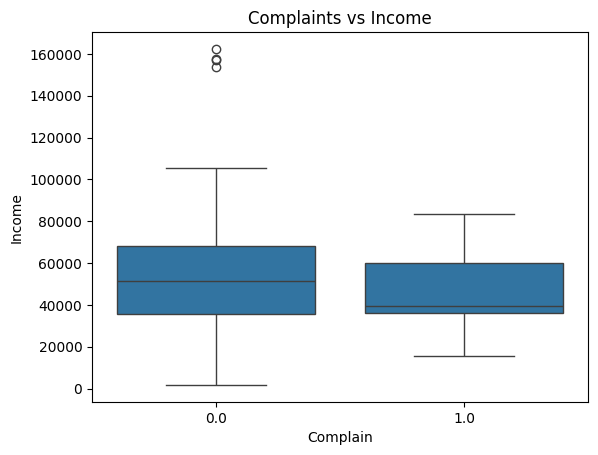

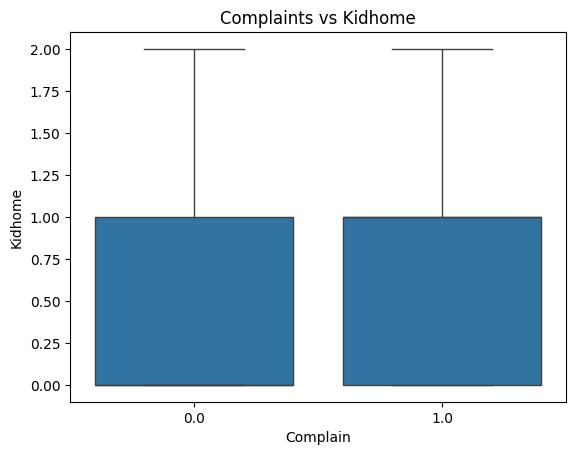

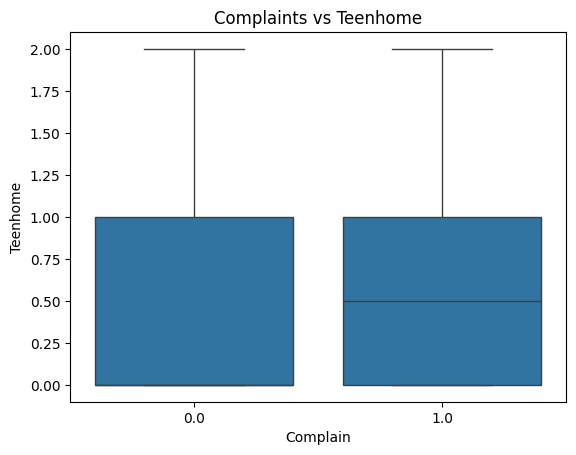

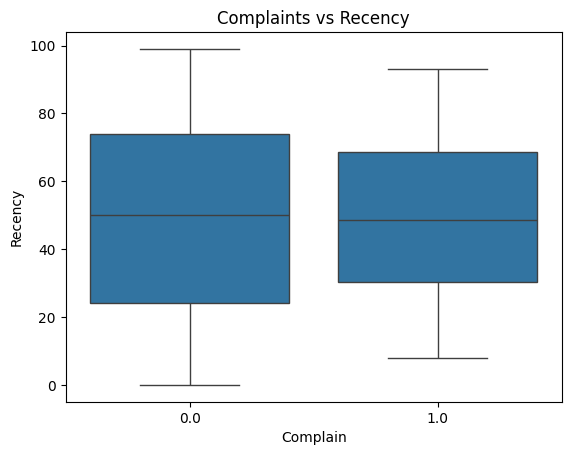

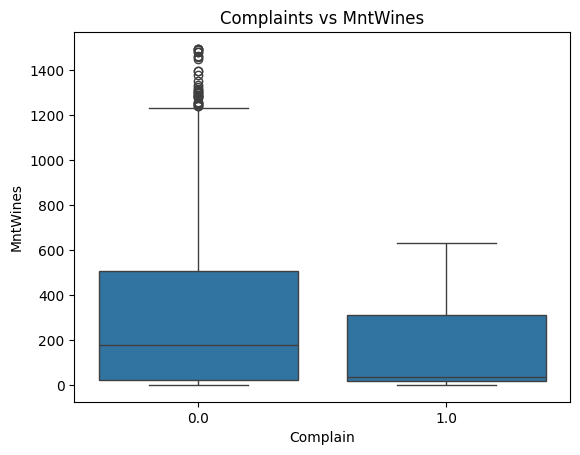

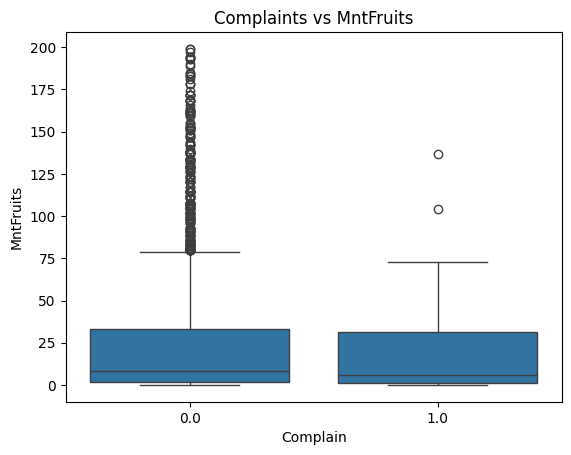

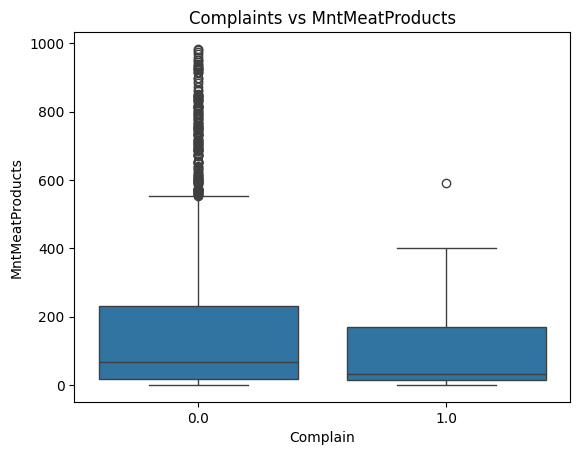

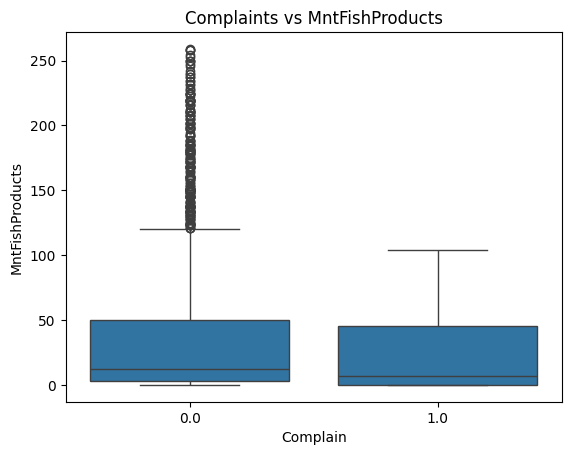

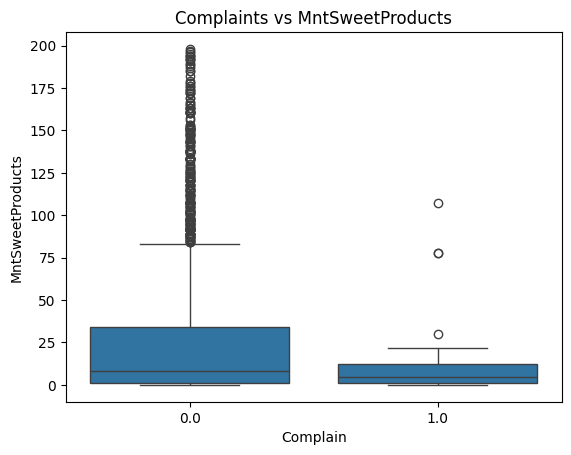

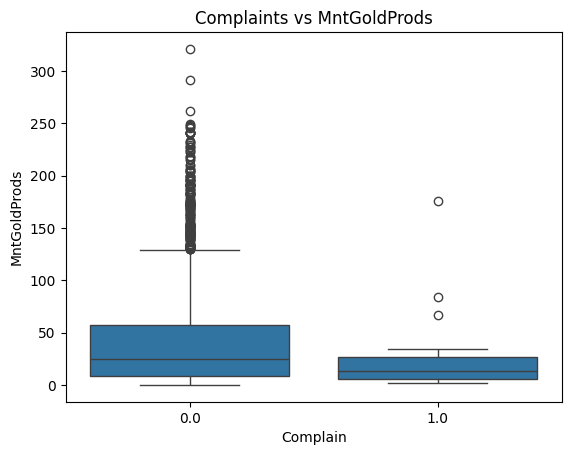

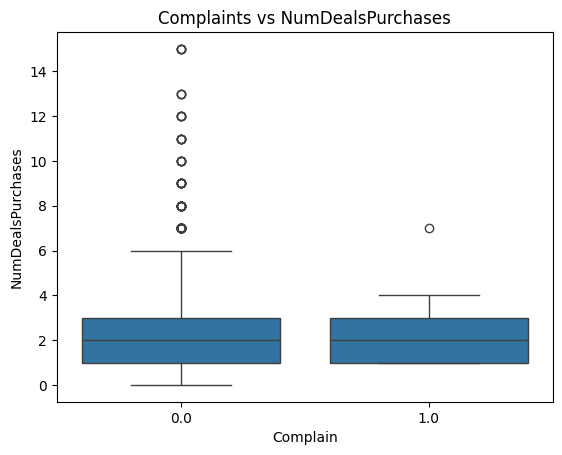

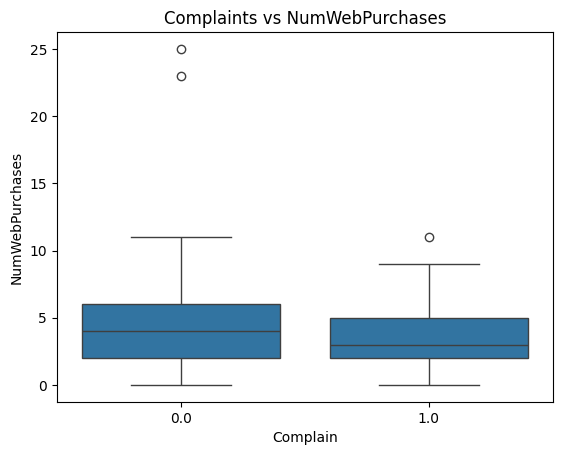

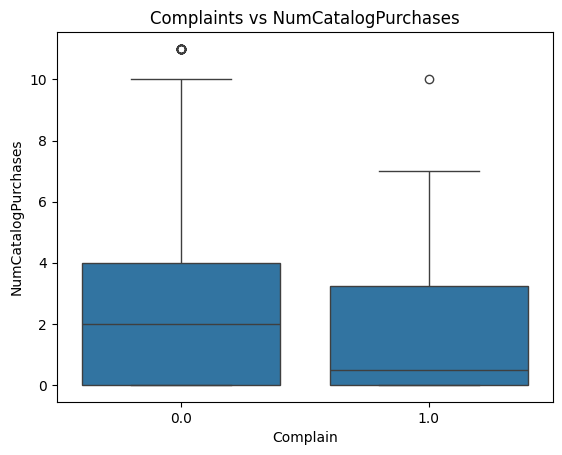

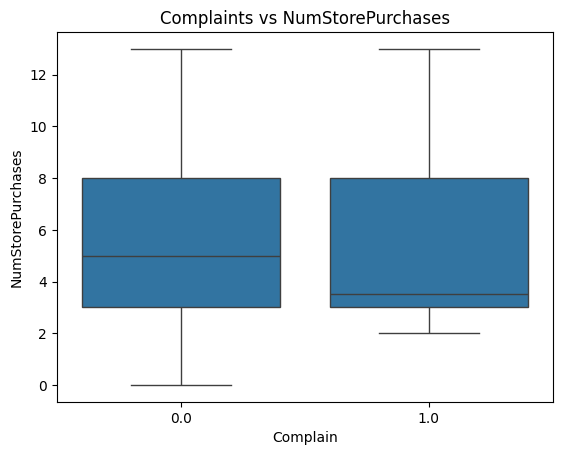

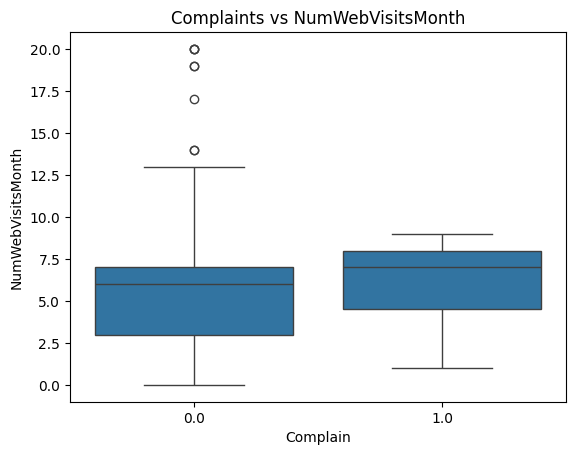

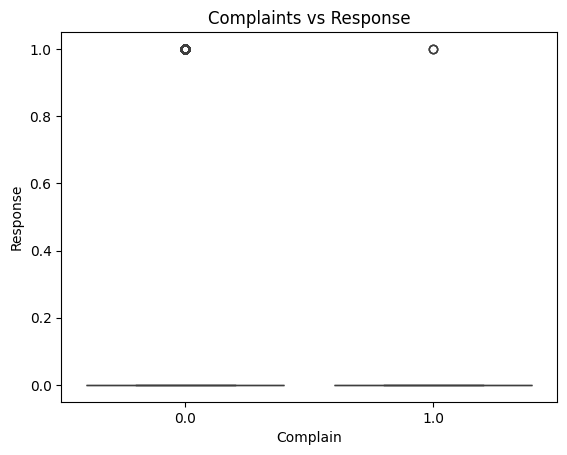

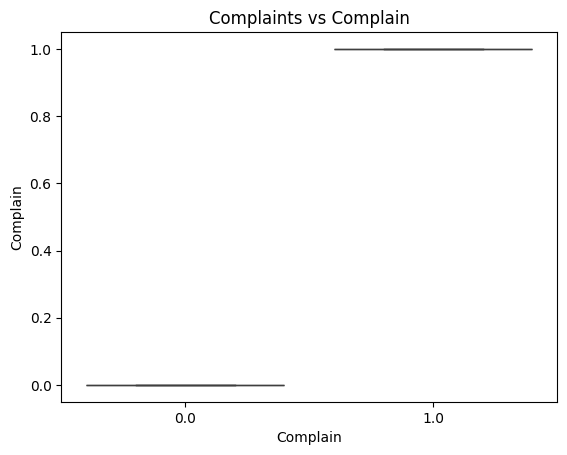

In [ ]:
#Complain Relationships
for i in df_habit:
  sns.boxplot(data=df_habit,x='Complain',y=i)
  plt.title(f"Complaints vs {i}")
  plt.show()

Complaints
1. Positive skew, 43 yrs median age.
2. Low income median(4000), at income of 6000-no complain.
3. More teenage at home(median .5),
4. More consistent recency of 50 days(median)
5. Wines(median near 0 with positive skew), fruits low spend(<10) with positive skew, low spend on meat and fish,sweet,gold.Also more consistent.
6. 2-discounts(median)
7. Web_purchase less(3-median),catalog purchase-(1) and store purchase less(<4).
8. More website visits (7), with more negative skew.


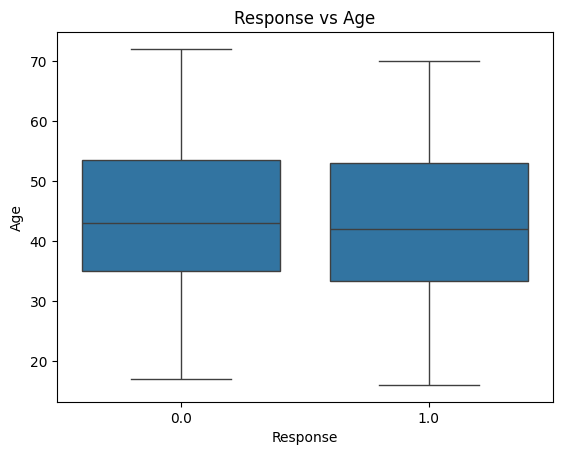

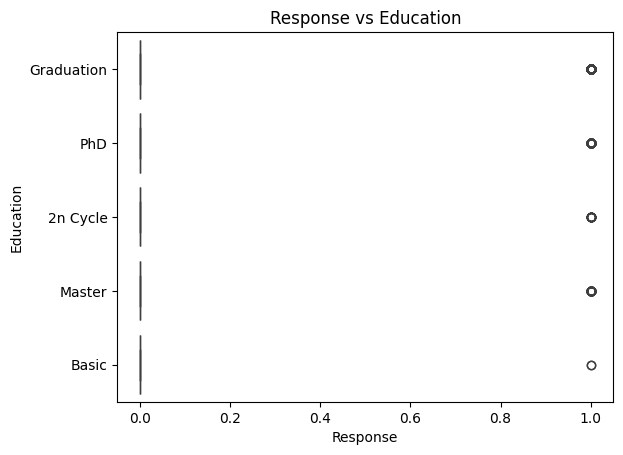

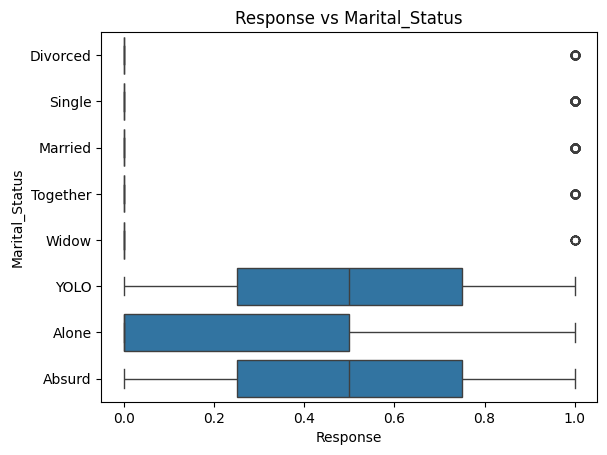

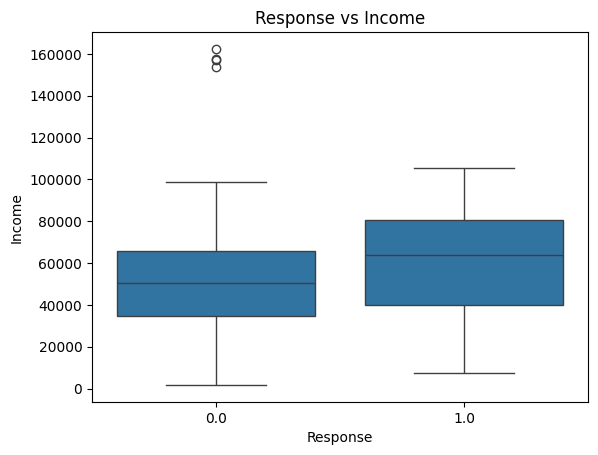

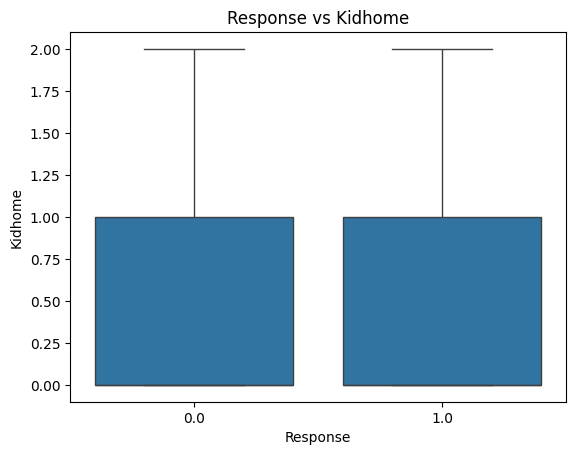

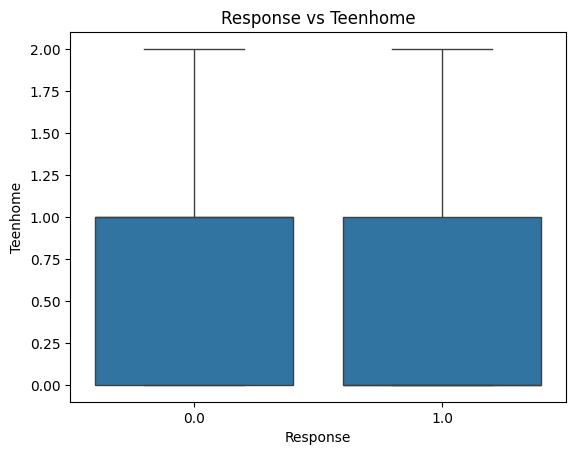

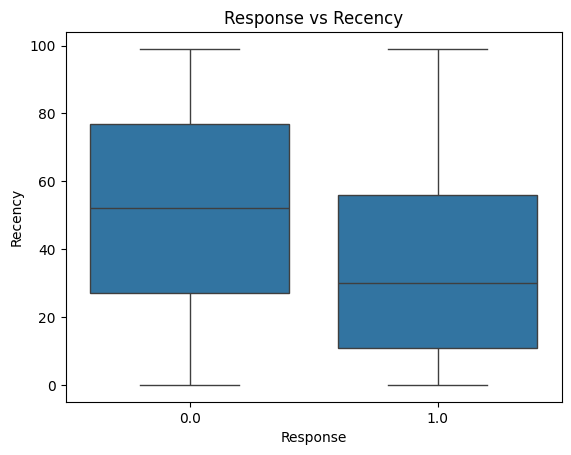

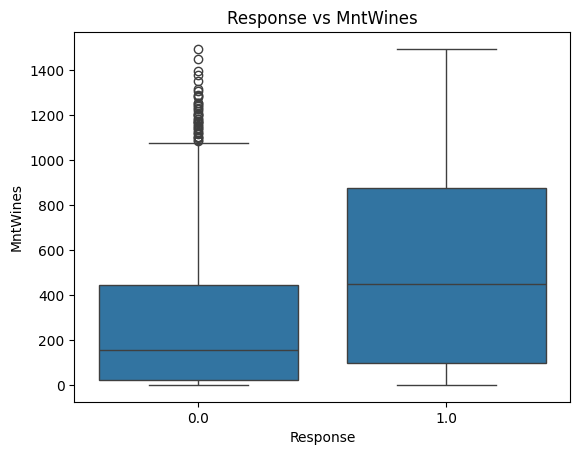

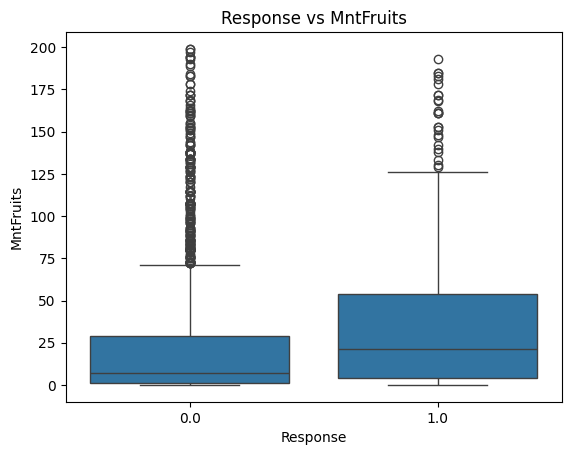

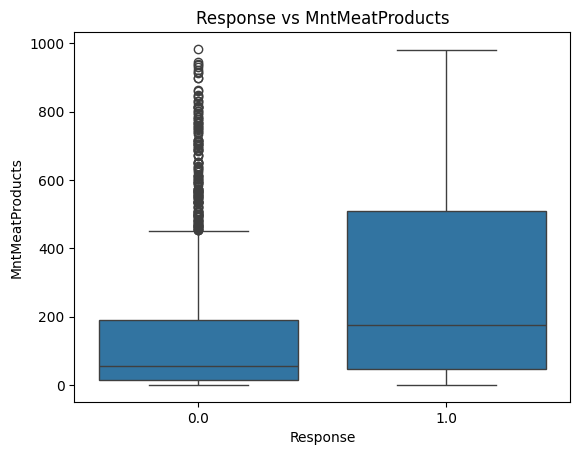

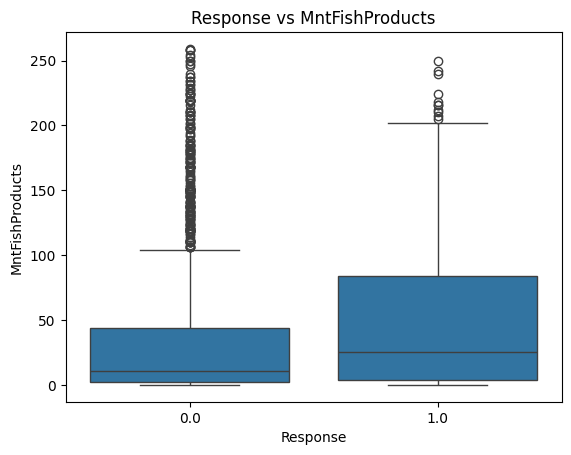

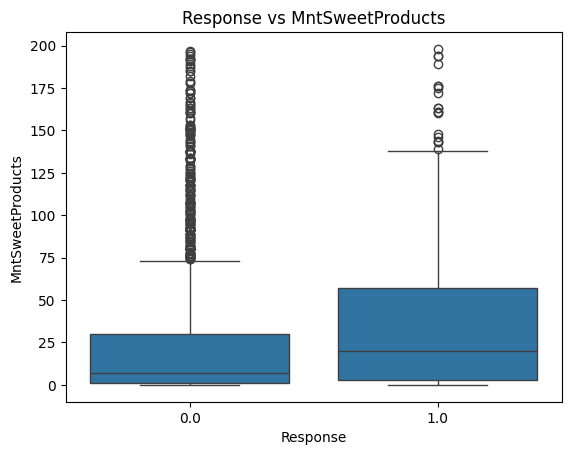

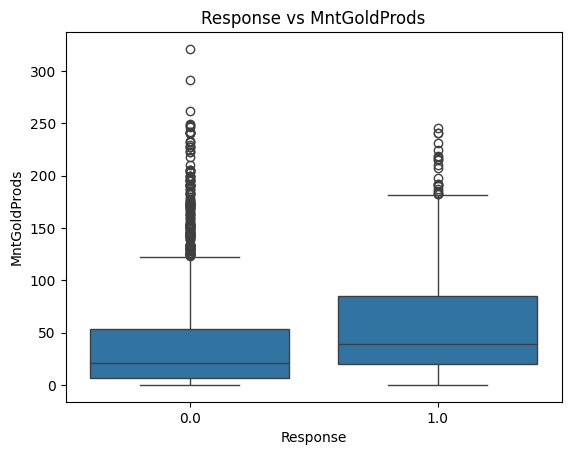

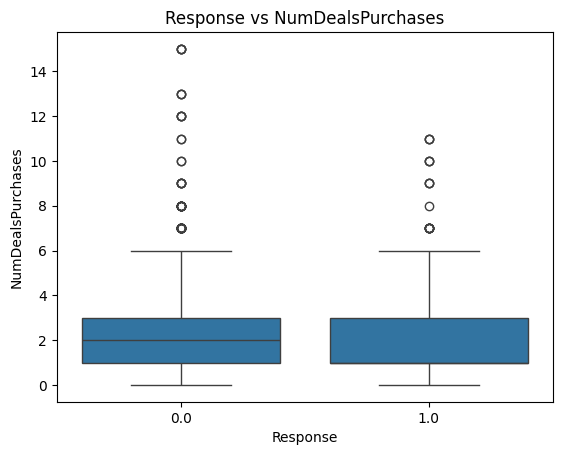

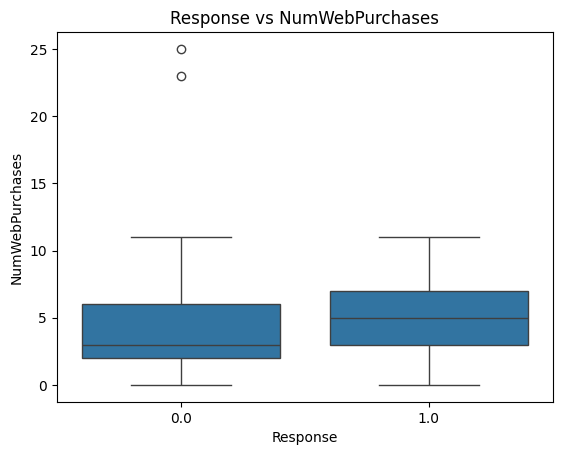

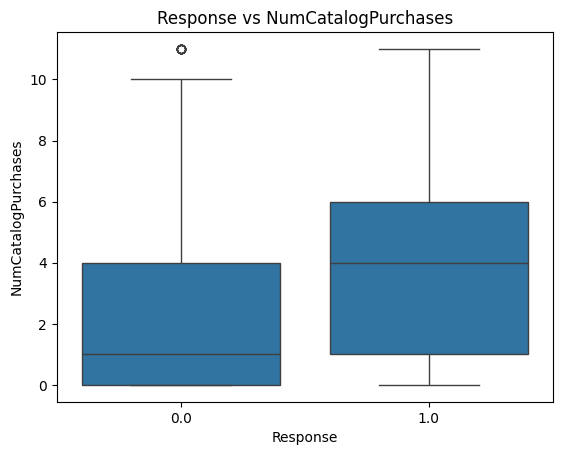

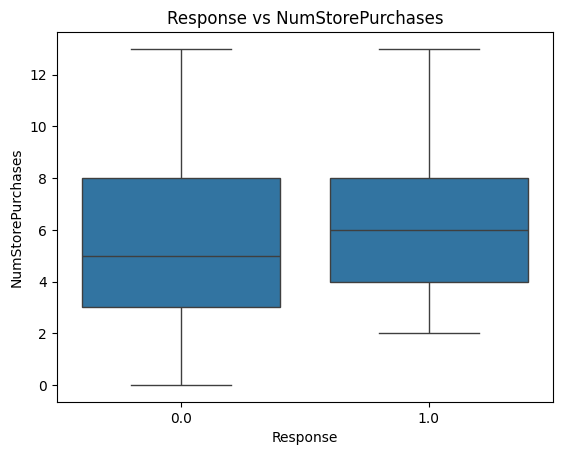

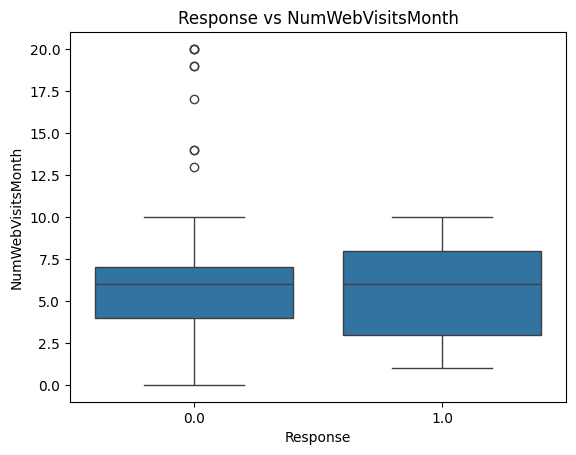

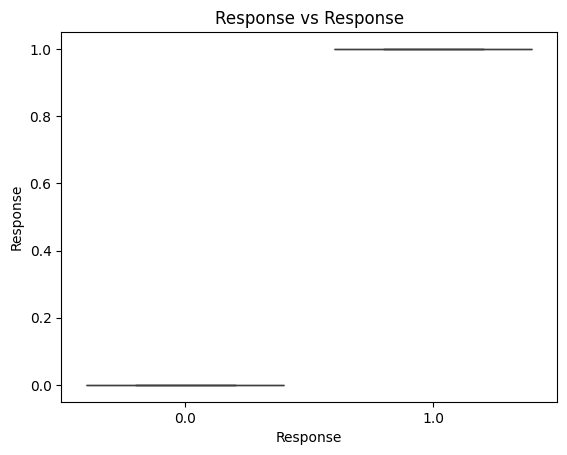

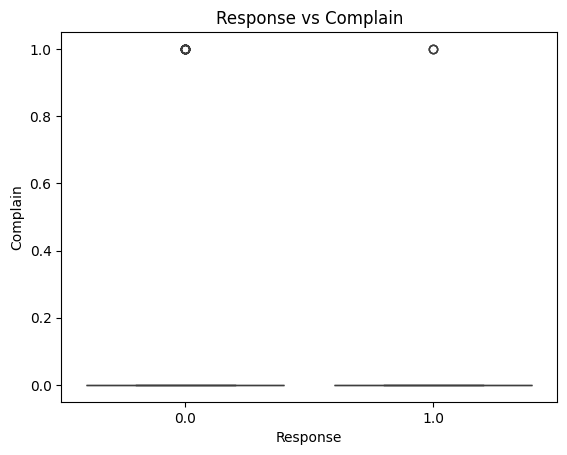

In [ ]:
#Response relationships
for i in df_habit:
  sns.boxplot(data=df_habit,x='Response',y=i)
  plt.title(f"Response vs {i}")
  plt.show()

Response relationships

1. Age near 40, higher income(median 7000),low recency (30), high invest on wines(>400),high on fruits(25),high meat(200)with more variability and positive skew.More fish(20).More variation and positive skew.More investment on sweets(20) with positive skew.More on gold(40) with positive skew.
2. Less discount(1) with positive skew.
3. High web purchase(5),high catalog purchase(4)and more variability and negative skew.
4. More store purchase(6) with low variability,6-website visit(equal)but more variability and negative skew.


**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Use insights to make recommendations for the company based on your analysis.**

**Conclusion and Recommendations:-**

1. Customer segmentation RFM(Analysis)

Income-
  1. High-Absurd,Graduate/P.hd/Master with 0 Kid and 2 teens.
  2. Middle-Married/Together/Single/Divorced/Widow/YOLO with all educations,1-2 kids and 0-1 teens.
  3. Low-Alone,Basic educated with 0 teens and more kids.

Recency:-
  1. High(Long time since last purchase)- Single/Together/Divorced/Widow/Absurd over 70 yrs old with all educations, having 2 kids and 2 teens.
  2. Low(frequent purchase)- Marrried/Alone/Absurd, 2n educated (35-40-68) yr olds with 0-1 kids and 0-1 teens.
  3. Middle- All rest
    
Behavioural:-
  1. Discount bees:-Availing most discounts; Alone,YOLO,educated beyond basic education,of all age(mostly 70+),with 1-2 kids at home and 1-2 teens at home.
  2. Website visitors:- yolo,basic educated,young age gps(less than 50 yrs), with 1-2 kids and 0-1 teens at home.
  3. Purchase methods:-
      1. Store-Predominantly by Widow,Absurd,yolo,mostly graduate or p.hd, with 0 kids and irrespective of no. of teens, high income, higher age gps(50+). Mostly used for meat purchase.
      2. Catalog-Predominantly by Absurd,mostly graduate/p.hd/master,irrespective of no. of kids and teens, high income, higher age gps(50+).Mostly used for gold purchase.
      3. Web-Predominantly by yolo,mostly graduate/p.hd,with 0 kids and 1-2 teens.Mostly used for wine purchase.

Campaign responders-
  Age near 40, higher income(median 7000),low recency (30), high invest on wines(>400),high on fruits(25),high meat(200),More fish(20).More sweets(20).More on gold(40),Less discount(1).High web purchase(5),high catalog purchase(4).More store purchase(6).

Complainers-
  43 yrs median age,Low income median(4000),More teenage at home, More consistent recency of 50 days(median) low spend on Wines,fruits, meat and fish,sweet,gold, availed higher discounts, Web_purchase less(3-median),catalog purchase-(1) and store purchase (less than 4),More website visits.

2. Market basket analysis
  Frequently co-purchased items-
    1. Wines and Meat
    2. Meat,Fruits, Fish and Sweets
    3. Fish and Gold

3. Product recommendation-Recoomend related products to customer groups and on basis of frequently co-purchased products.
4. Analyze price elasticity for different products.
5. Optimize price based on demand and customer segments.
6. Optimize inventory levels based on demand patterns.

**Deliverables**:

- **Insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍

#Experiment video link
https://drive.google.com/file/d/1fYvTJCZFp05MJM5cqaZsIBLlSFdhICWP/view?usp=drive_link